In [30]:
#import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#Load the dataset
df = pd.read_csv('housing_data.csv')


In [32]:
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [33]:
df = df.drop('Unnamed: 0', axis=1)


In [34]:
df.shape

(1460, 80)

In [35]:
print(f"The total number of rows : {df.shape[0]}   Total number of columns : {df.shape[1]}")

The total number of rows : 1460   Total number of columns : 80


In [36]:
#Check if there is null value in the dataset
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [38]:
#get overall statistics about the dataset
df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

**Observations:**
 - There are 36 numerical columns reported and 45 categorical columns are reported
 - **SalePrice:**
   - The Q1 ranges from 34900 to 129975 i.e, The first 25 % points are reported in the range of 34900 to 129975.
   - The Q2 ranges from 129975 to 163000 i.e, The second 50 % points are reported in the range of 129975 to 163000.
   - The Q3 ranges from 163000 to 214000 i.e, The third 75 % points are reported in the range of 163000 to 214000.
   - The Q4 ranges from 214000 to 755000 i.e, The fourth max % points are reported in the range of 214000 to 755000.
   - The Inter-quartile range calculated for SalePrice 214000 - 129975 = 84025

## **Univariate Analysis**

In [39]:
#Before doing analysis, seprate numerical and categorical columns
def seprate_categorical_and_numerical(df):
    categorical_list,numerical_list = [],[]
    for col in df.columns.tolist():
      print("*"*50)
      print(f"Data Type for {col} is {df[col].dtypes}")
      if df[col].dtypes == "object":
          categorical_list.append(col)
      else:    
        numerical_list.append(col)
    return     categorical_list, numerical_list

In [40]:
categorical_list,numerical_list = seprate_categorical_and_numerical(df)

**************************************************
Data Type for MSSubClass is object
**************************************************
Data Type for MSZoning is object
**************************************************
Data Type for LotFrontage is int64
**************************************************
Data Type for LotArea is int64
**************************************************
Data Type for Street is object
**************************************************
Data Type for Alley is object
**************************************************
Data Type for LotShape is object
**************************************************
Data Type for LandContour is object
**************************************************
Data Type for Utilities is object
**************************************************
Data Type for LotConfig is object
**************************************************
Data Type for LandSlope is object
**************************************************
Data Type for Neighbor

In [41]:
numerical_list

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SalePrice']

In [42]:
df.describe().columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

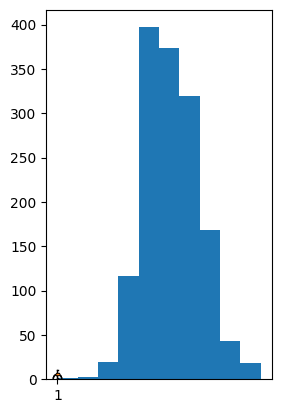

In [43]:
plt.subplot(1,2,1)
plt.boxplot(df['OverallQual'])
plt.subplot(1,2,1)
plt.hist(df['OverallQual'])

**************************************************
Logs for LotFrontage
IQR for LotFrontage is inter_quartile_range


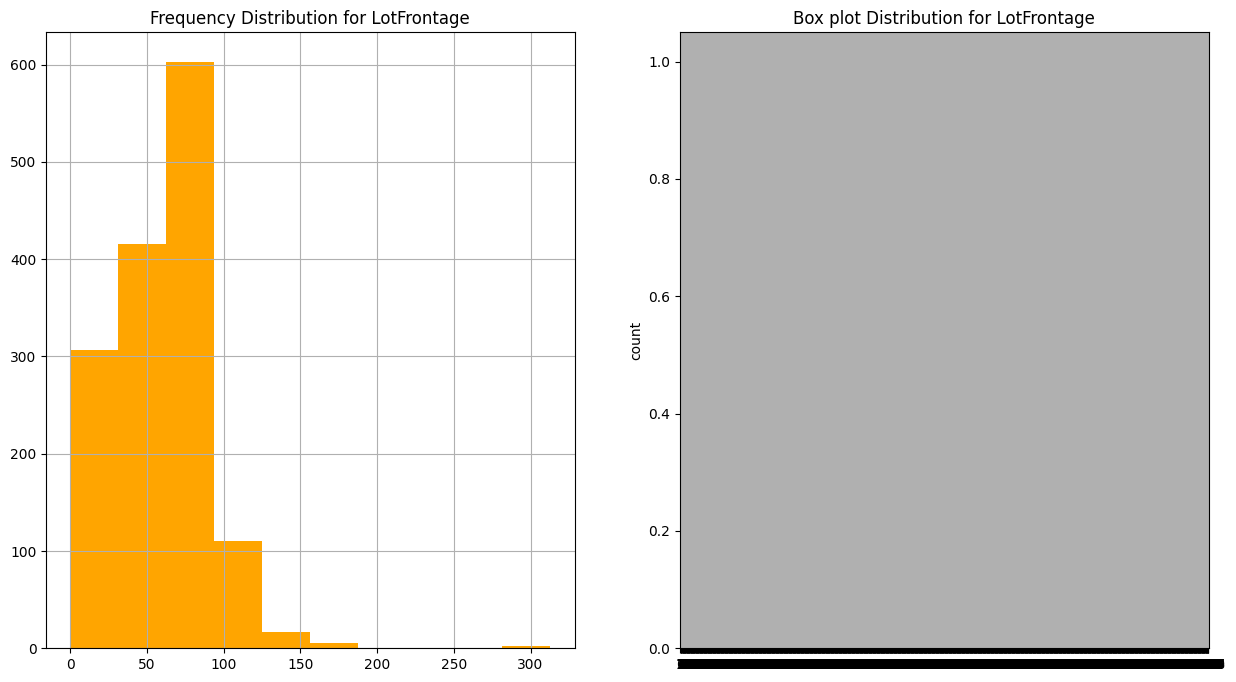

**************************************************
**************************************************
Logs for LotArea
IQR for LotArea is inter_quartile_range


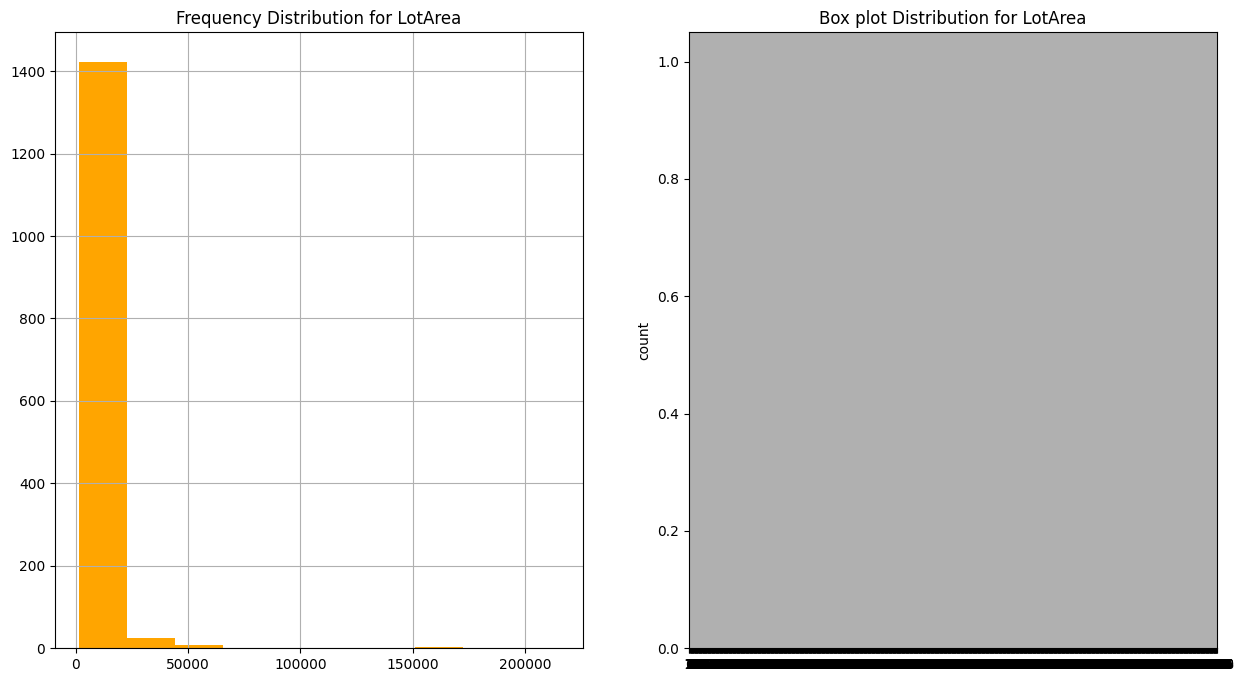

**************************************************
**************************************************
Logs for OverallQual
IQR for OverallQual is inter_quartile_range


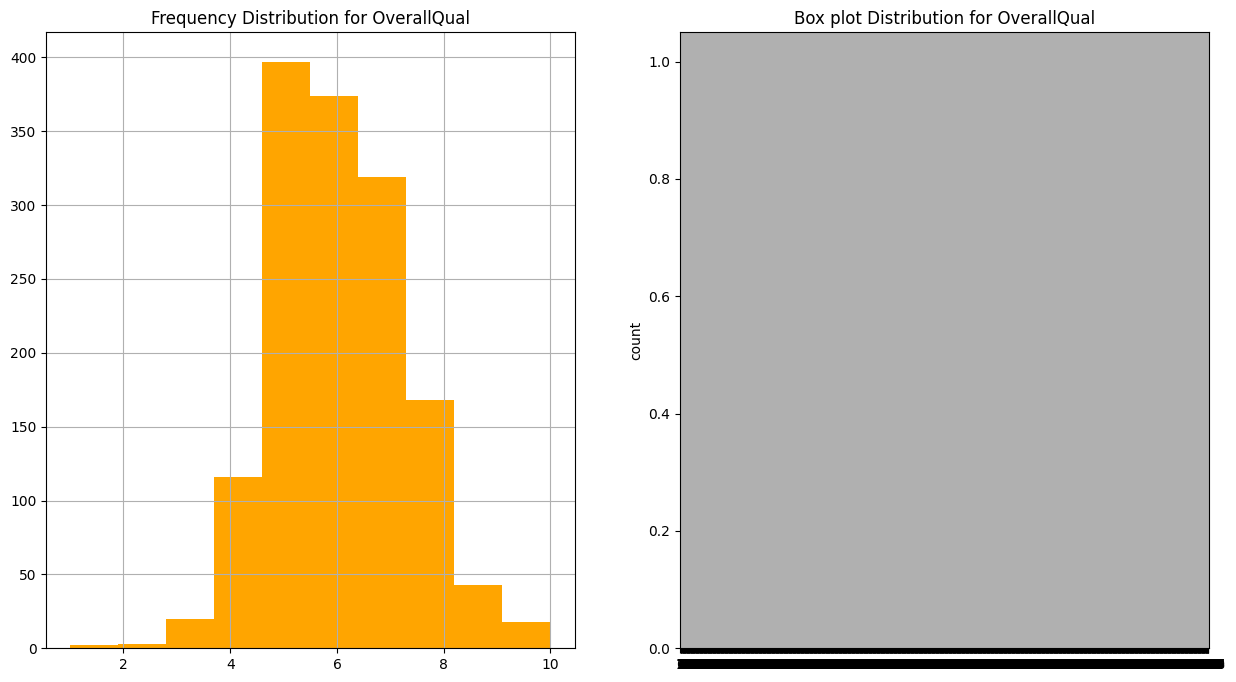

**************************************************
**************************************************
Logs for OverallCond
IQR for OverallCond is inter_quartile_range


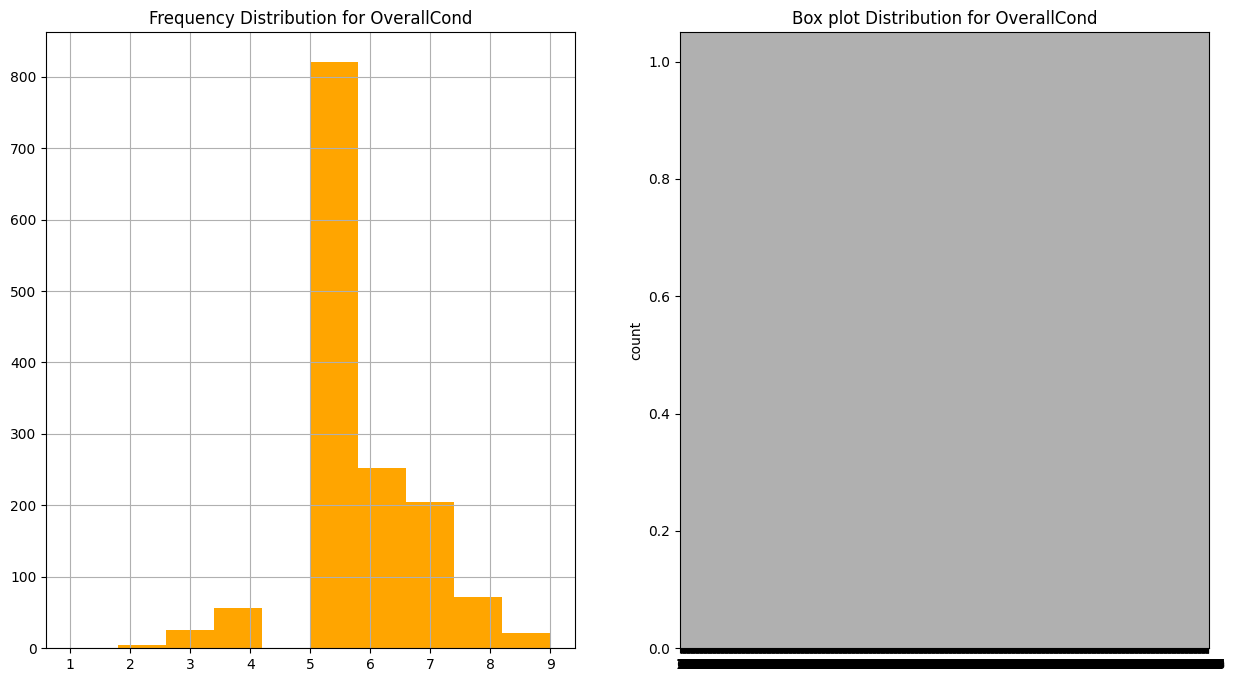

**************************************************
**************************************************
Logs for YearBuilt
IQR for YearBuilt is inter_quartile_range


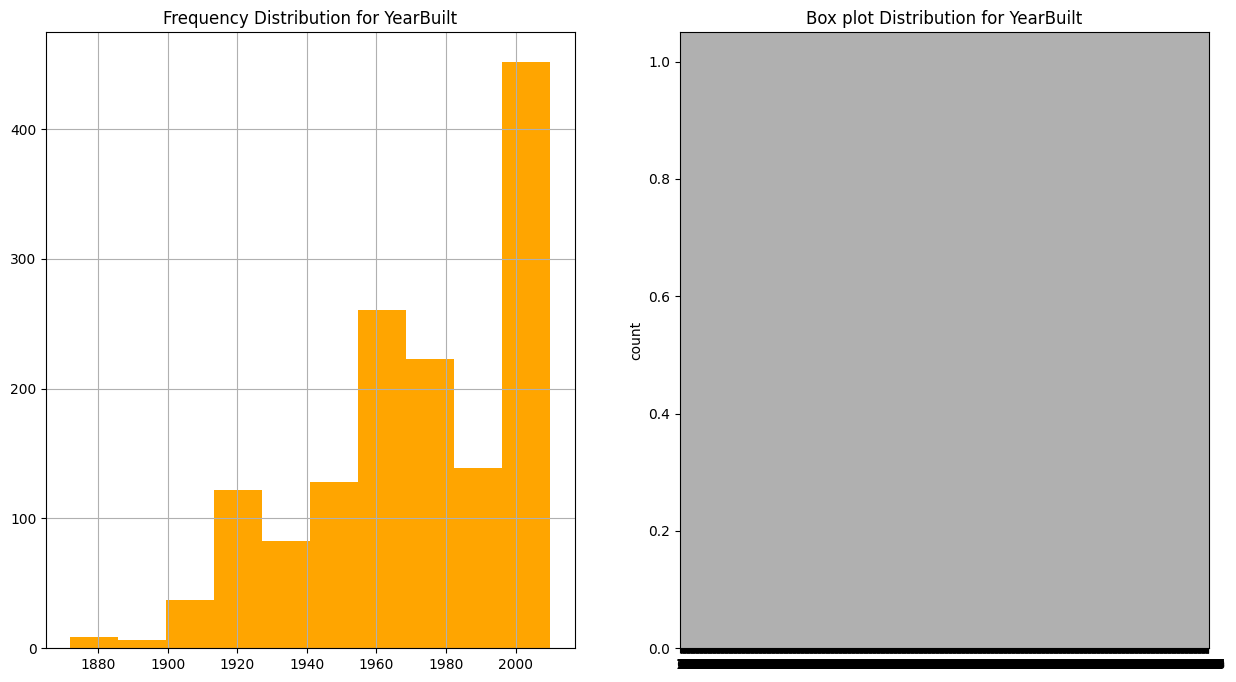

**************************************************
**************************************************
Logs for YearRemodAdd
IQR for YearRemodAdd is inter_quartile_range


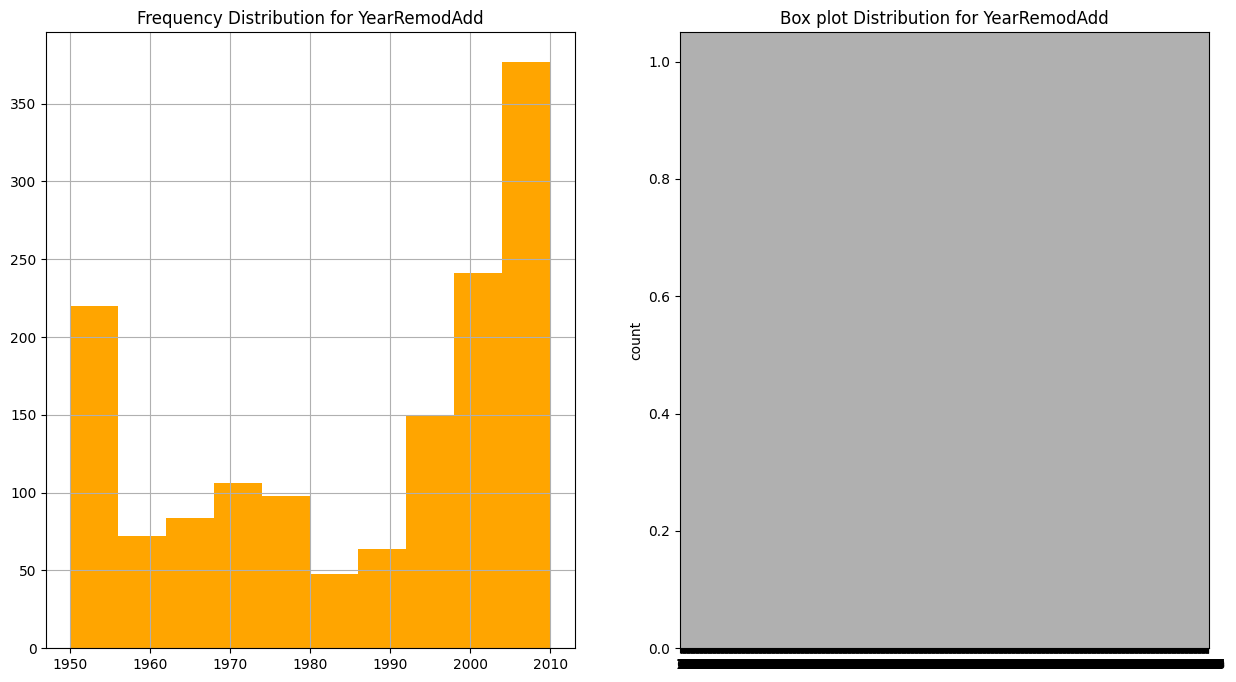

**************************************************
**************************************************
Logs for MasVnrArea
IQR for MasVnrArea is inter_quartile_range


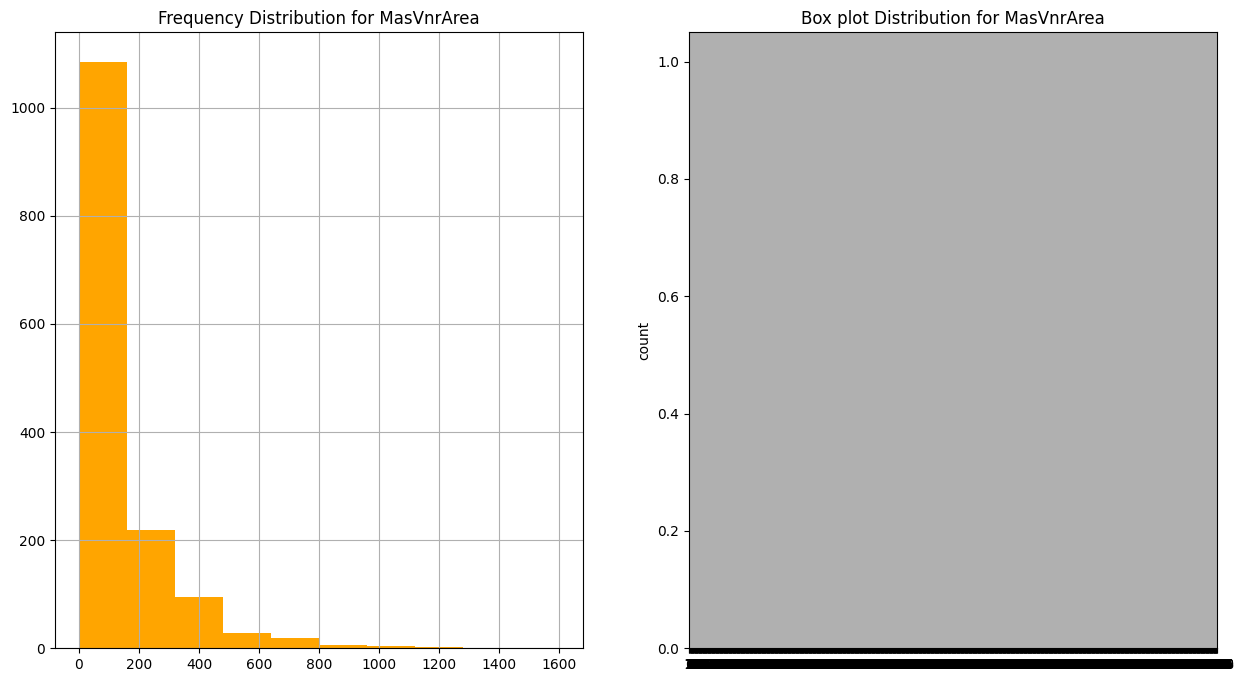

**************************************************
**************************************************
Logs for BsmtFinSF1
IQR for BsmtFinSF1 is inter_quartile_range


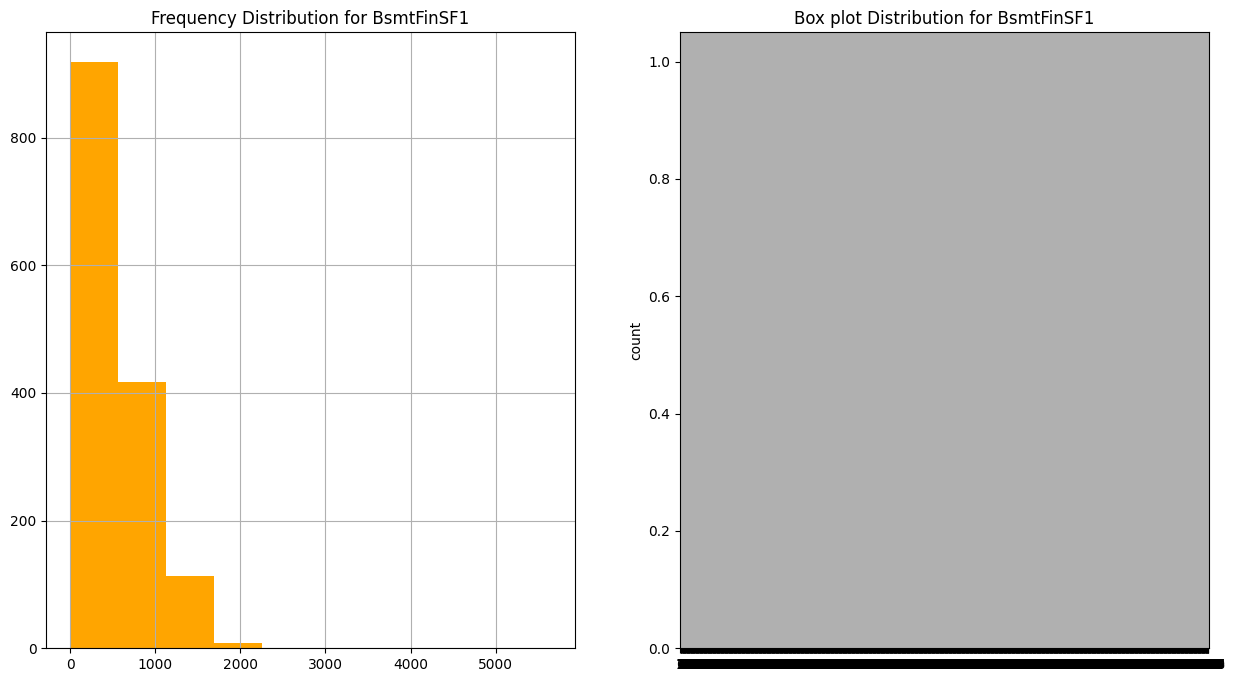

**************************************************
**************************************************
Logs for BsmtFinSF2
IQR for BsmtFinSF2 is inter_quartile_range


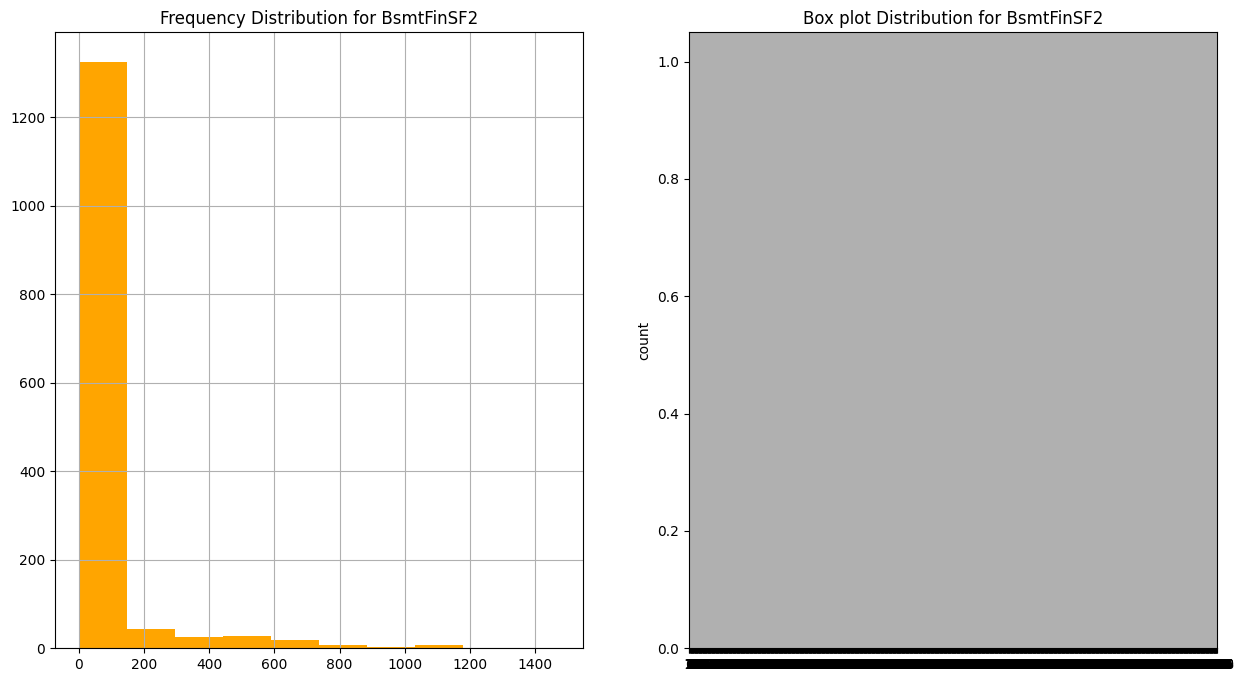

**************************************************
**************************************************
Logs for BsmtUnfSF
IQR for BsmtUnfSF is inter_quartile_range


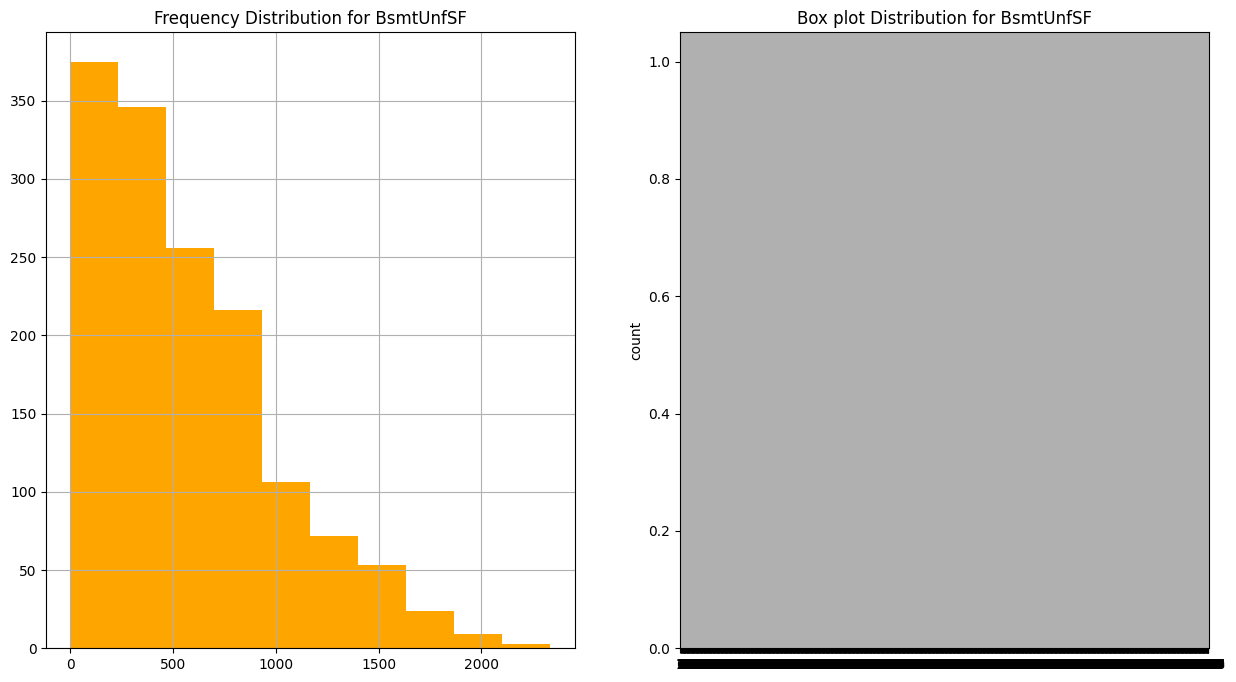

**************************************************
**************************************************
Logs for TotalBsmtSF
IQR for TotalBsmtSF is inter_quartile_range


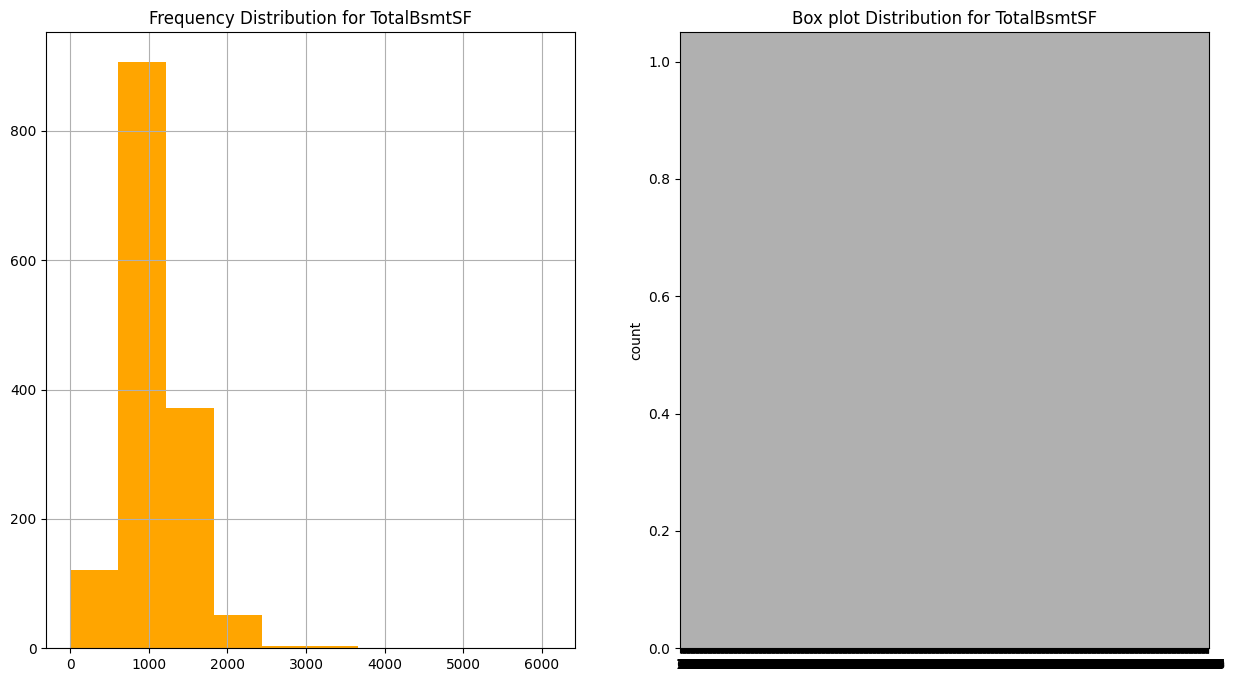

**************************************************
**************************************************
Logs for 1stFlrSF
IQR for 1stFlrSF is inter_quartile_range


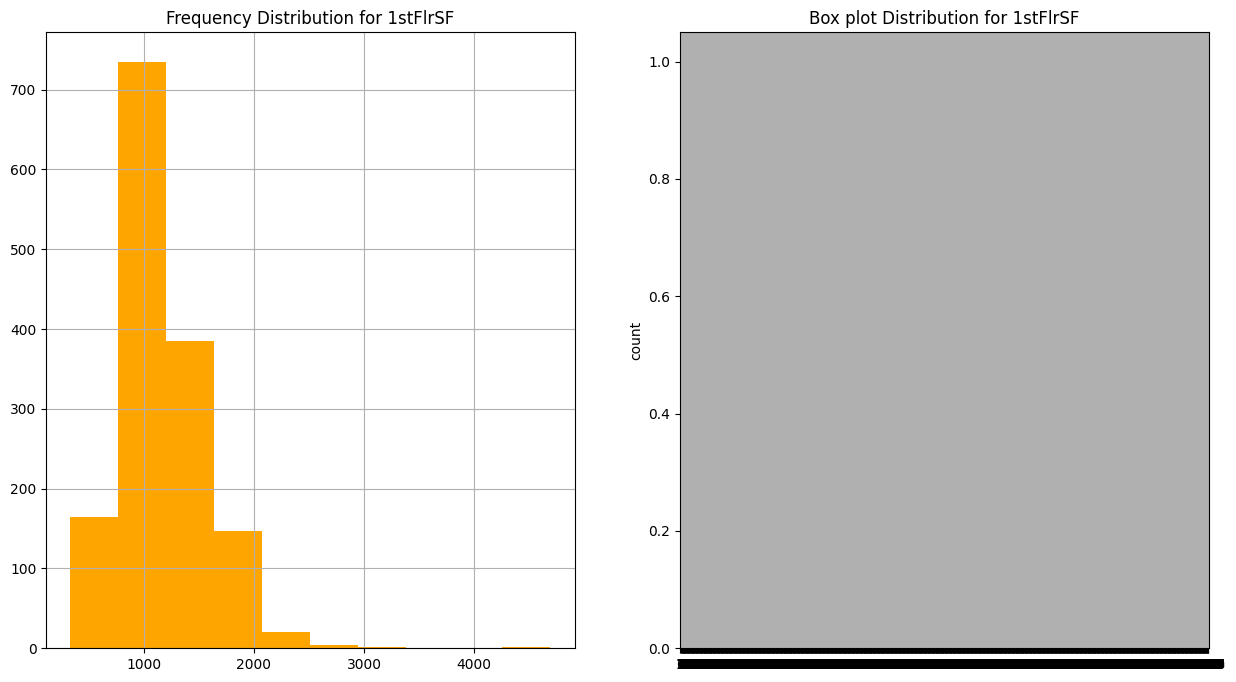

**************************************************
**************************************************
Logs for 2ndFlrSF
IQR for 2ndFlrSF is inter_quartile_range


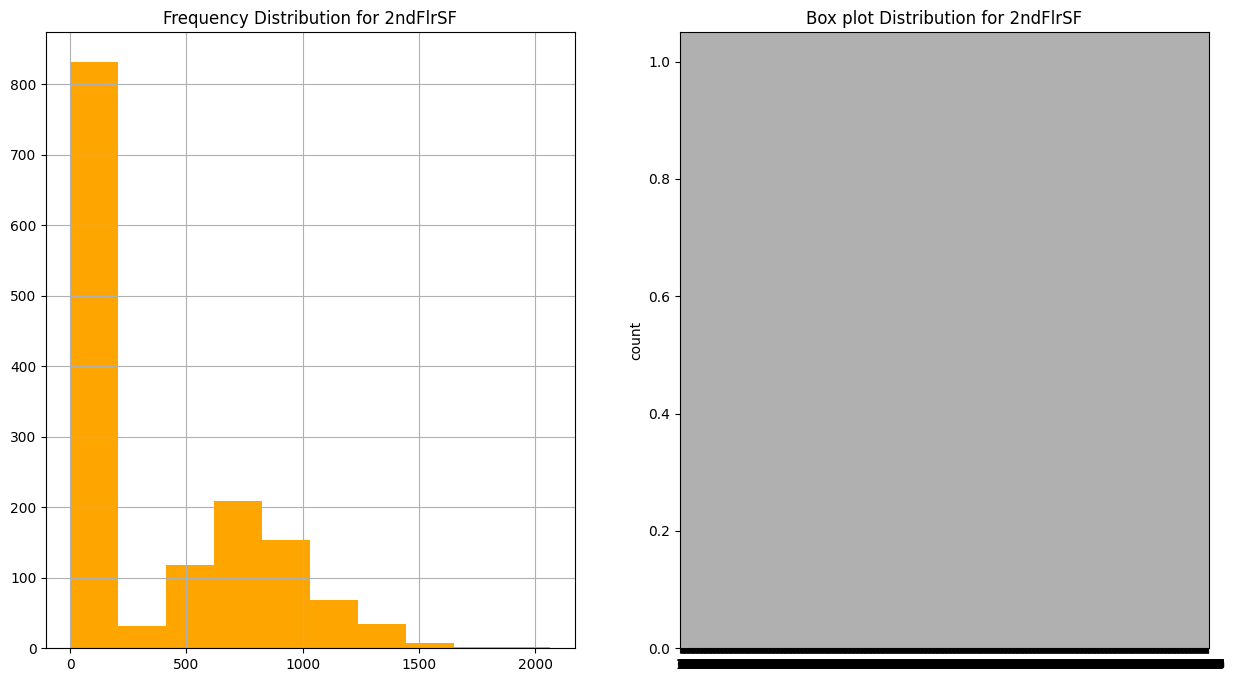

**************************************************
**************************************************
Logs for LowQualFinSF
IQR for LowQualFinSF is inter_quartile_range


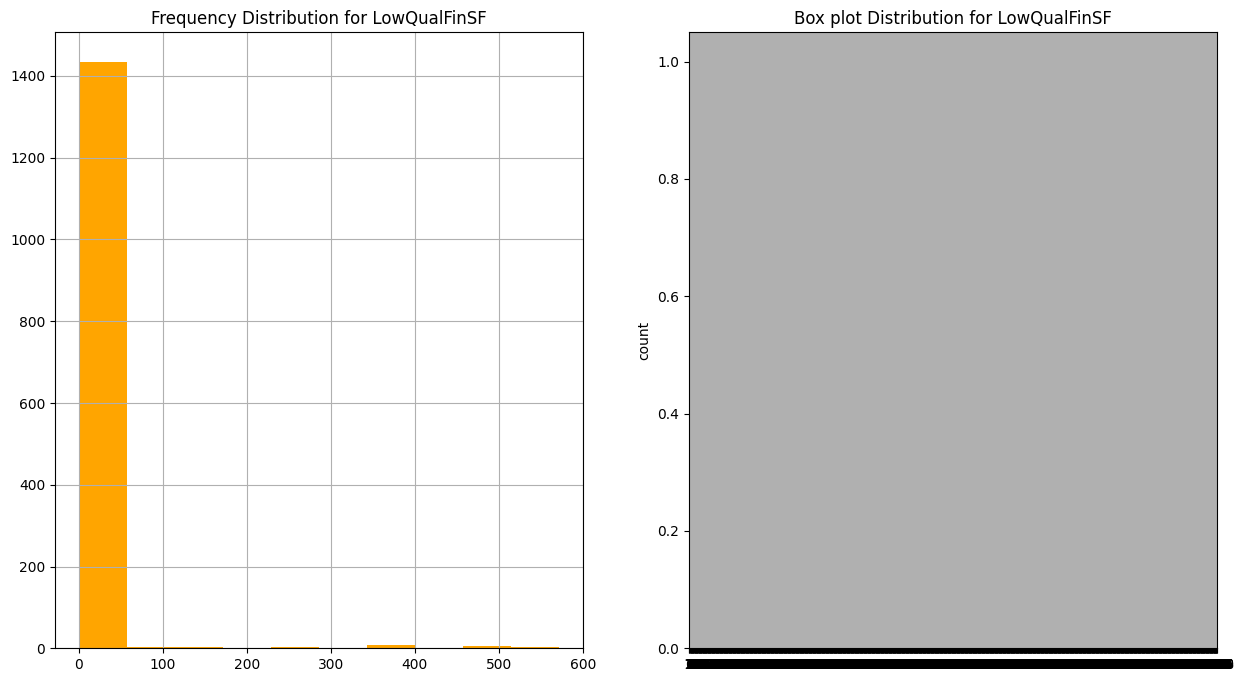

**************************************************
**************************************************
Logs for GrLivArea
IQR for GrLivArea is inter_quartile_range


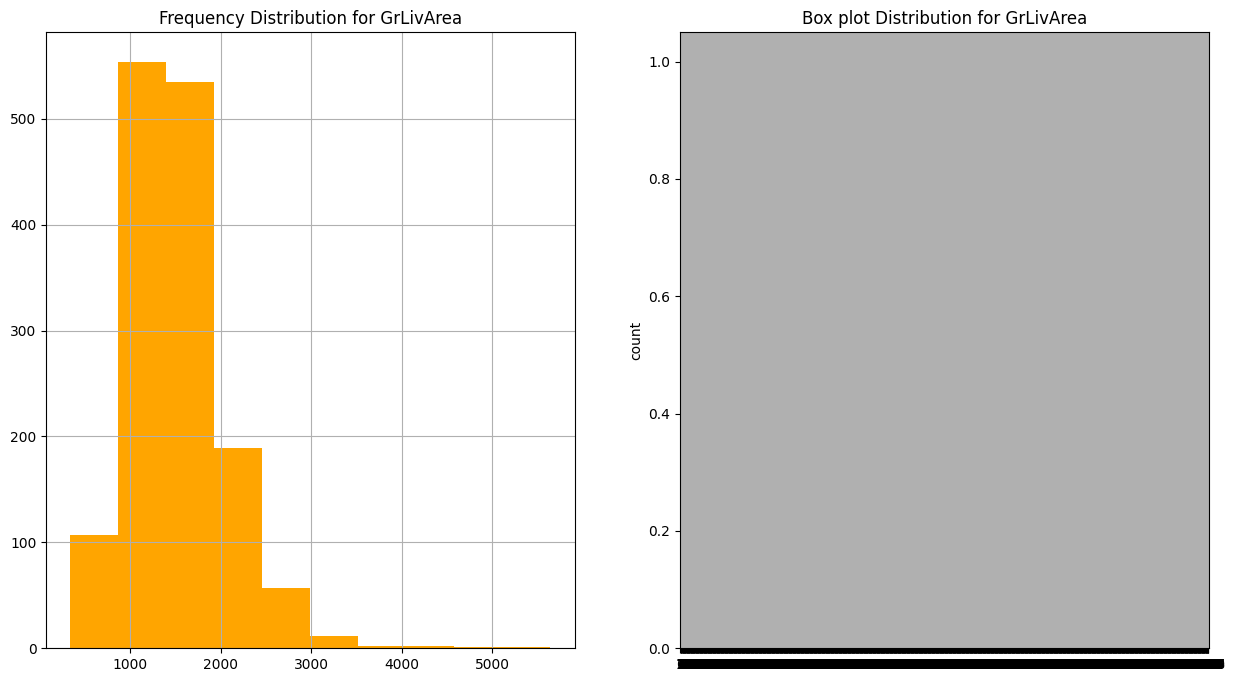

**************************************************
**************************************************
Logs for BsmtFullBath
IQR for BsmtFullBath is inter_quartile_range


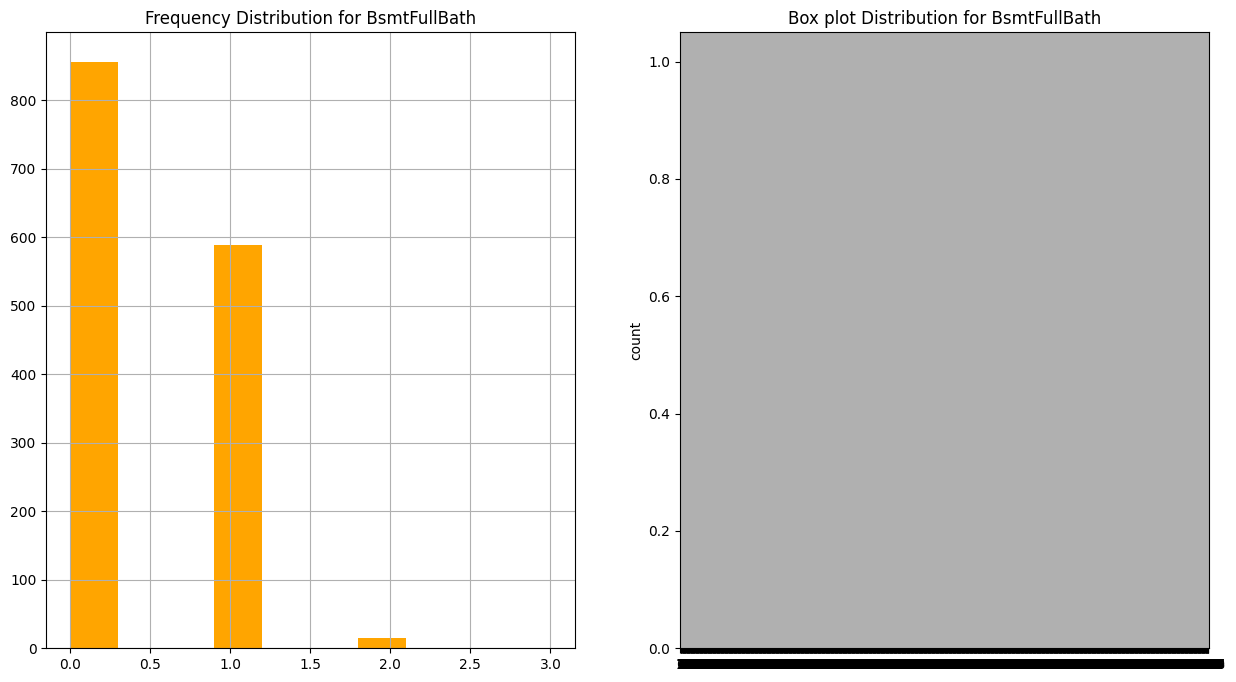

**************************************************
**************************************************
Logs for BsmtHalfBath
IQR for BsmtHalfBath is inter_quartile_range


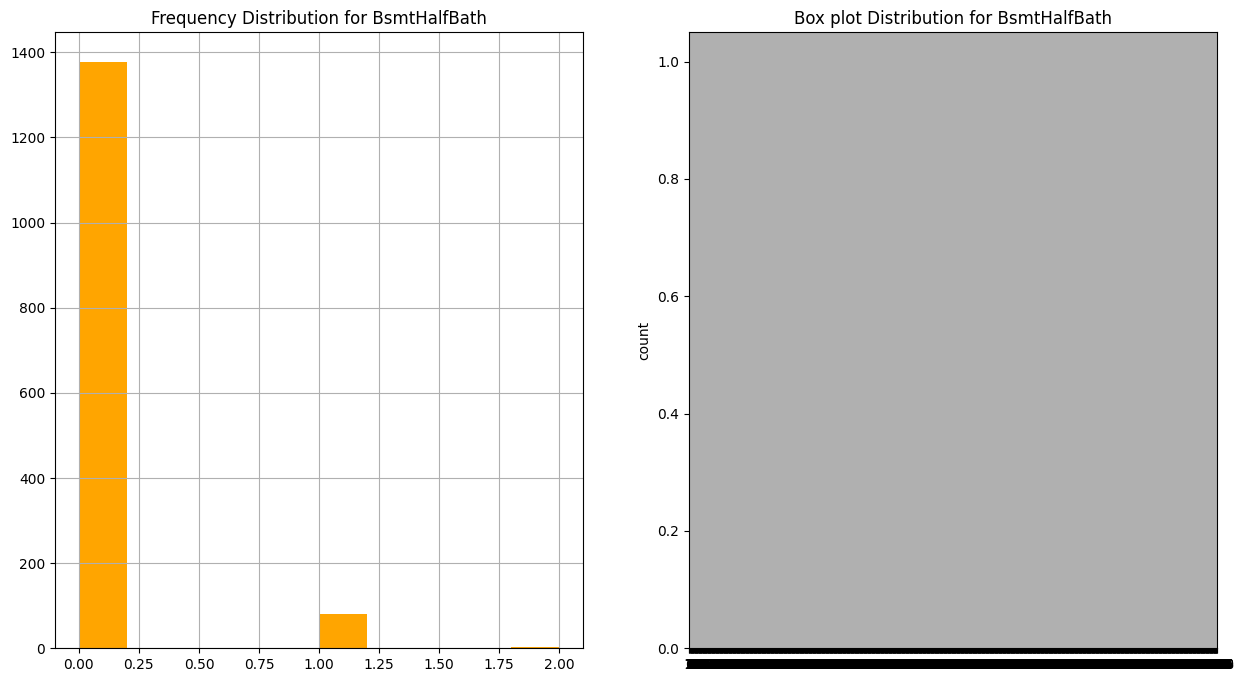

**************************************************
**************************************************
Logs for FullBath
IQR for FullBath is inter_quartile_range


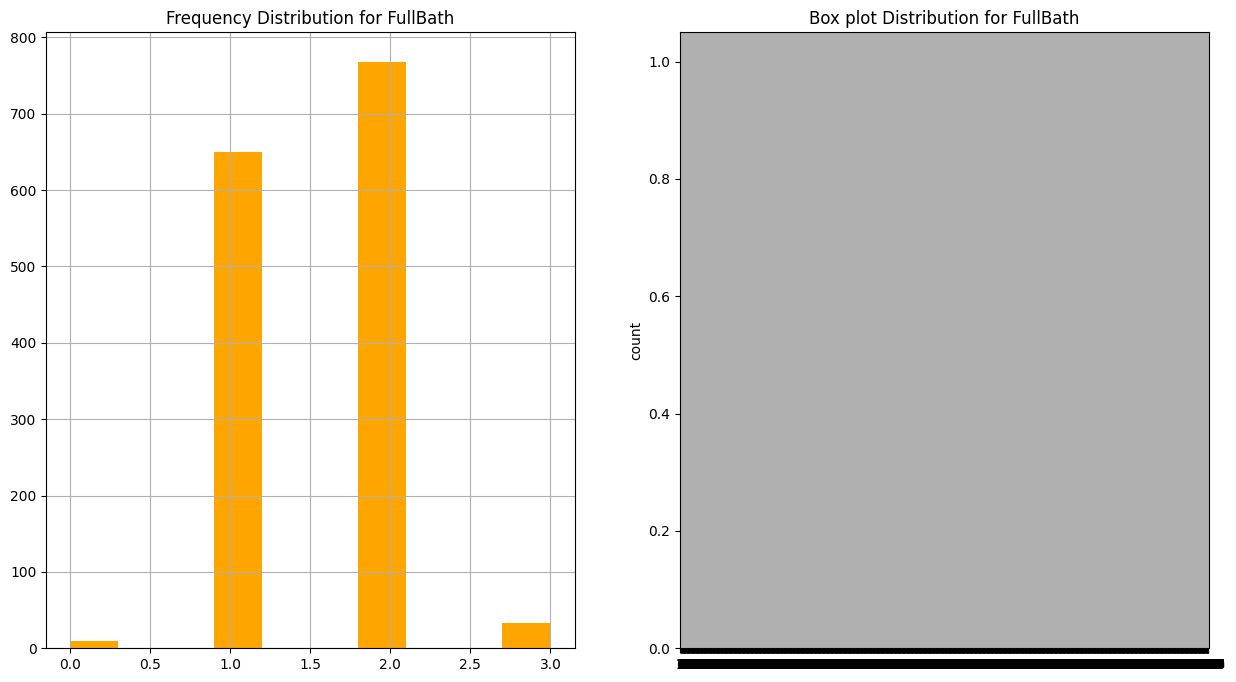

**************************************************
**************************************************
Logs for HalfBath
IQR for HalfBath is inter_quartile_range


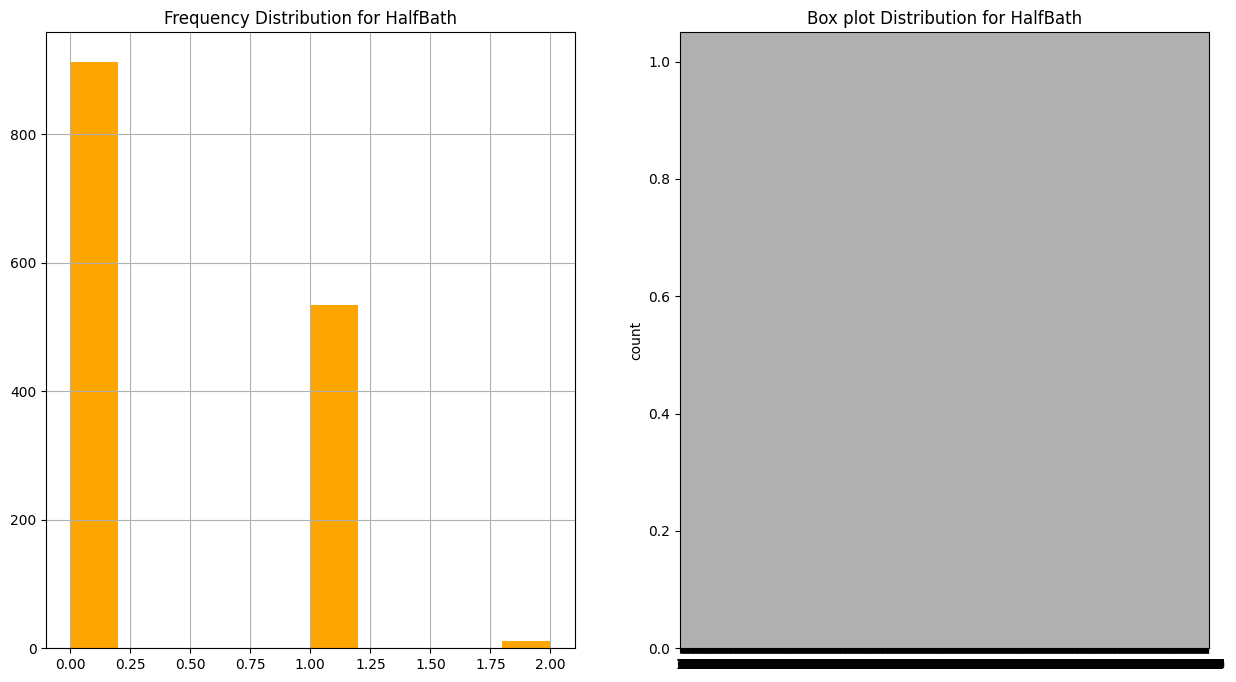

**************************************************
**************************************************
Logs for BedroomAbvGr
IQR for BedroomAbvGr is inter_quartile_range


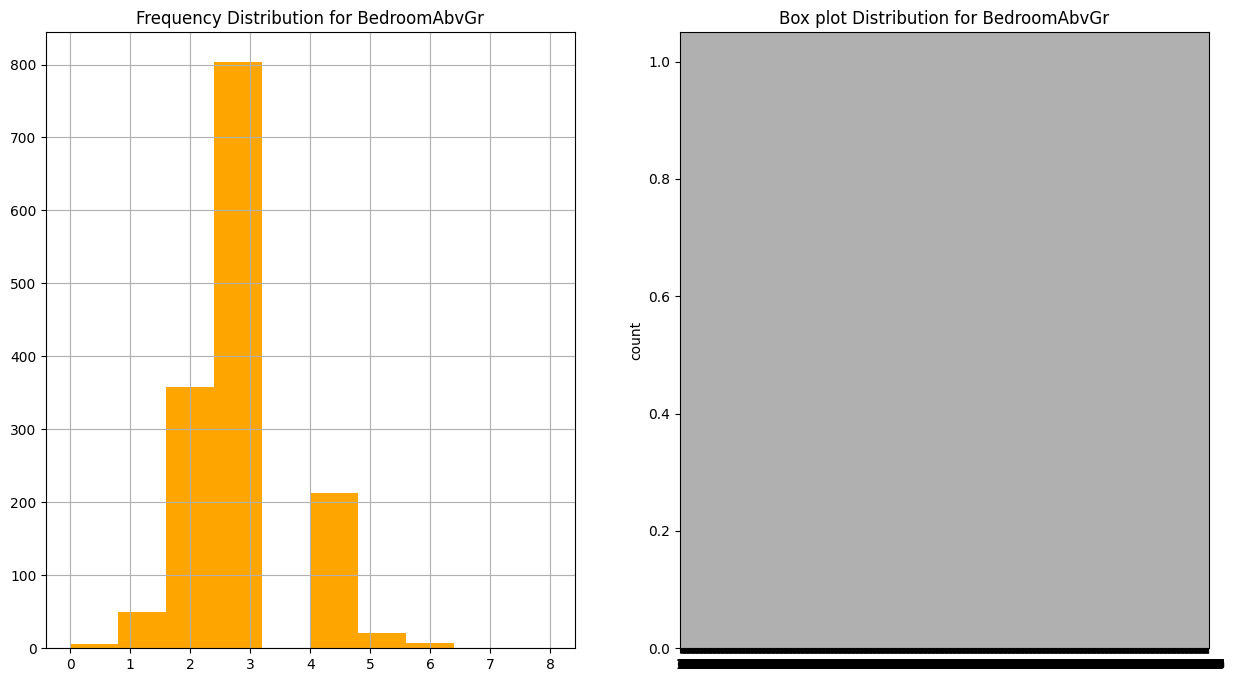

**************************************************
**************************************************
Logs for KitchenAbvGr
IQR for KitchenAbvGr is inter_quartile_range


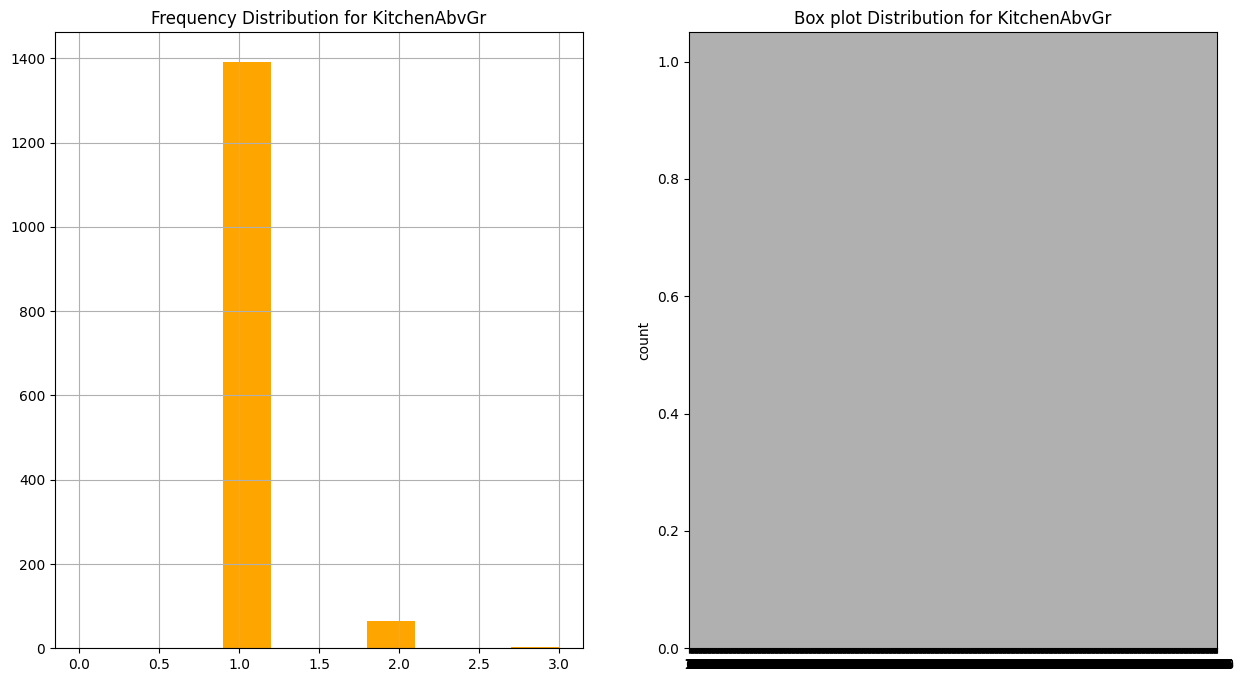

**************************************************
**************************************************
Logs for TotRmsAbvGrd
IQR for TotRmsAbvGrd is inter_quartile_range


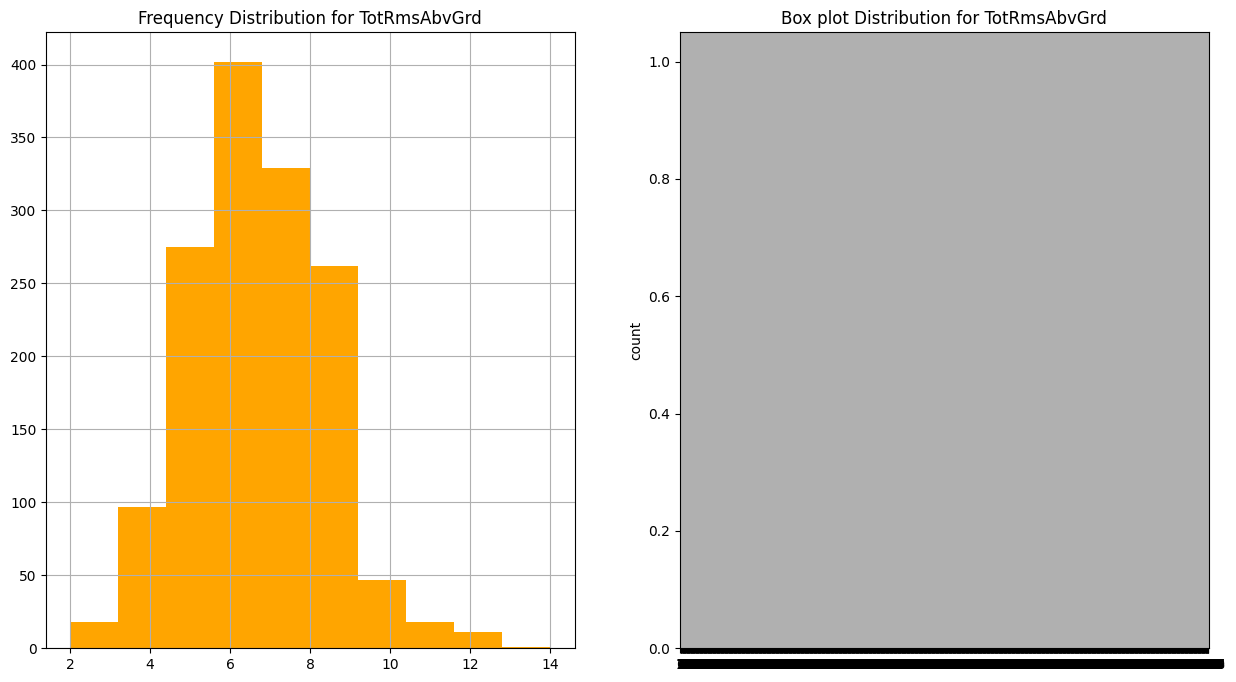

**************************************************
**************************************************
Logs for Fireplaces
IQR for Fireplaces is inter_quartile_range


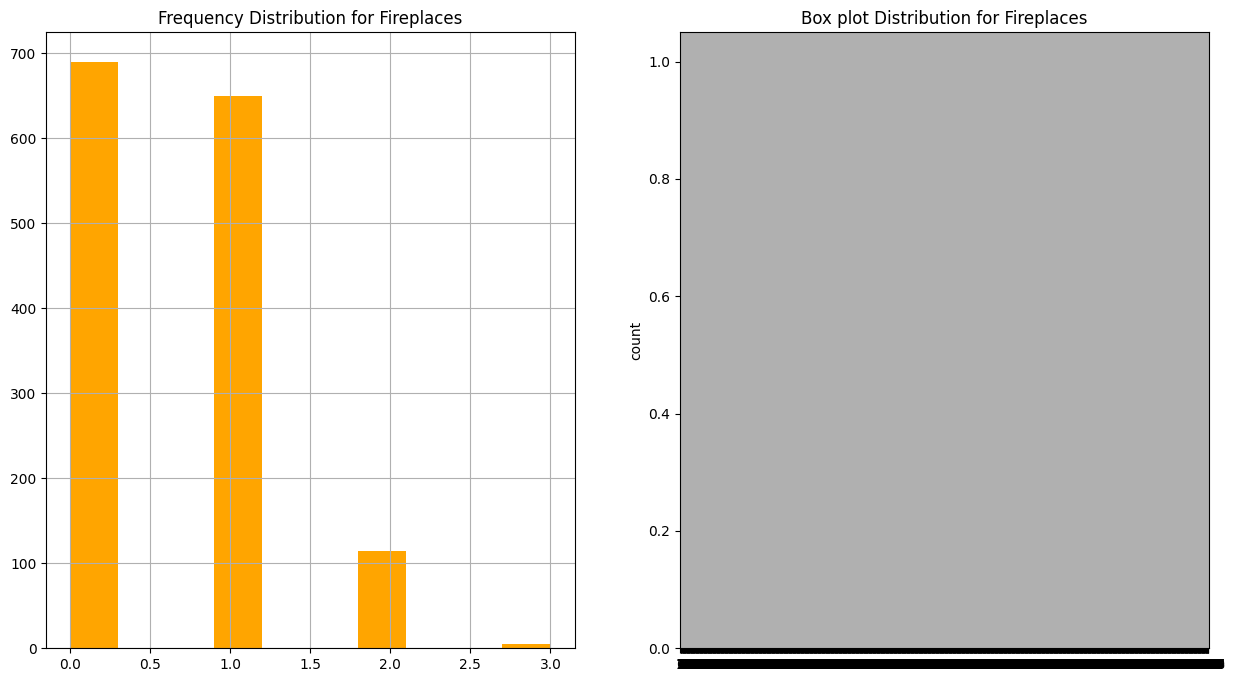

**************************************************
**************************************************
Logs for GarageYrBlt
IQR for GarageYrBlt is inter_quartile_range


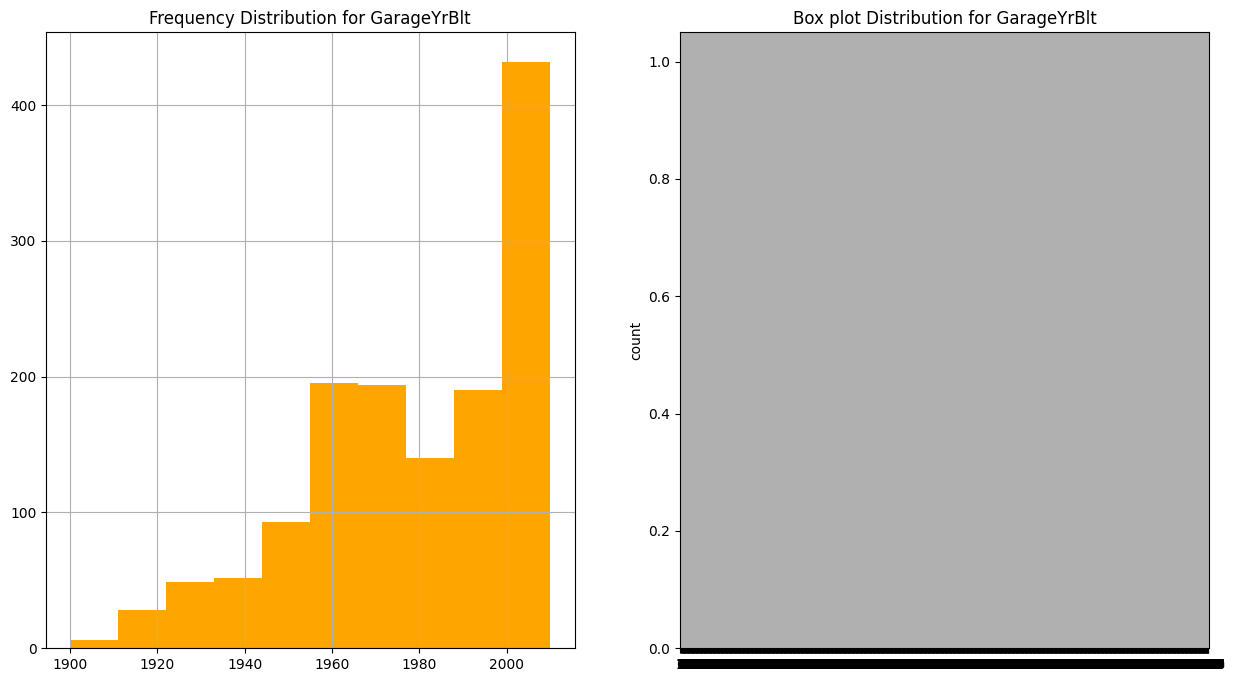

**************************************************
**************************************************
Logs for GarageCars
IQR for GarageCars is inter_quartile_range


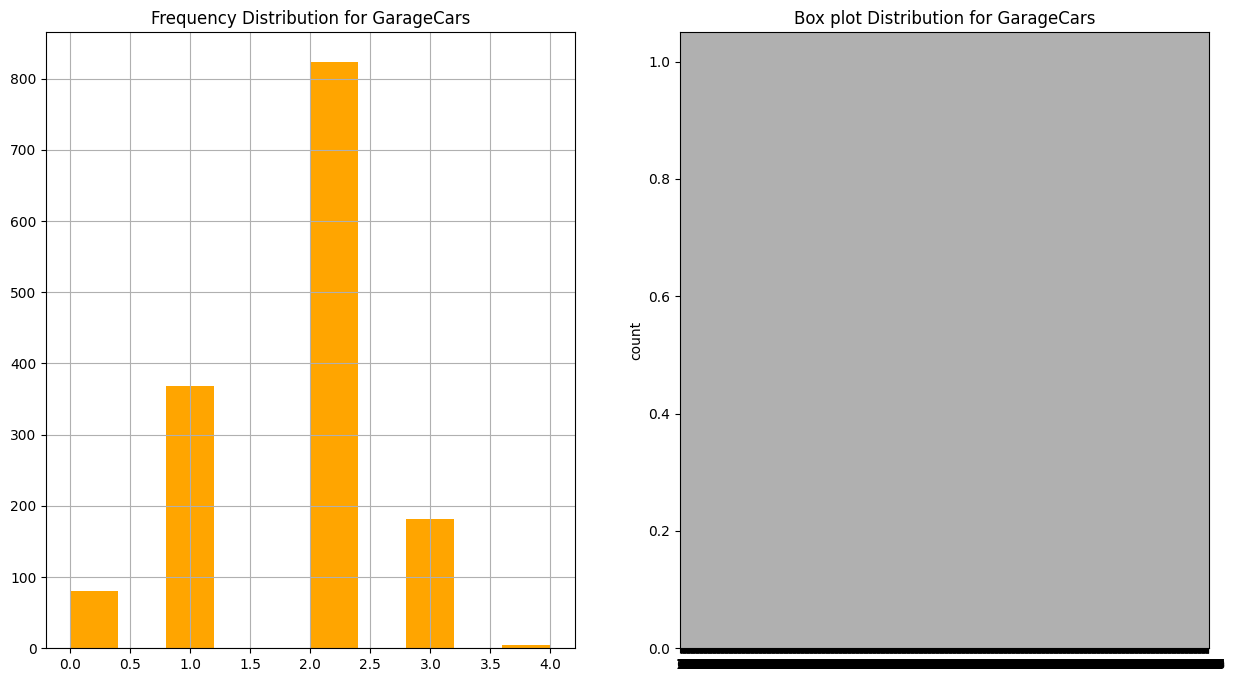

**************************************************
**************************************************
Logs for GarageArea
IQR for GarageArea is inter_quartile_range


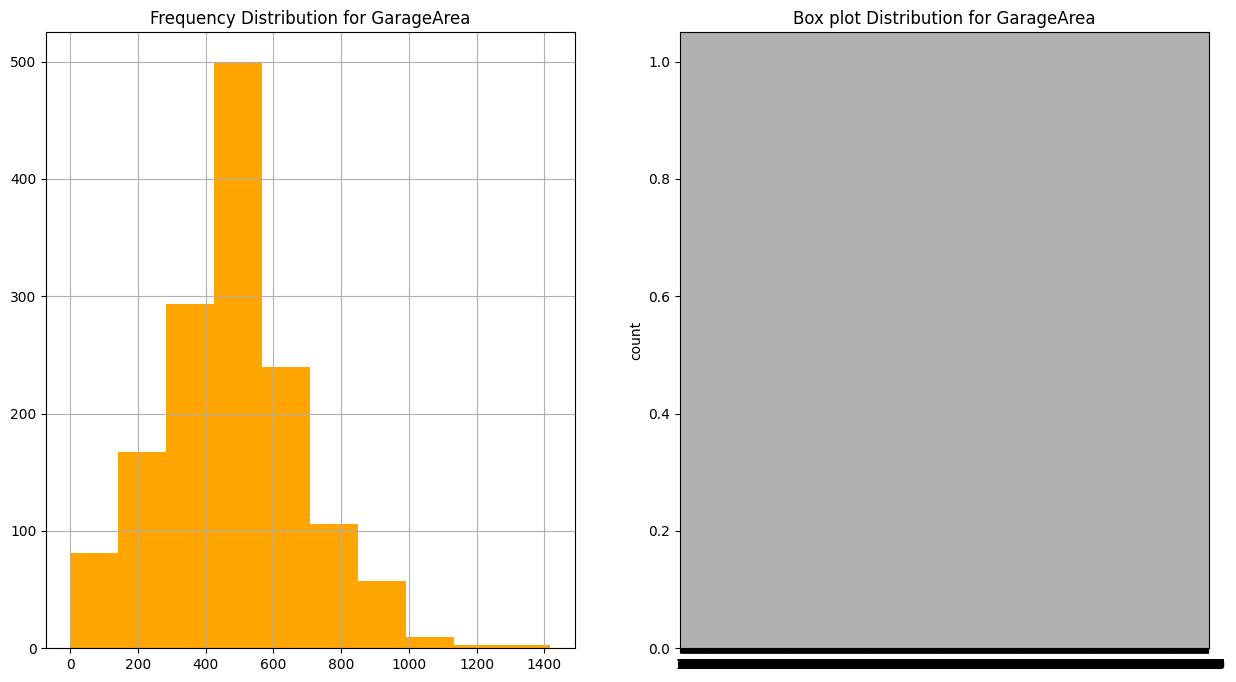

**************************************************
**************************************************
Logs for WoodDeckSF
IQR for WoodDeckSF is inter_quartile_range


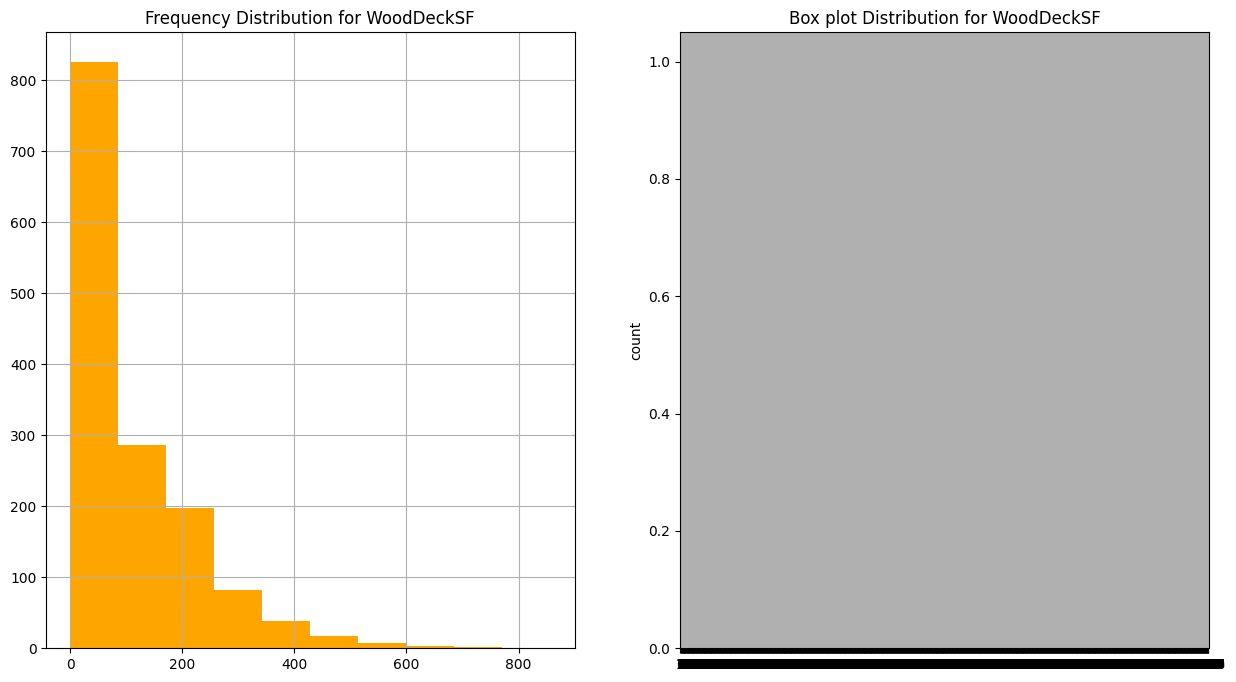

**************************************************
**************************************************
Logs for OpenPorchSF
IQR for OpenPorchSF is inter_quartile_range


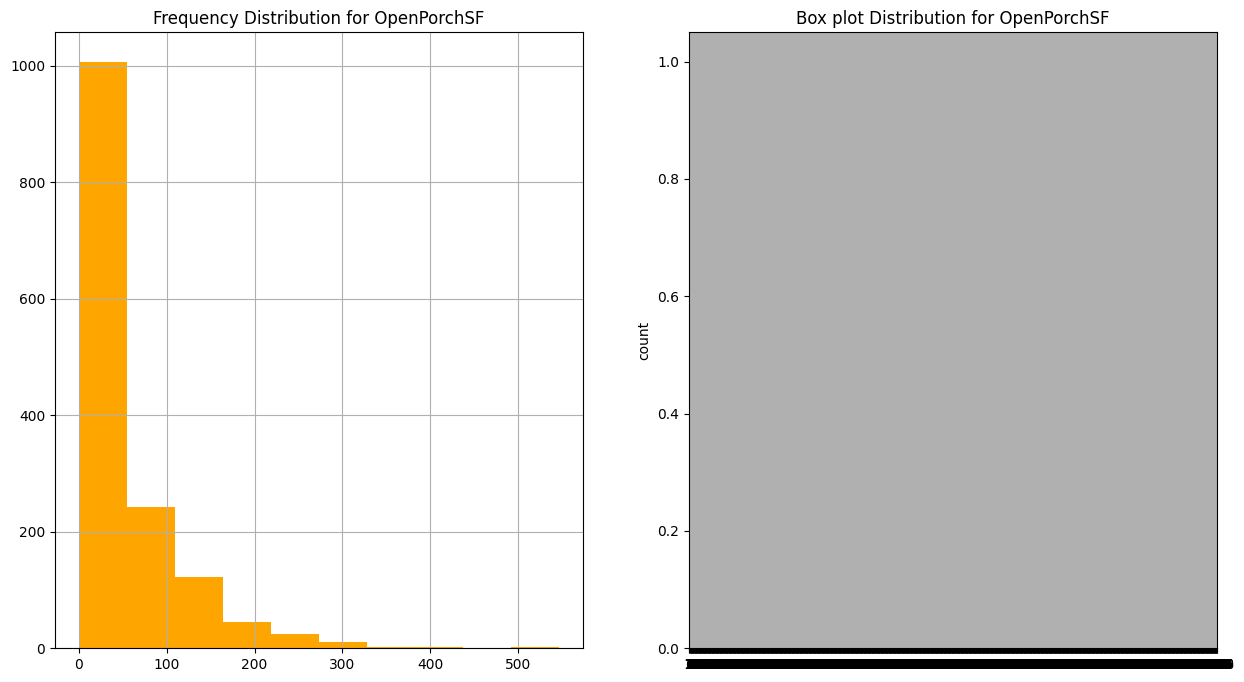

**************************************************
**************************************************
Logs for EnclosedPorch
IQR for EnclosedPorch is inter_quartile_range


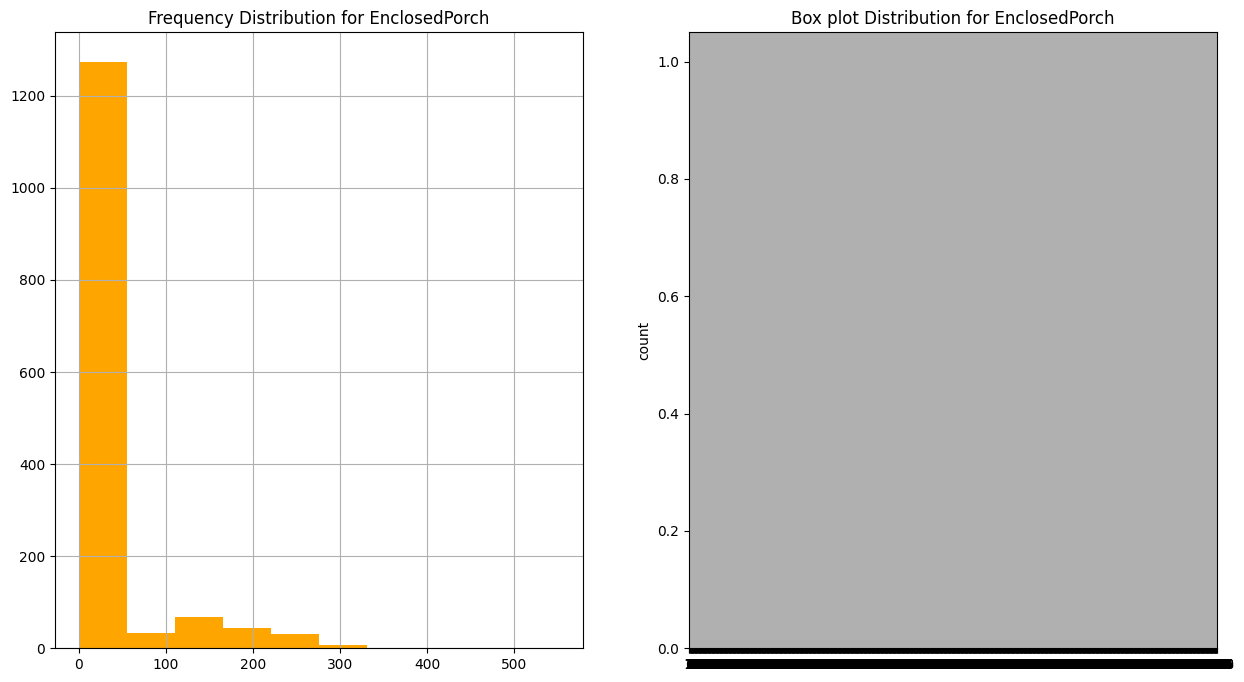

**************************************************
**************************************************
Logs for 3SsnPorch
IQR for 3SsnPorch is inter_quartile_range


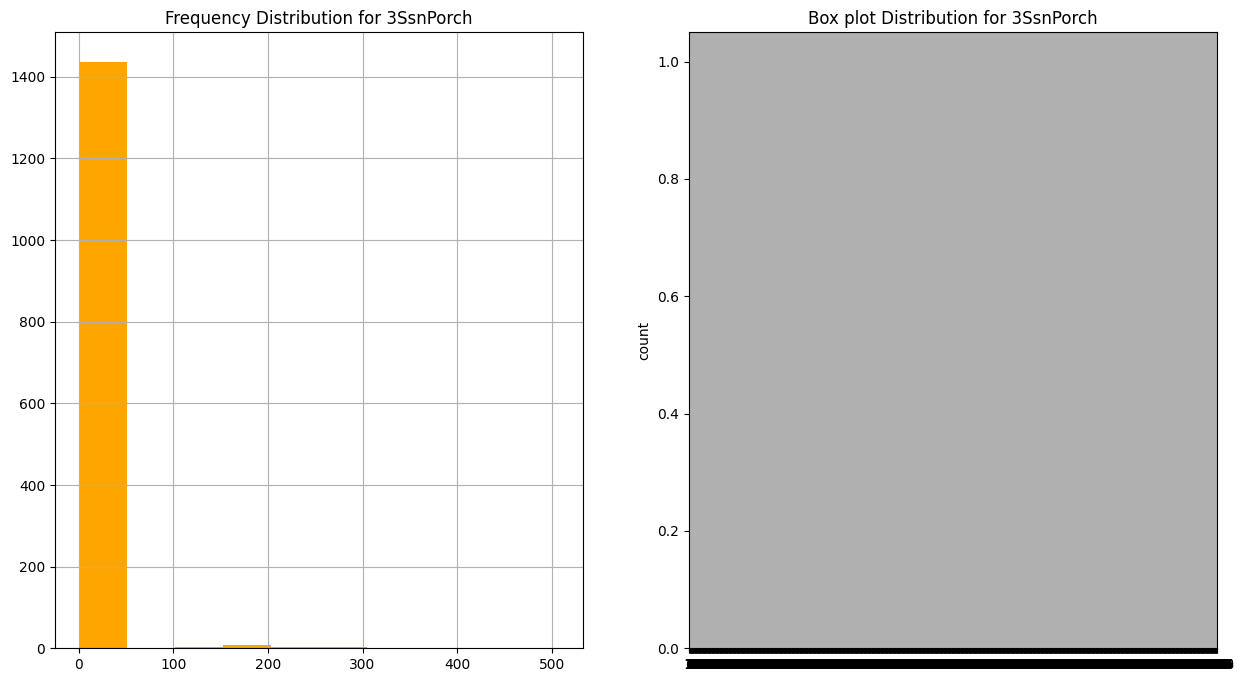

**************************************************
**************************************************
Logs for ScreenPorch
IQR for ScreenPorch is inter_quartile_range


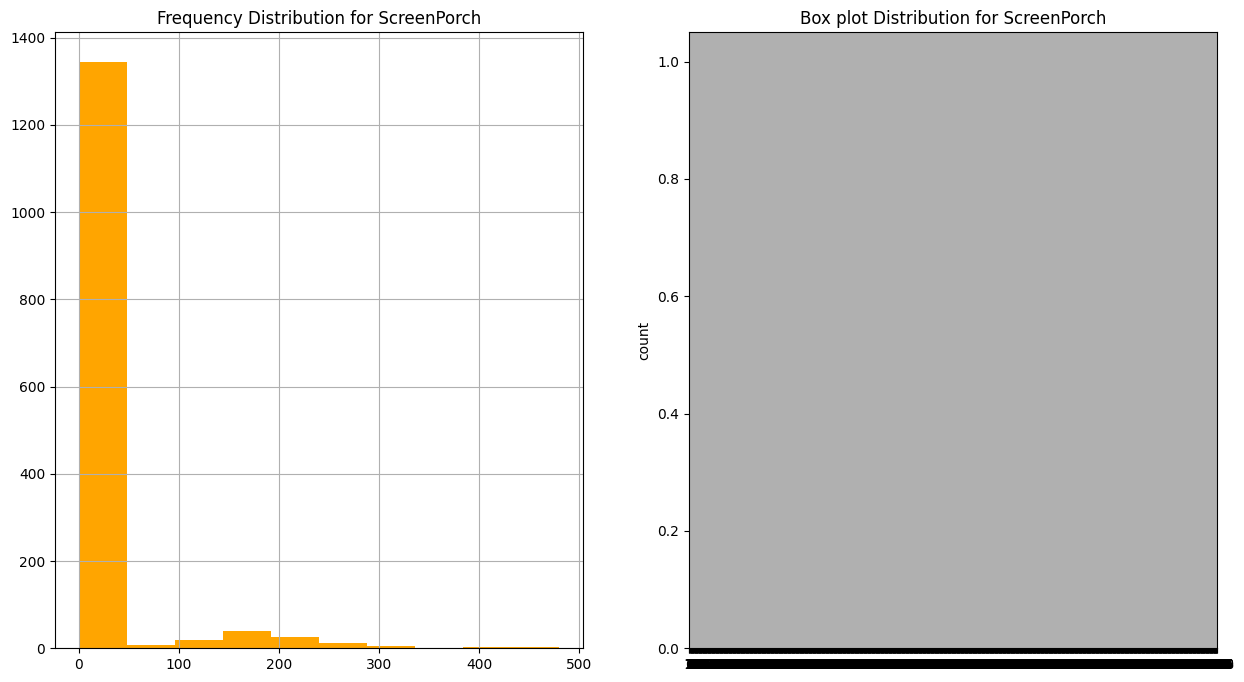

**************************************************
**************************************************
Logs for PoolArea
IQR for PoolArea is inter_quartile_range


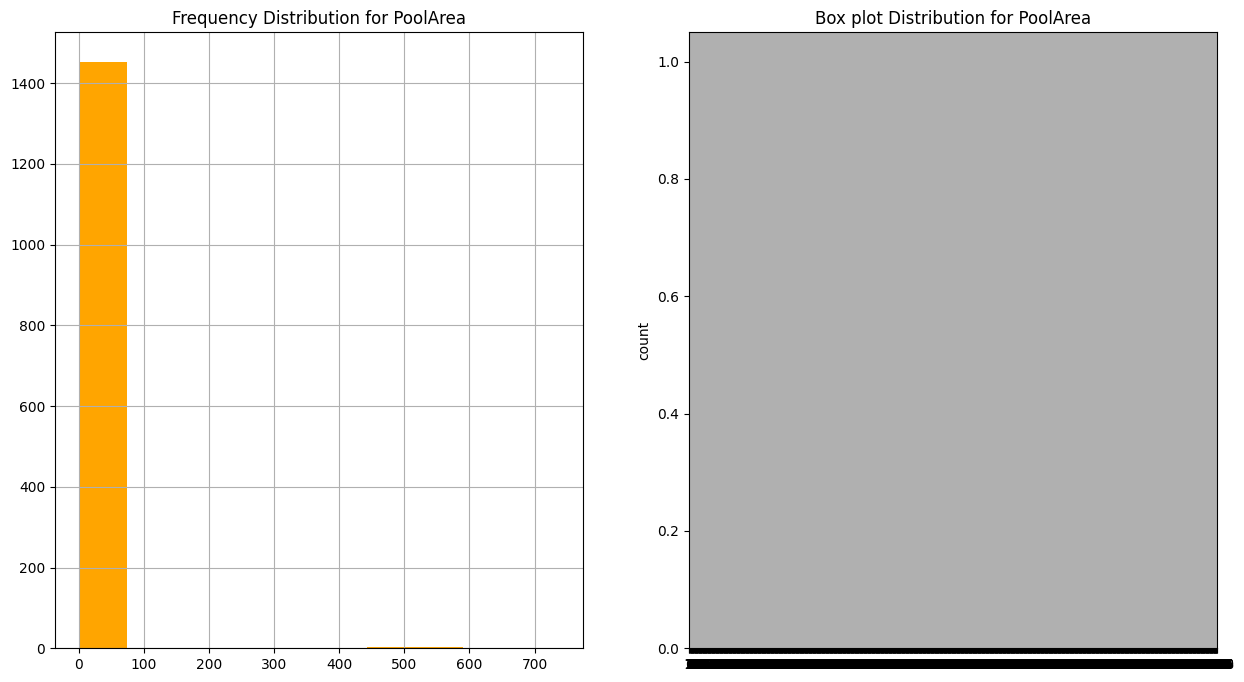

**************************************************
**************************************************
Logs for MiscVal
IQR for MiscVal is inter_quartile_range


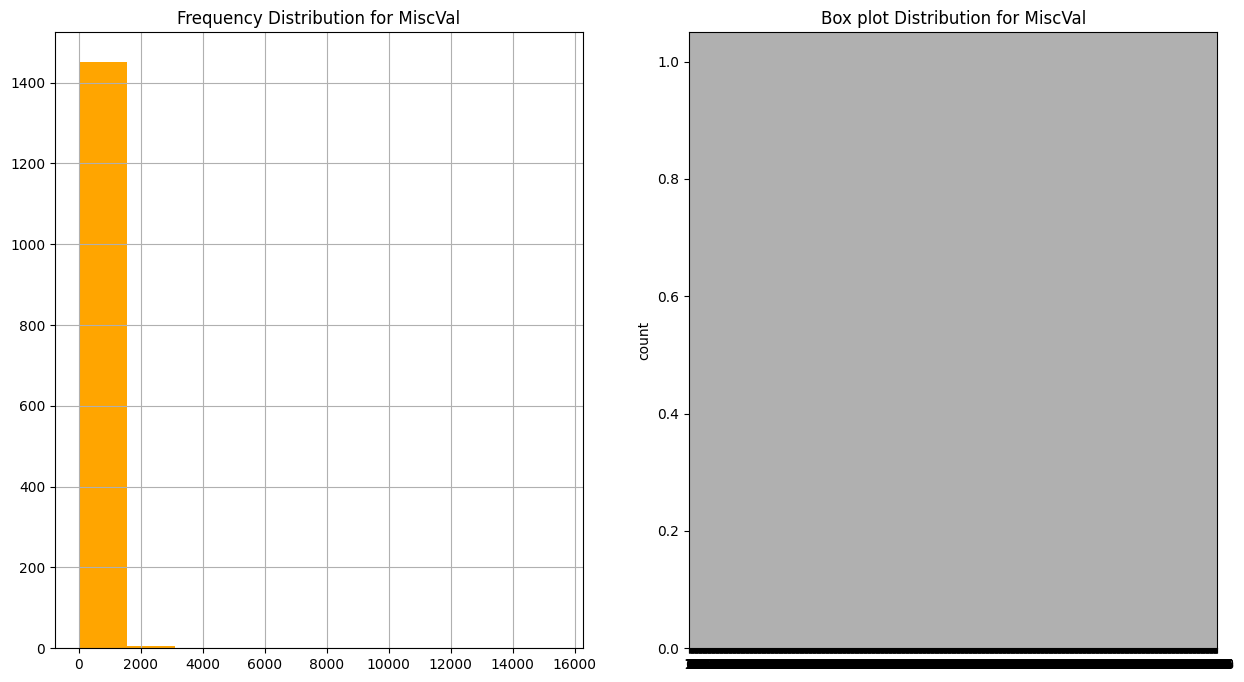

**************************************************
**************************************************
Logs for YrSold
IQR for YrSold is inter_quartile_range


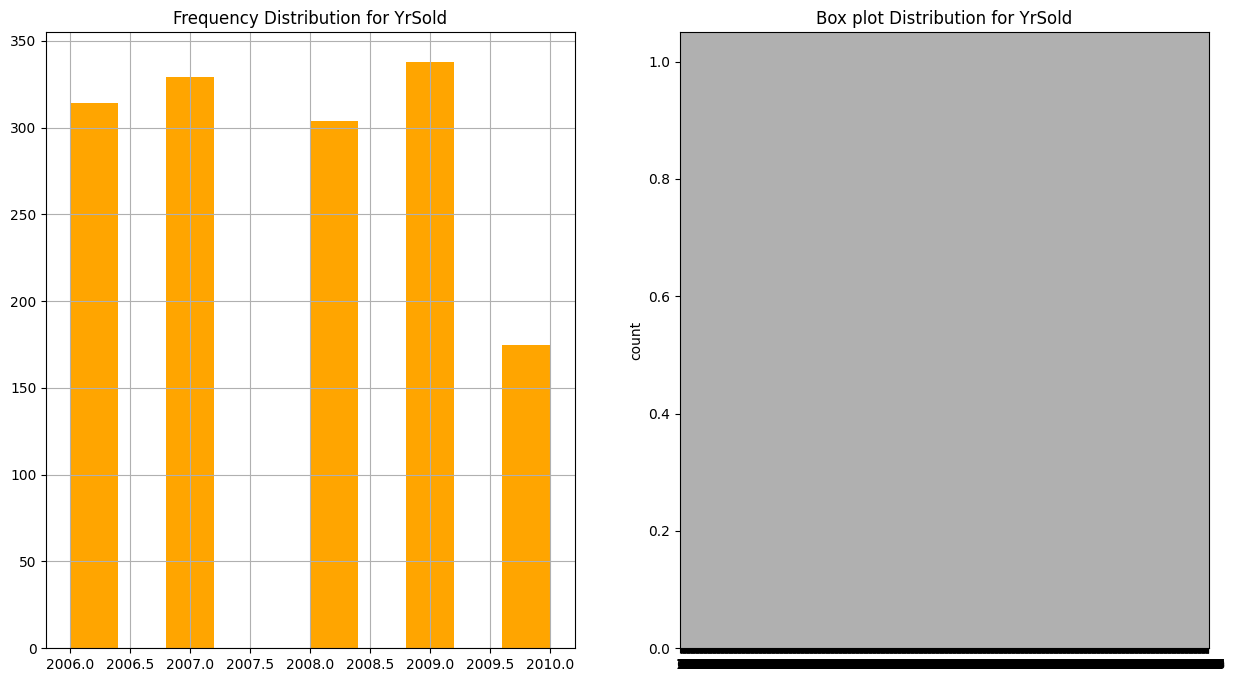

**************************************************
**************************************************
Logs for SalePrice
IQR for SalePrice is inter_quartile_range


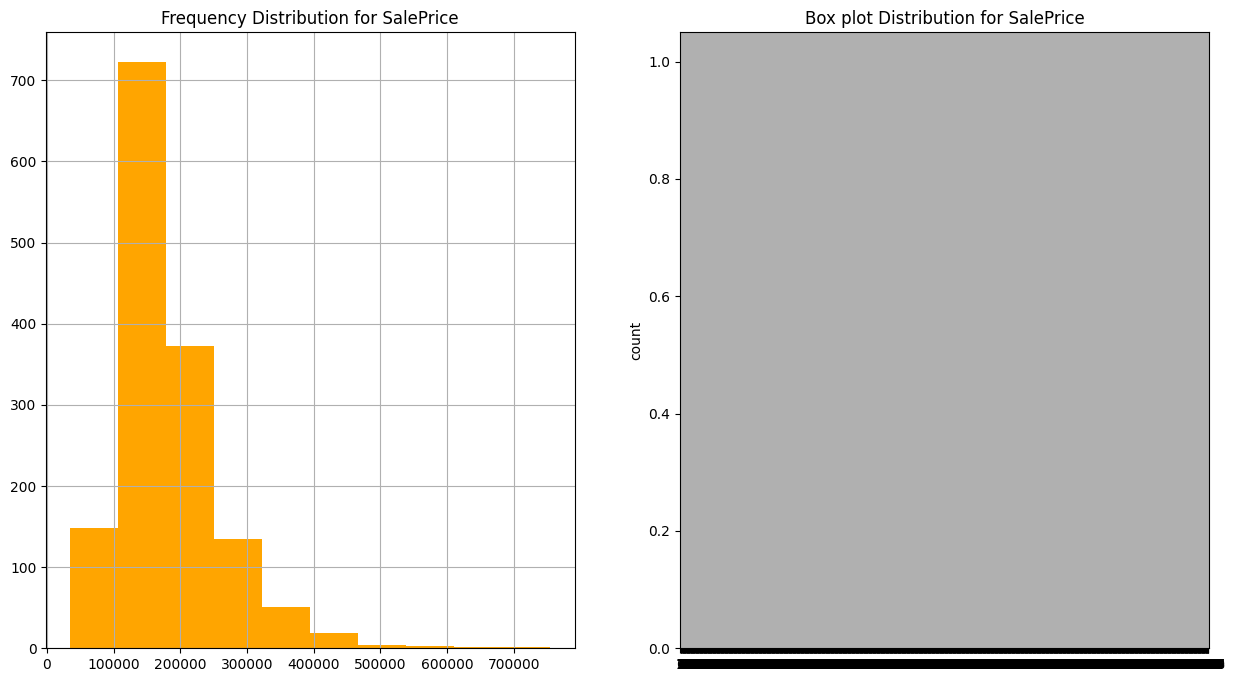

**************************************************


In [45]:
for col in numerical_list:
    print("*"*50)
    print(f"Logs for {col}")
    q1 =df.describe()[col]["25%"]
    q2 =df.describe()[col]["50%"]
    q3 =df.describe()[col]["75%"]
    q4 =df.describe()[col]["max"]
    inter_quartile_range = q3 - q1
    print(f"IQR for {col} is inter_quartile_range")
    plt.figure(figsize= [15,8])
    plt.subplot(1,2,1)
    plt.hist(df[col], color='orange')
    plt.grid()
    plt.title(f"Frequency Distribution for {col}")
    plt.subplot(1,2,2)
    sns.countplot(df[col], color='darkblue')
    plt.grid()
    plt.title(f"Box plot Distribution for {col}")
    plt.savefig(f"{col}_univariate_analysis.PNG")
    plt.show()
    print("*"*50)

In [51]:
categorical_list =['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'SaleType',
 'SaleCondition']

**************************************************
Logs for MSSubClass


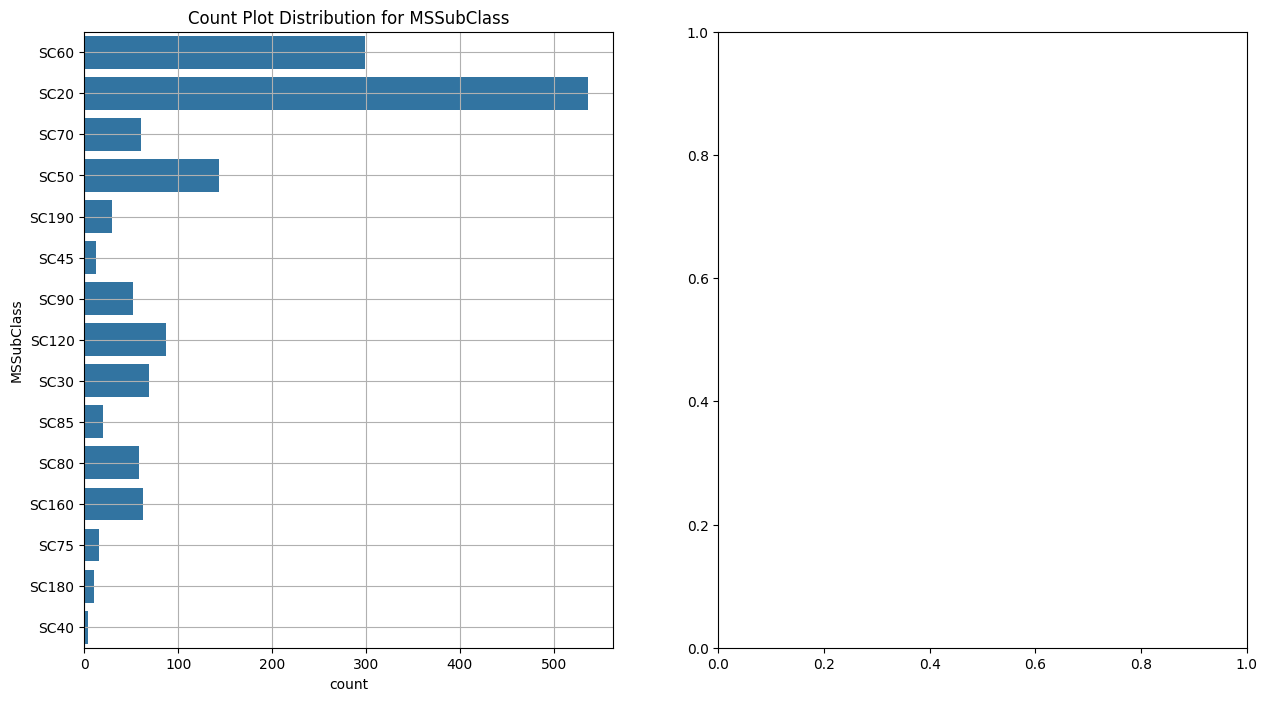

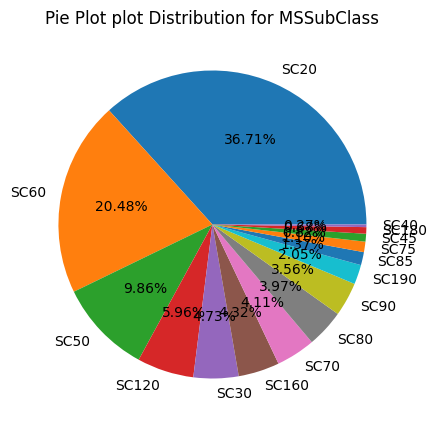

**************************************************
**************************************************
Logs for MSZoning


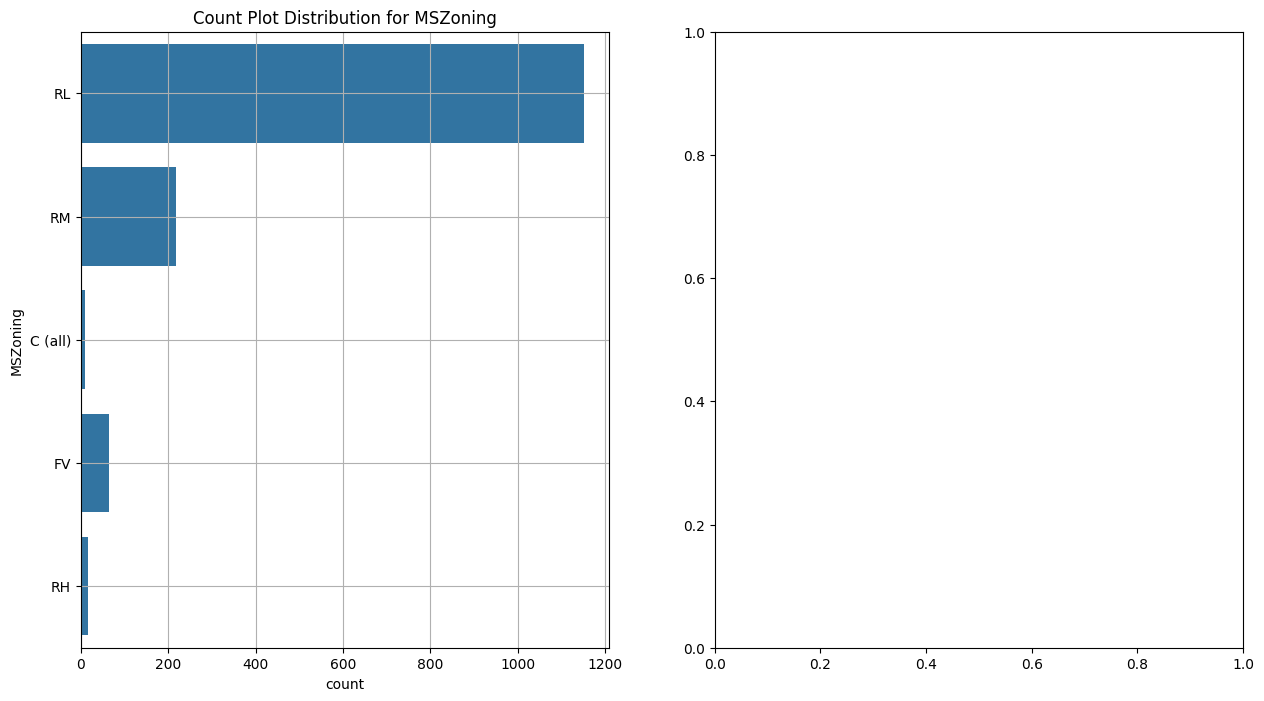

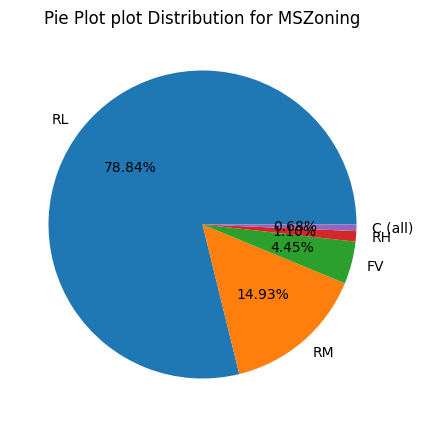

**************************************************
**************************************************
Logs for Street


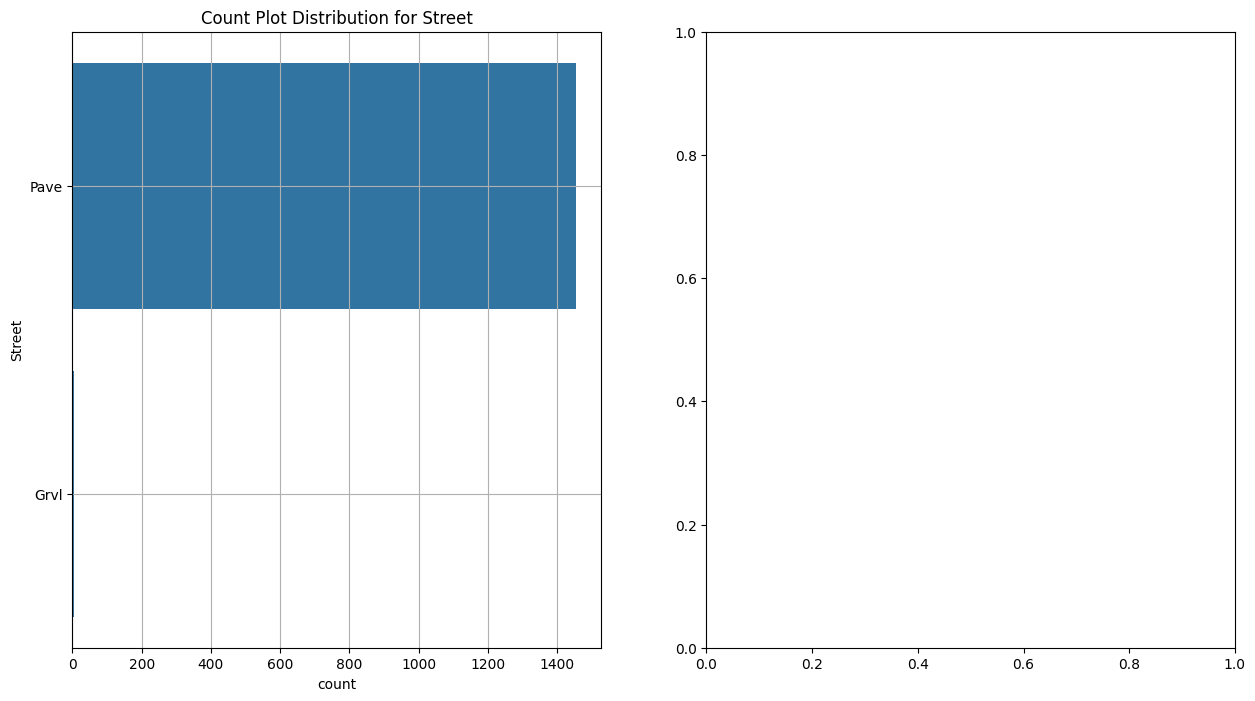

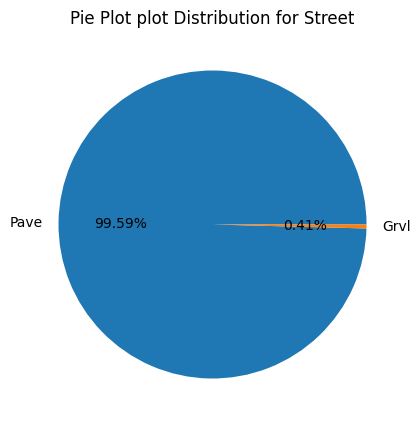

**************************************************
**************************************************
Logs for Alley


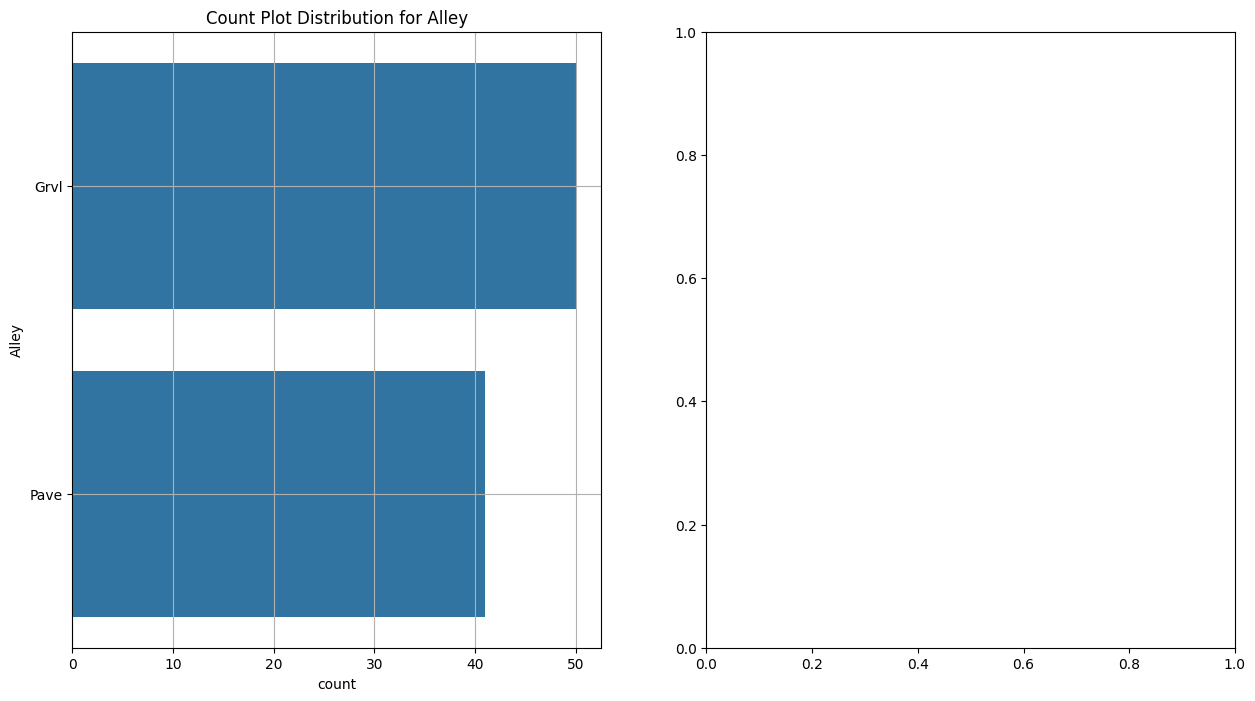

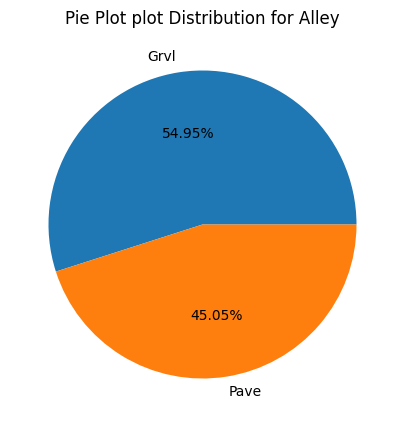

**************************************************
**************************************************
Logs for LotShape


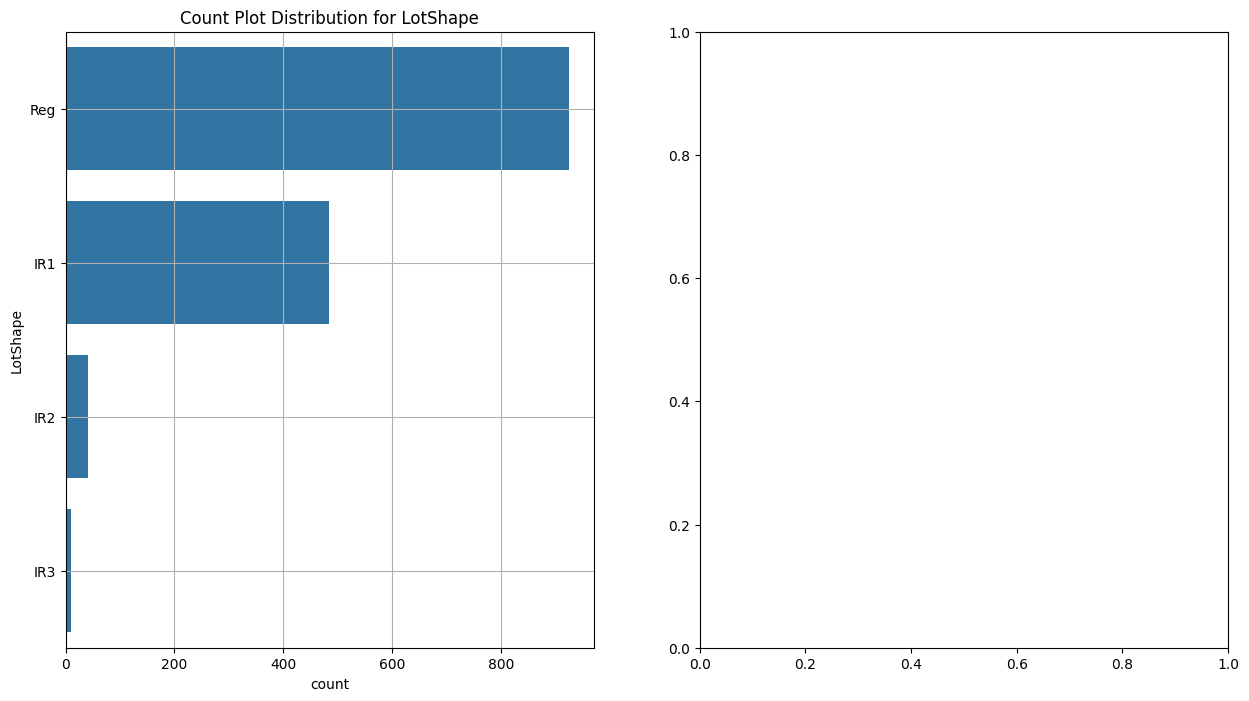

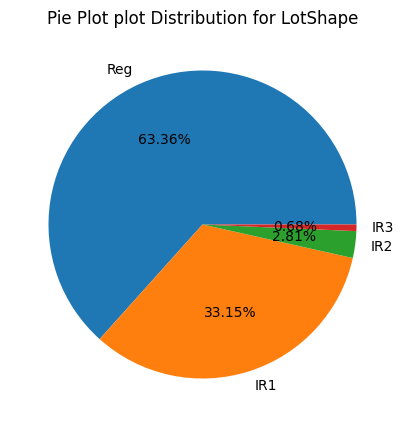

**************************************************
**************************************************
Logs for LandContour


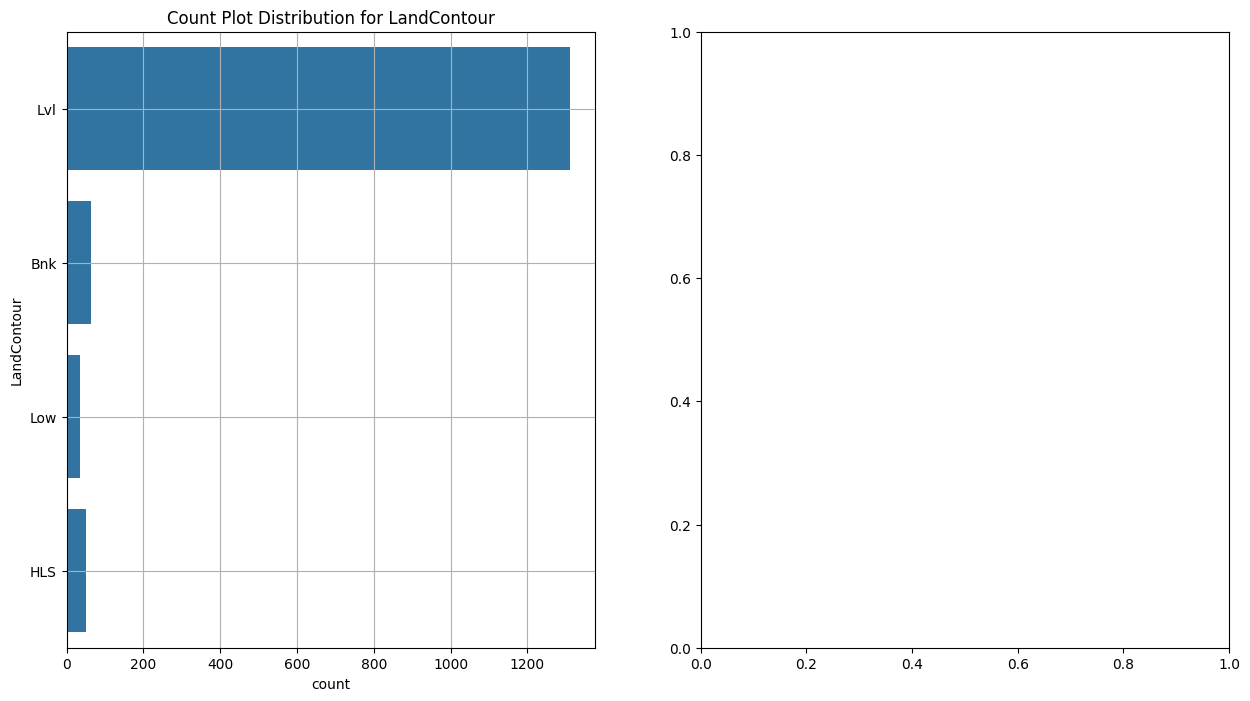

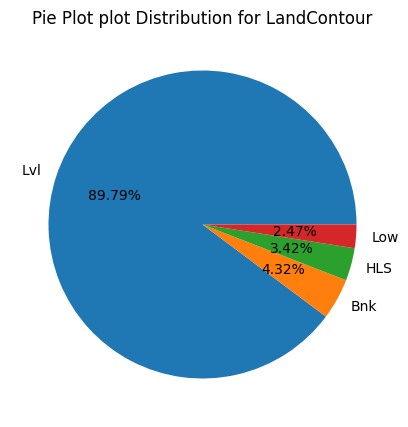

**************************************************
**************************************************
Logs for Utilities


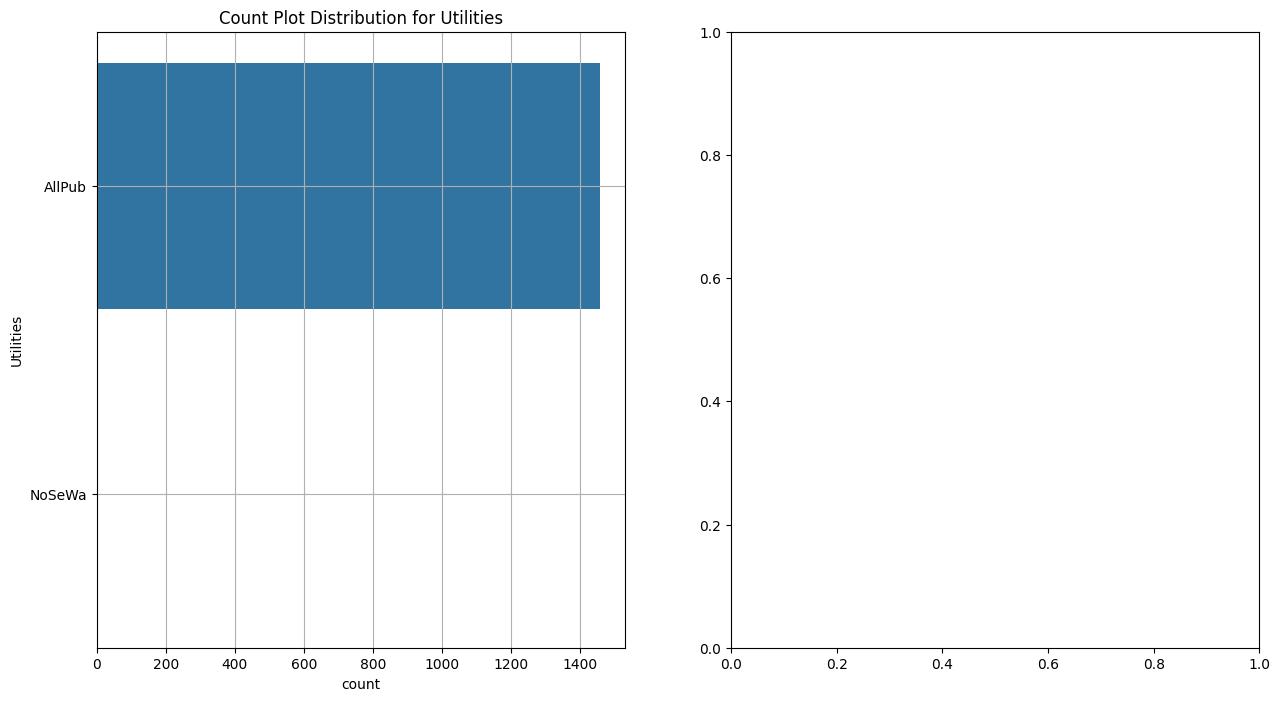

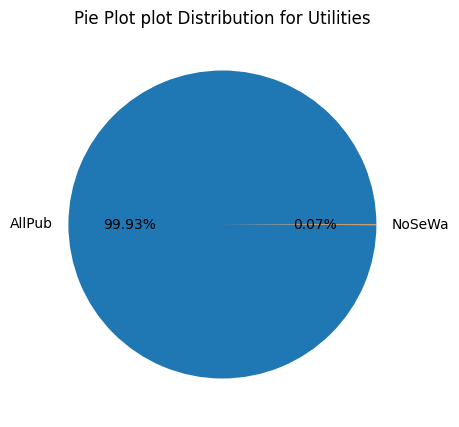

**************************************************
**************************************************
Logs for LotConfig


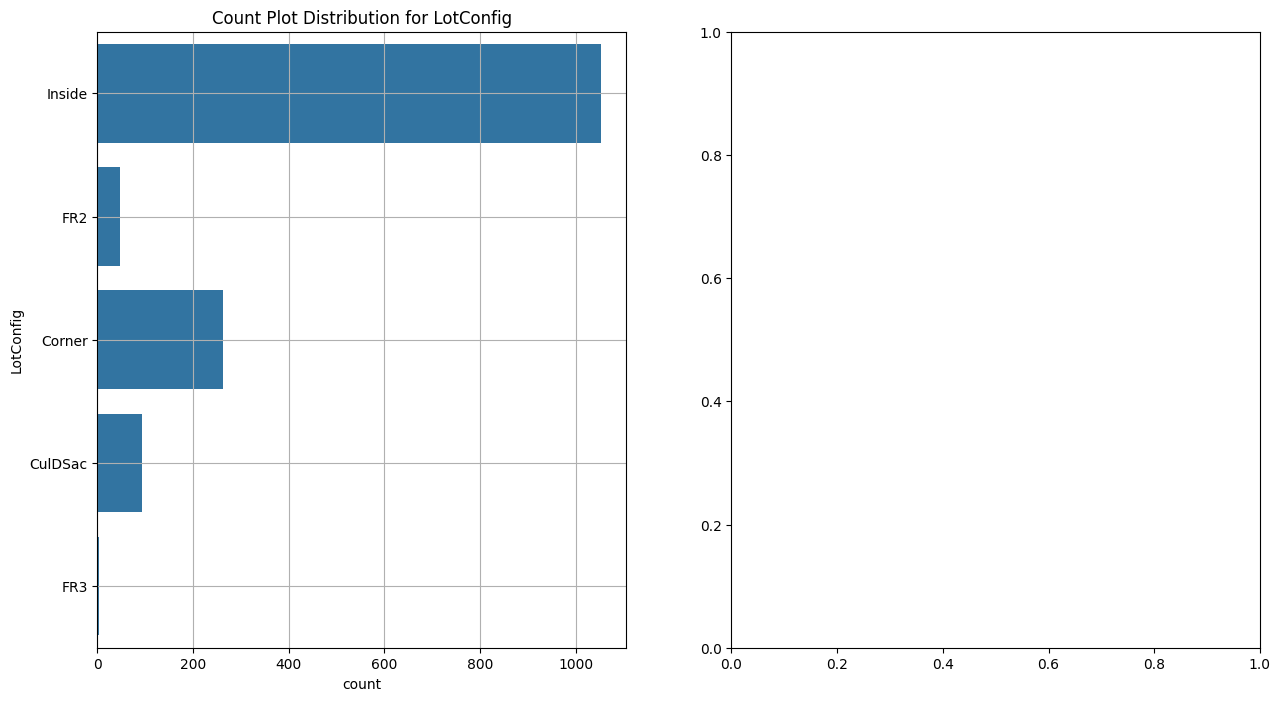

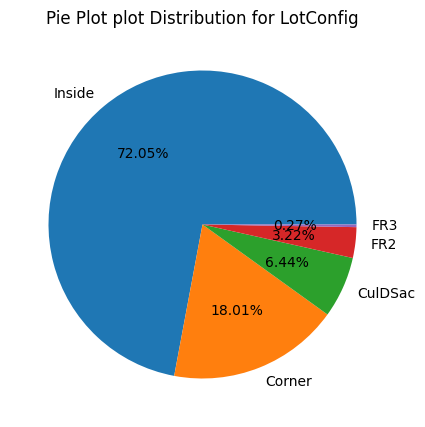

**************************************************
**************************************************
Logs for LandSlope


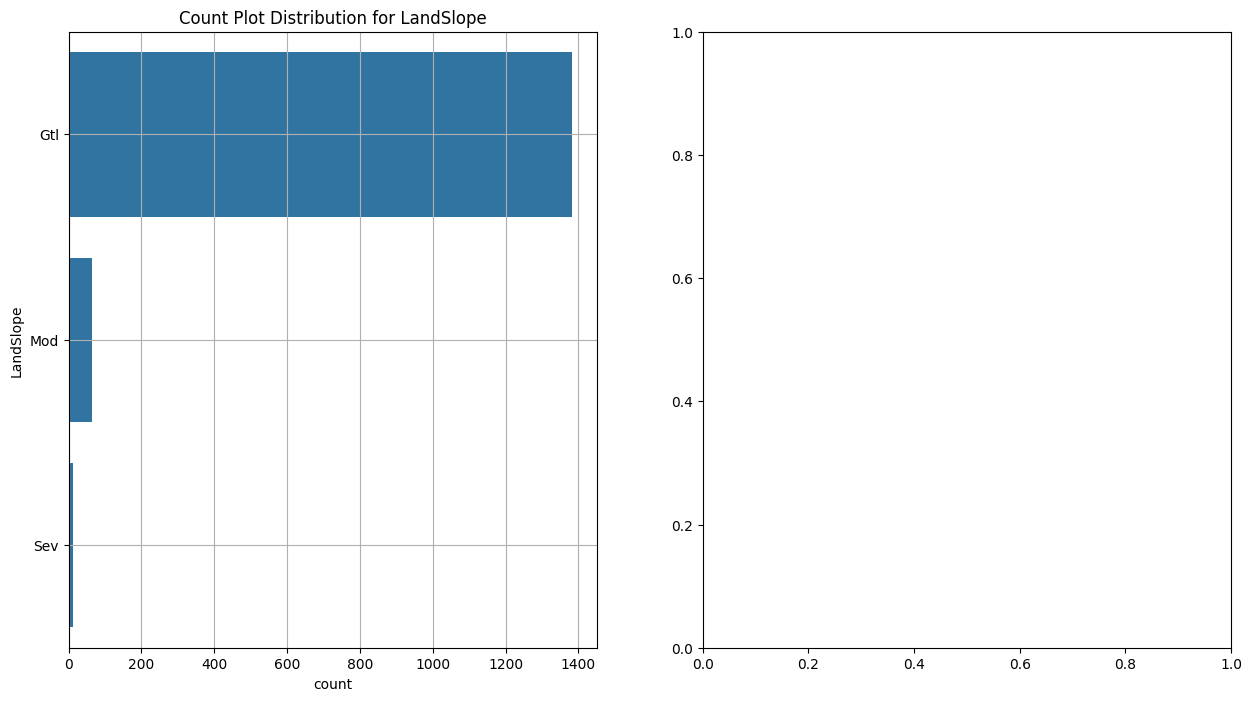

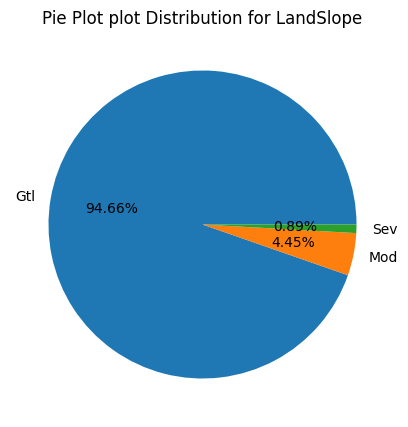

**************************************************
**************************************************
Logs for Neighborhood


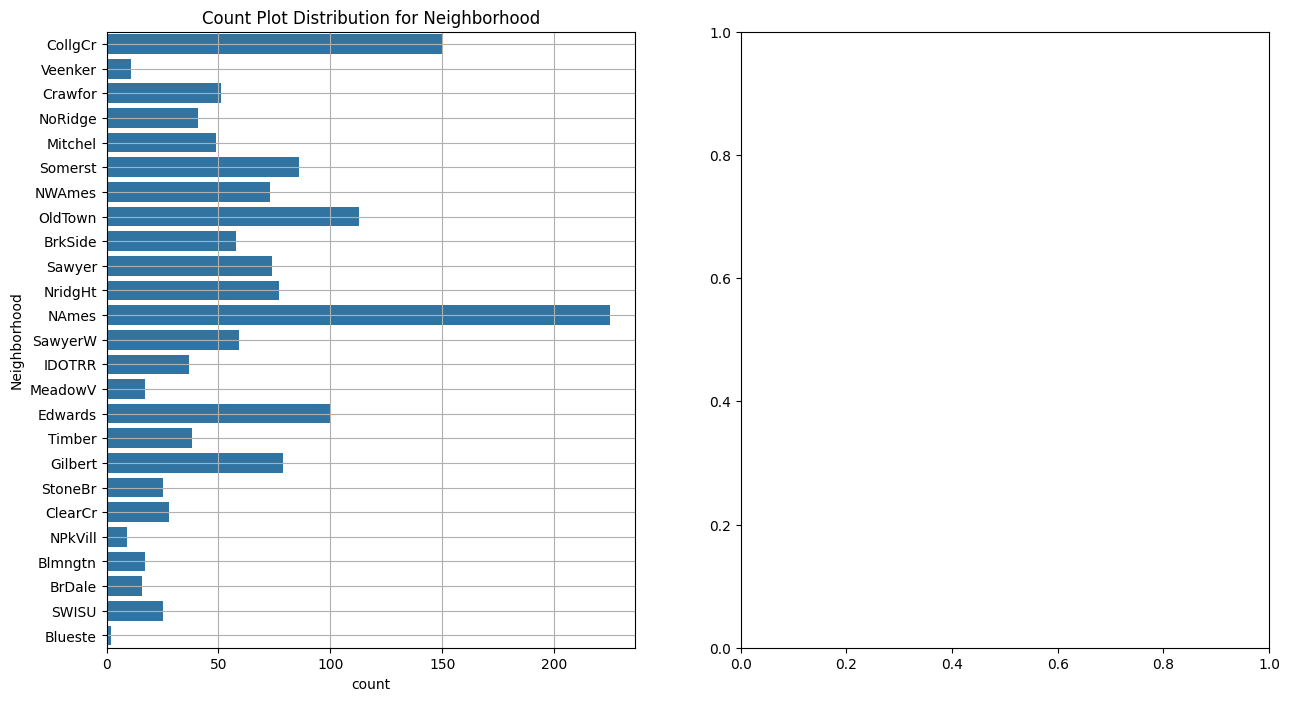

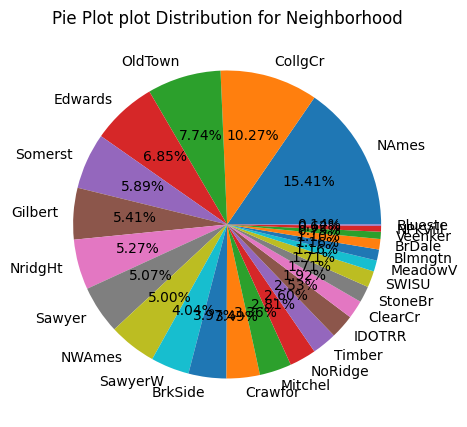

**************************************************
**************************************************
Logs for Condition1


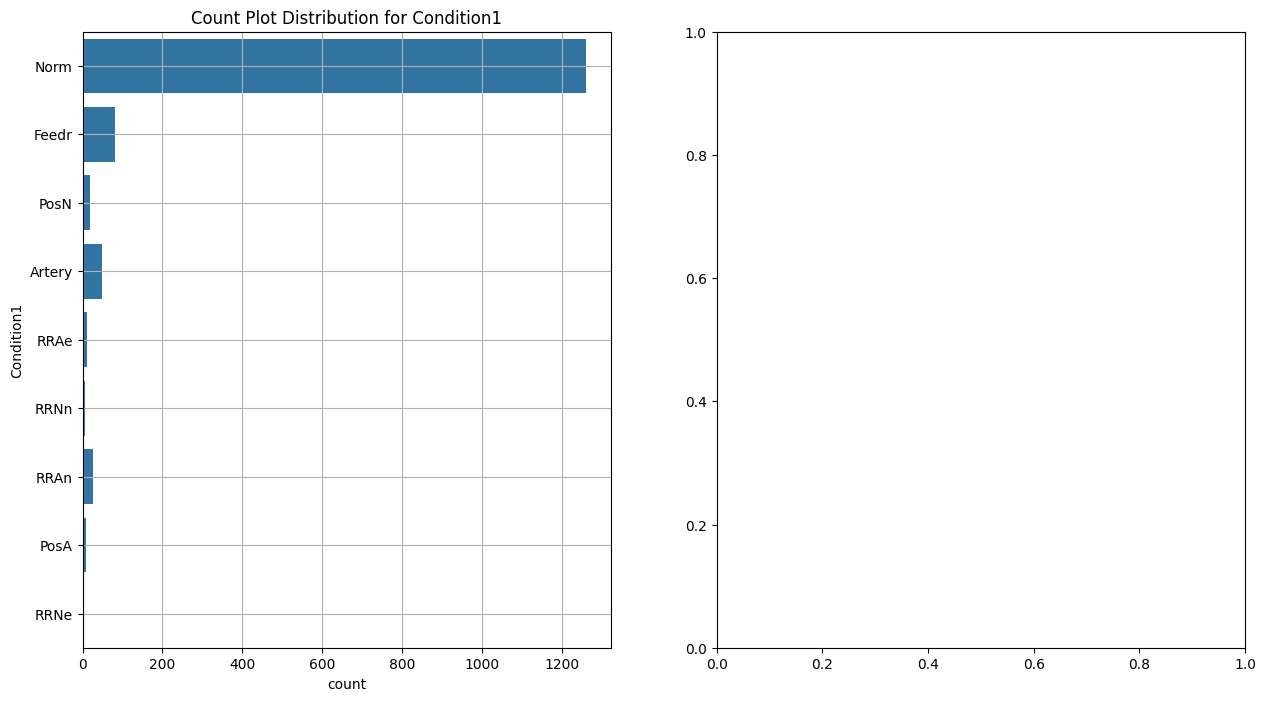

**************************************************
**************************************************
Logs for Condition2


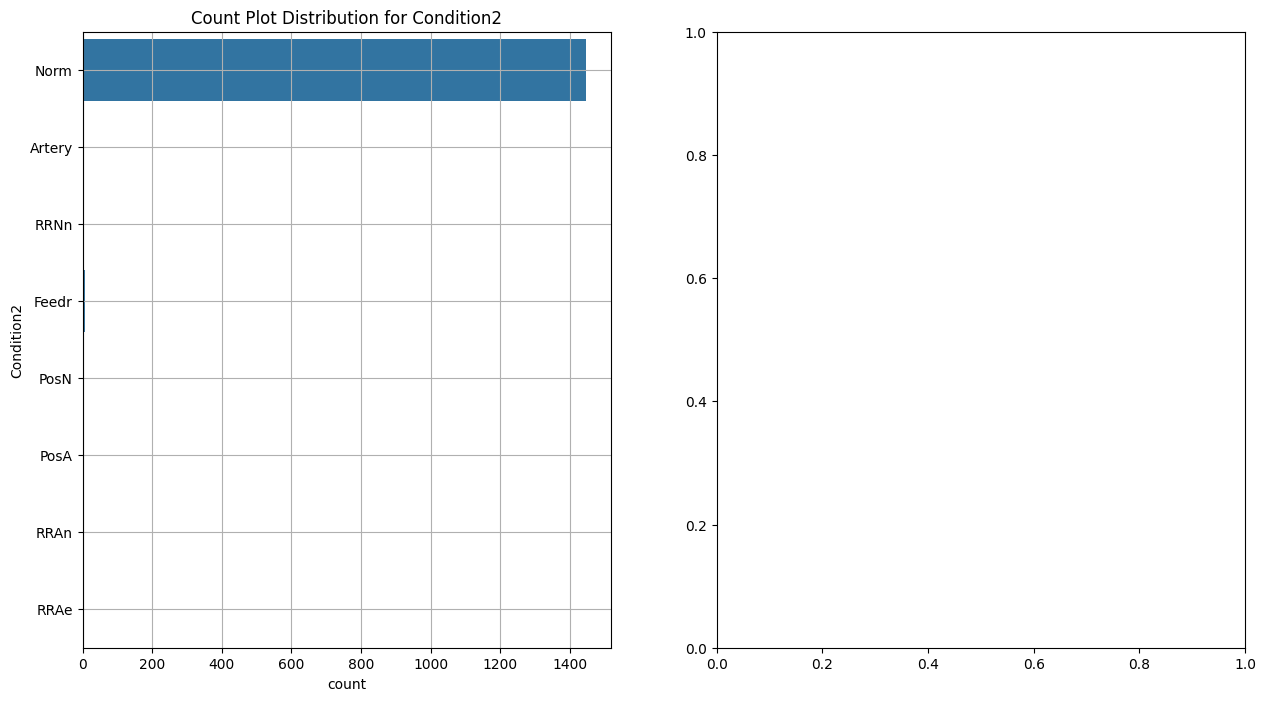

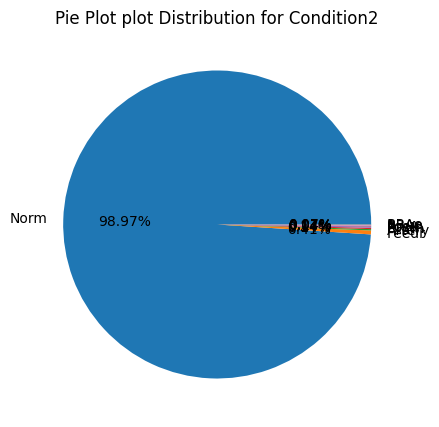

**************************************************
**************************************************
Logs for BldgType


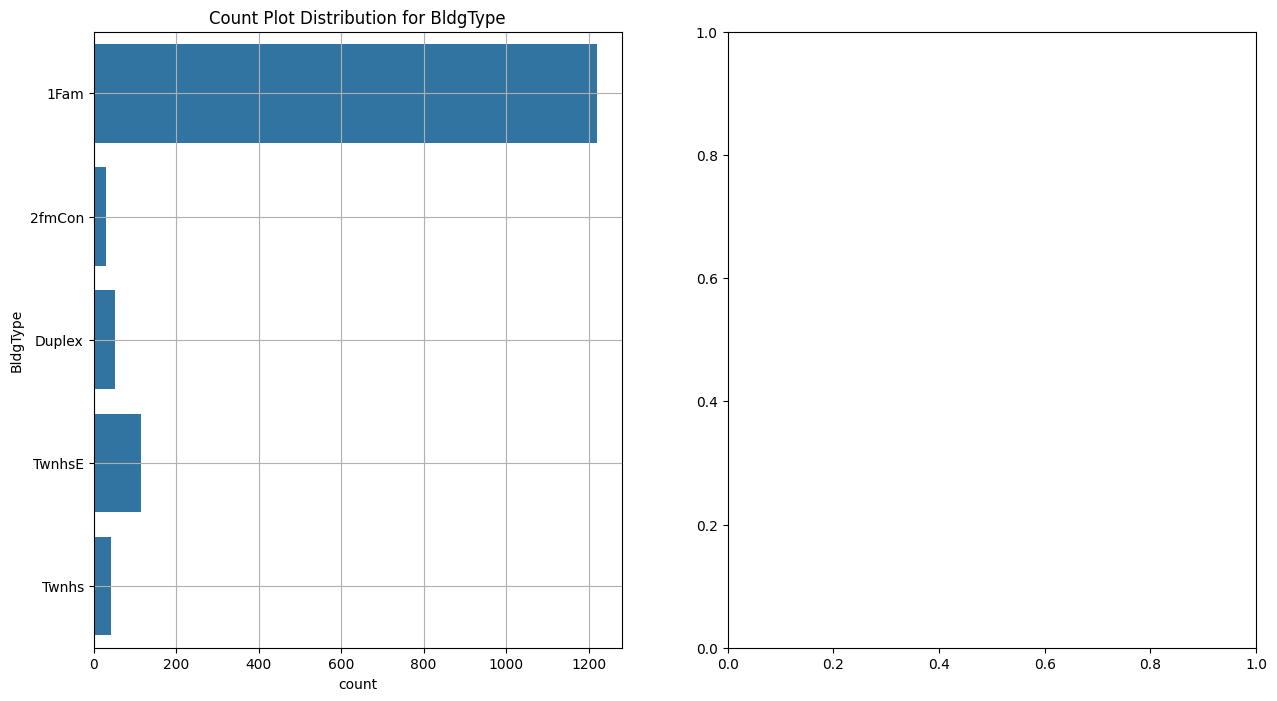

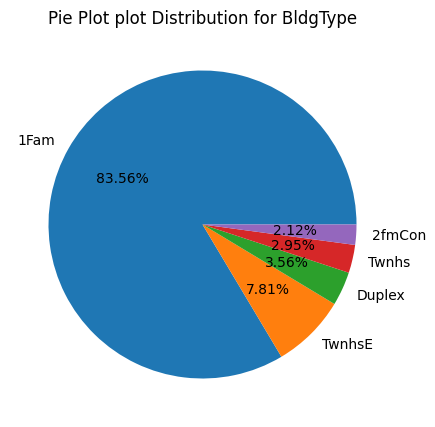

**************************************************
**************************************************
Logs for HouseStyle


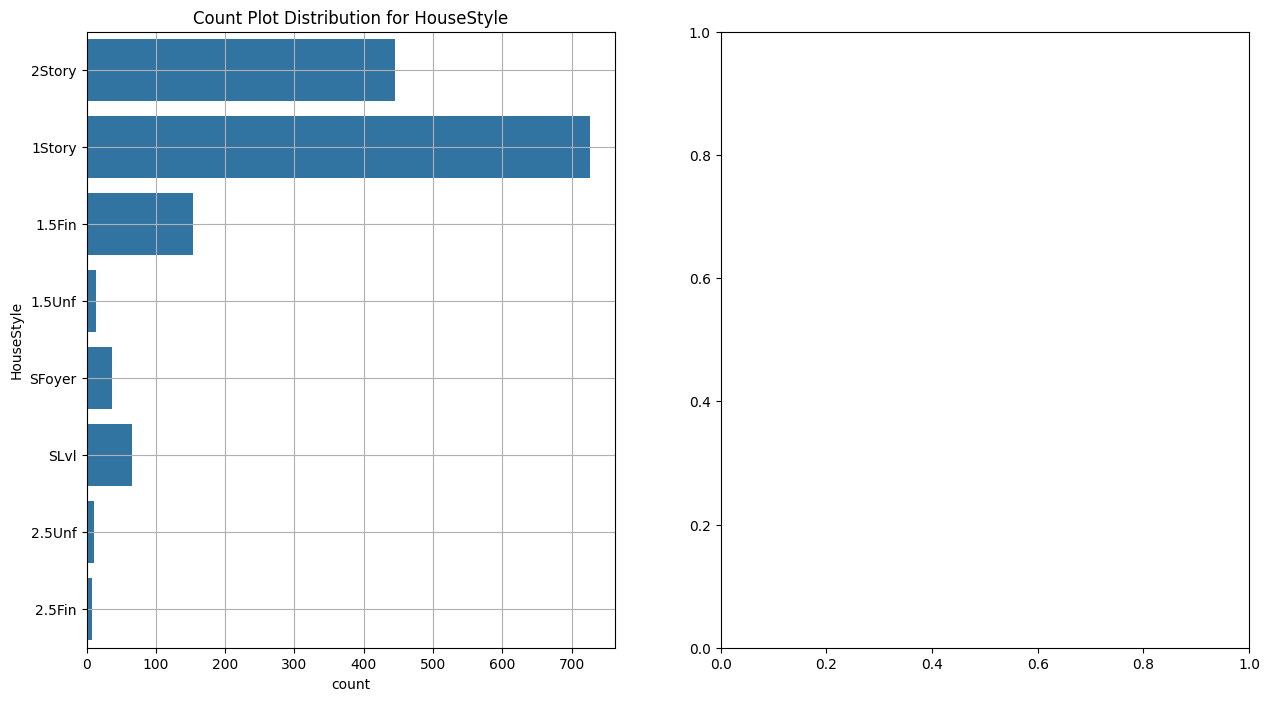

**************************************************
**************************************************
Logs for RoofStyle


**************************************************
**************************************************
Logs for RoofMatl


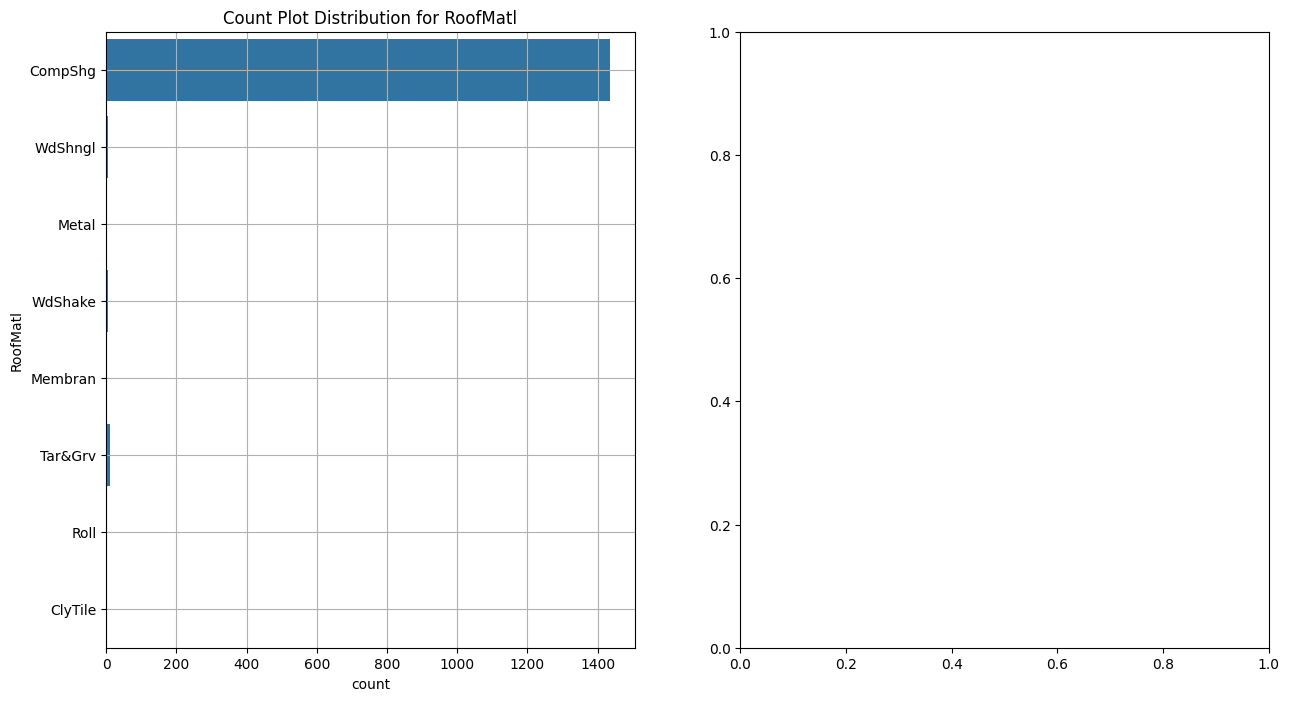

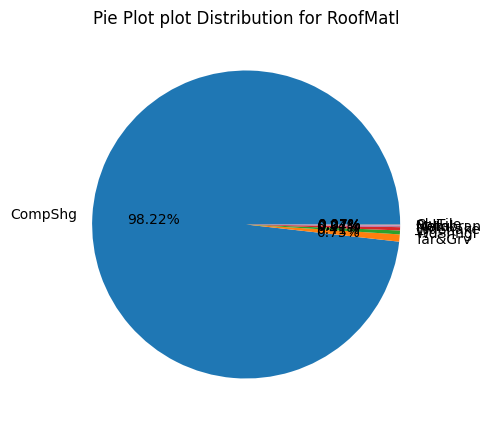

**************************************************
**************************************************
Logs for Exterior1st


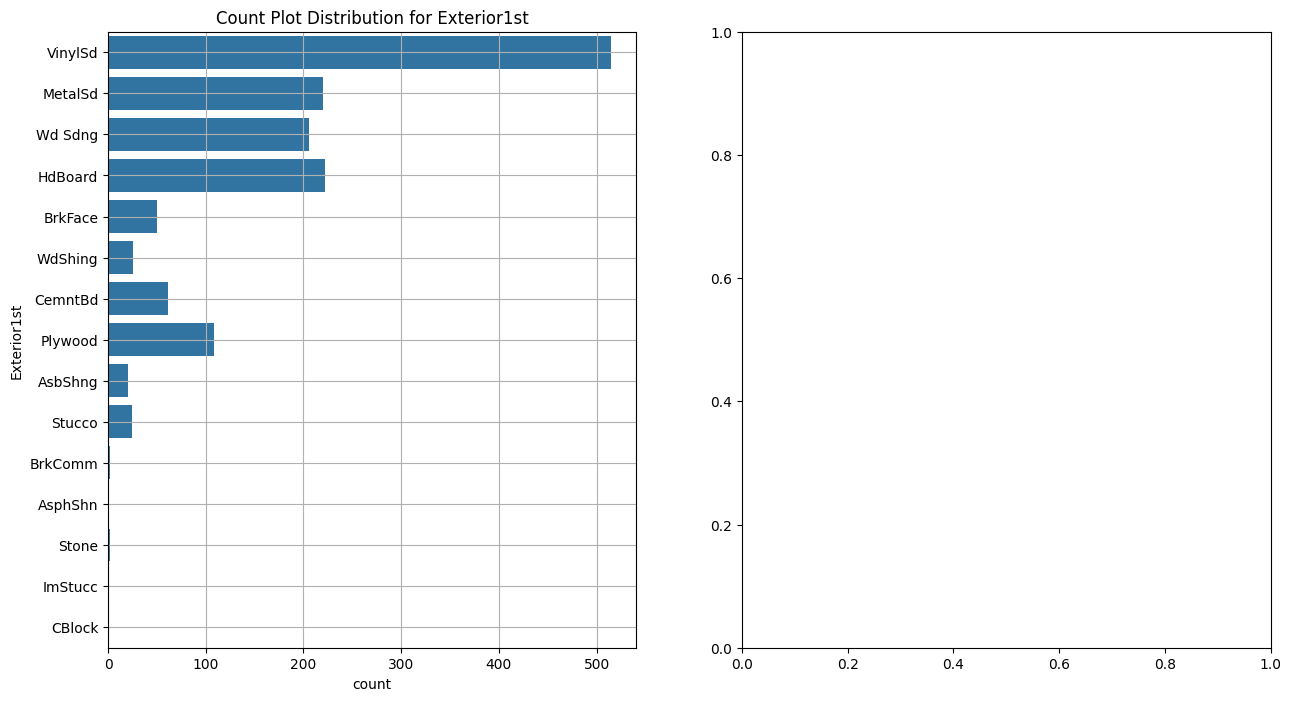

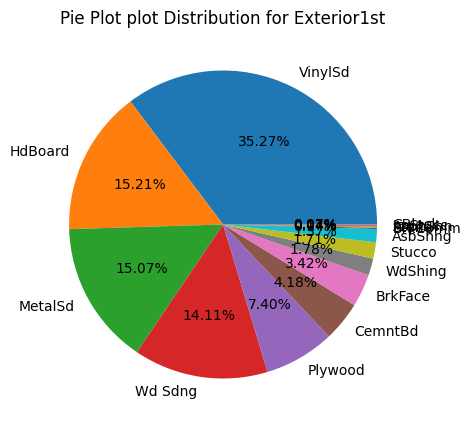

**************************************************
**************************************************
Logs for Exterior2nd


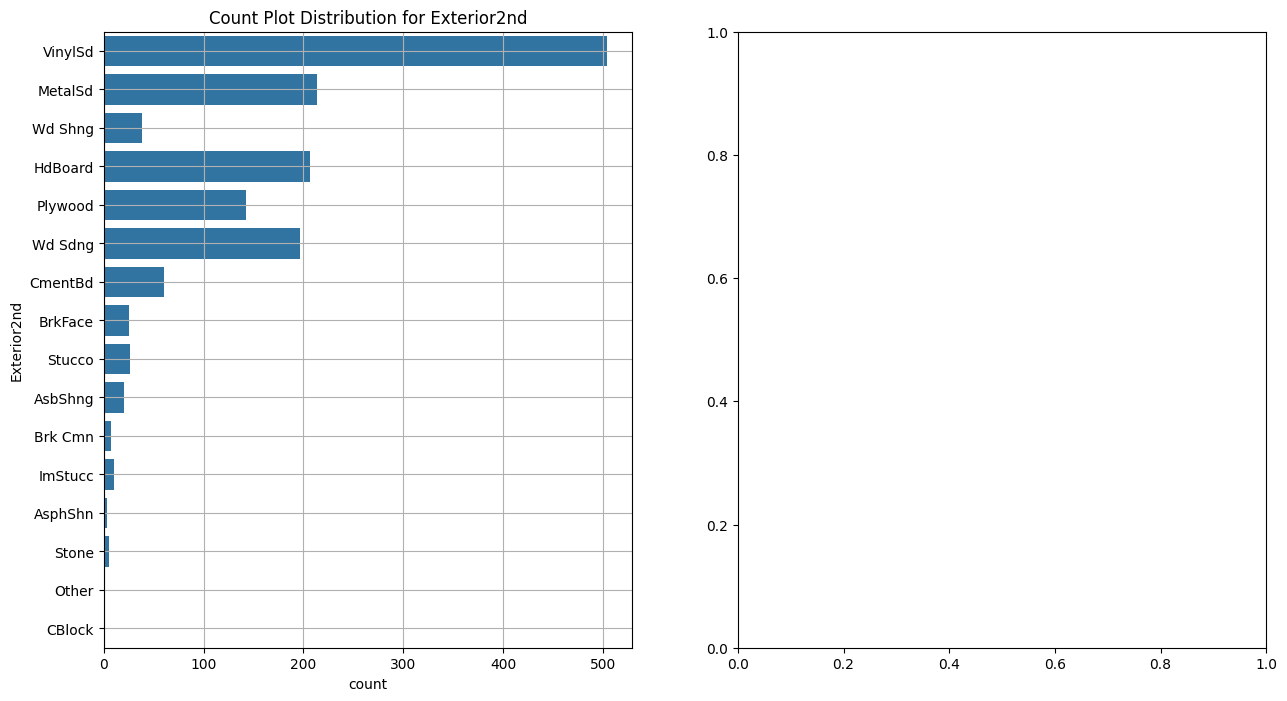

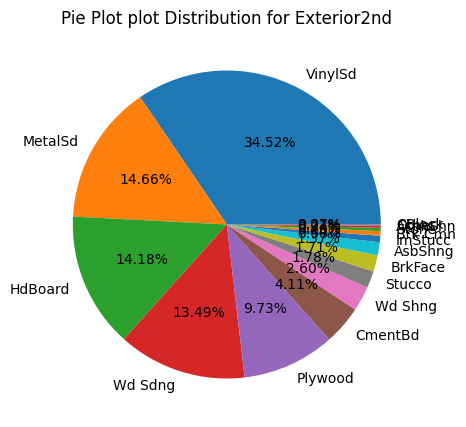

**************************************************
**************************************************
Logs for MasVnrType


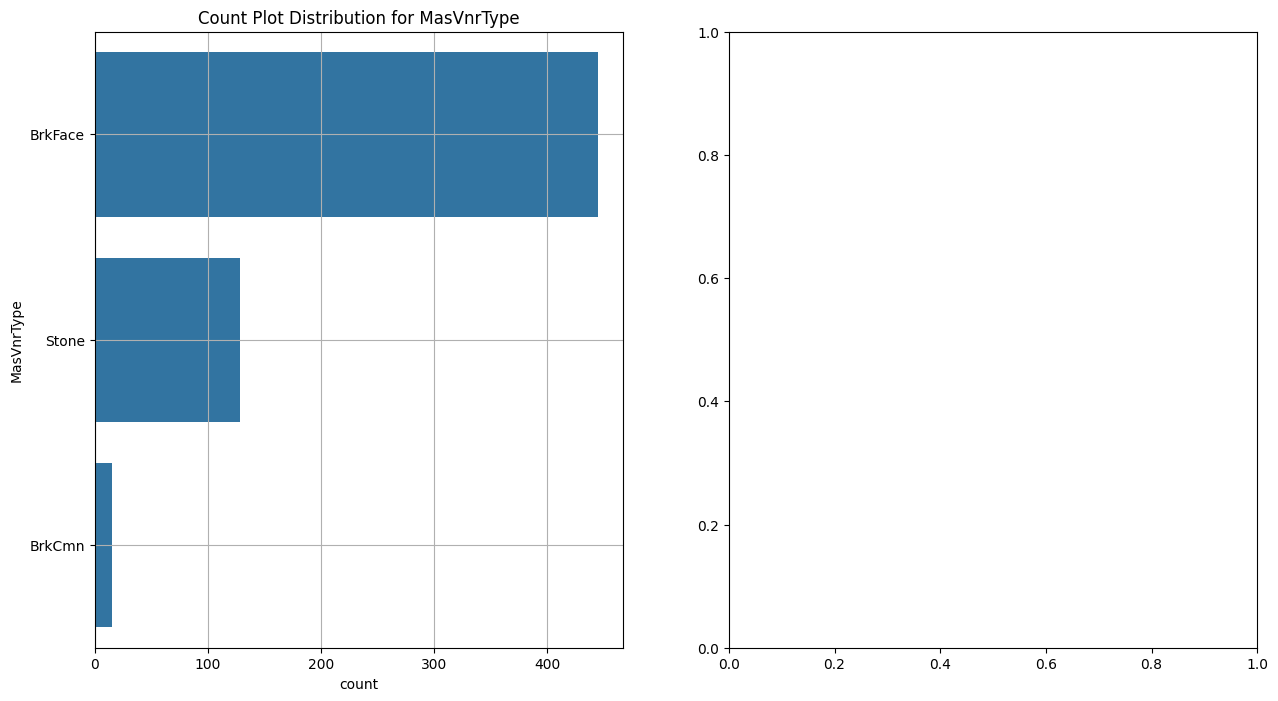

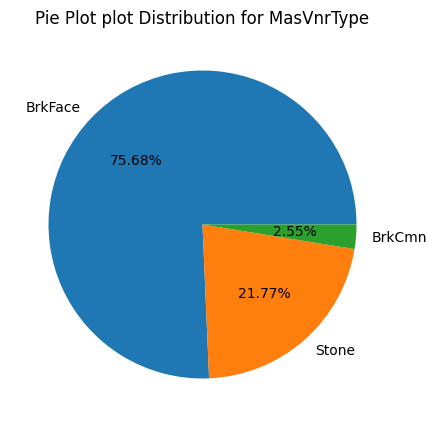

**************************************************
**************************************************
Logs for ExterQual


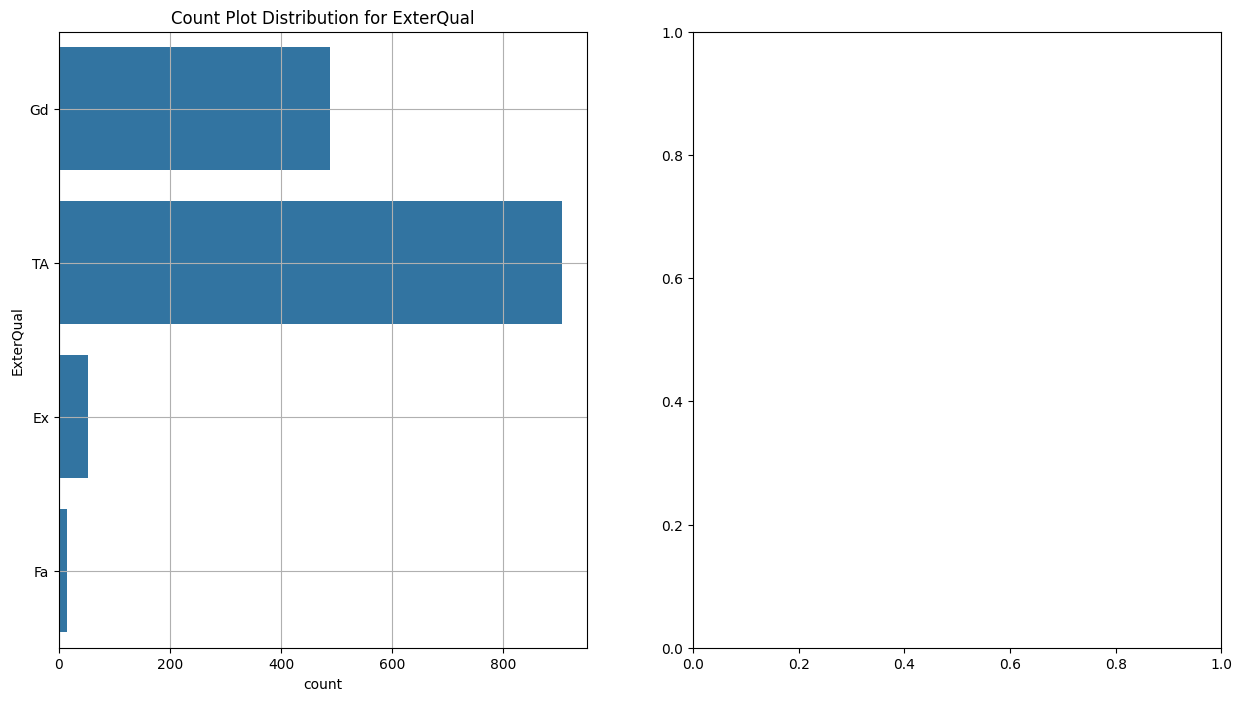

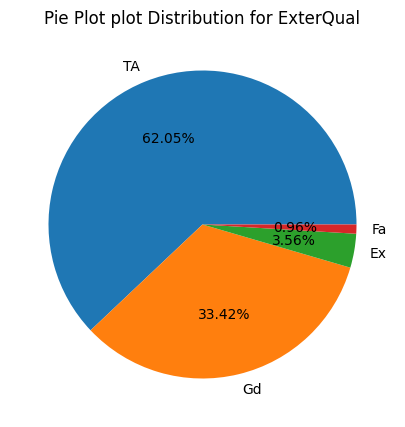

**************************************************
**************************************************
Logs for ExterCond


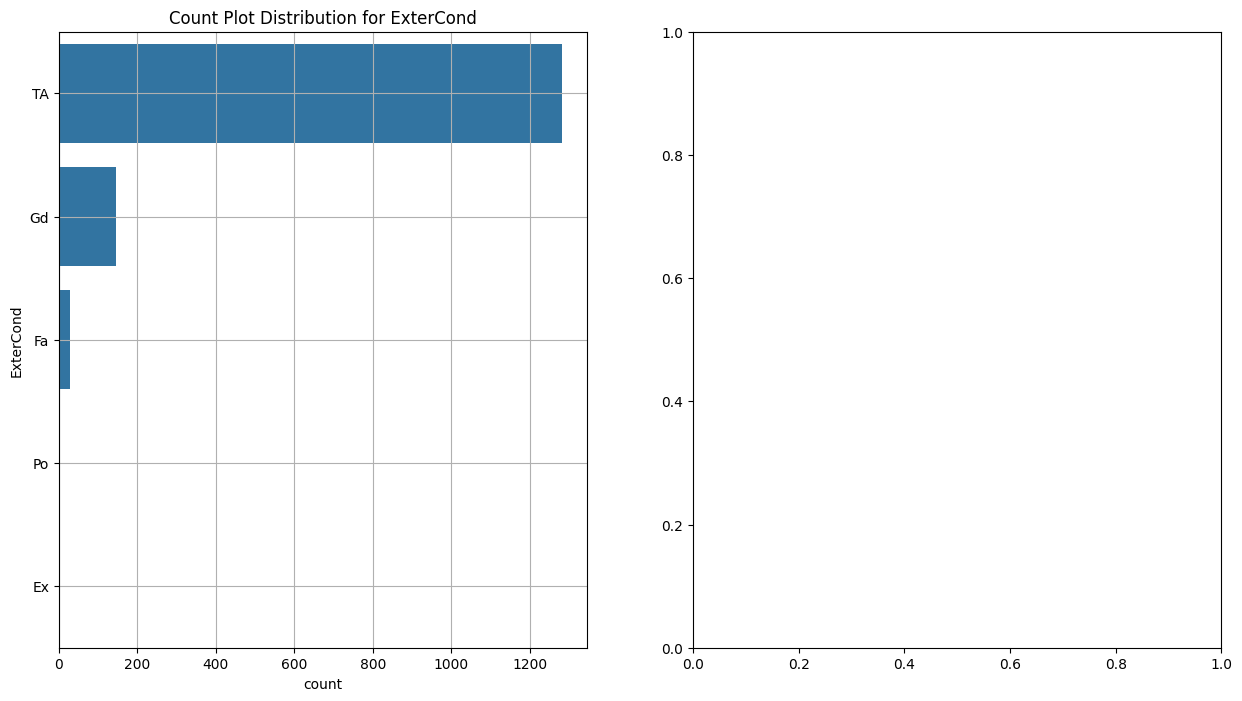

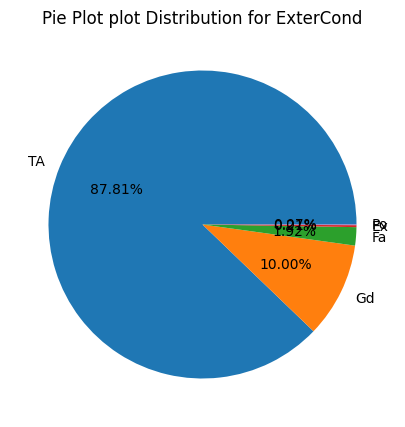

**************************************************
**************************************************
Logs for Foundation


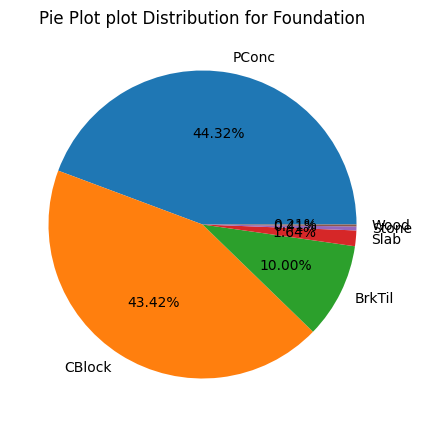

**************************************************
**************************************************
Logs for BsmtQual


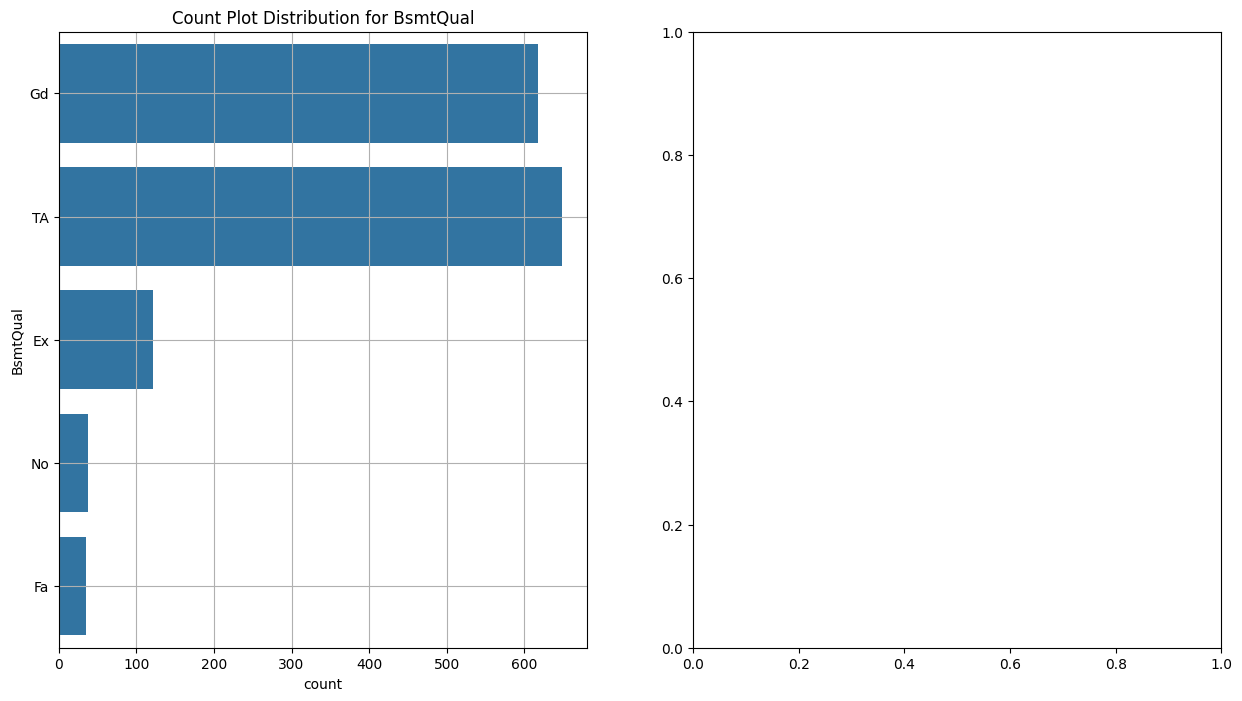

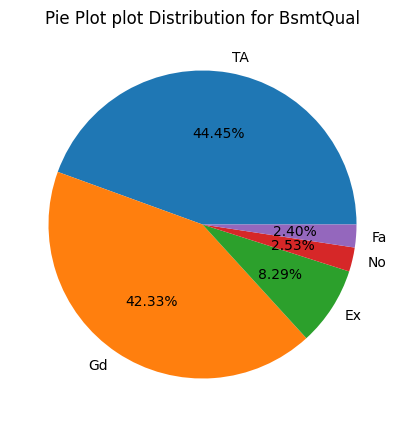

**************************************************
**************************************************
Logs for BsmtCond


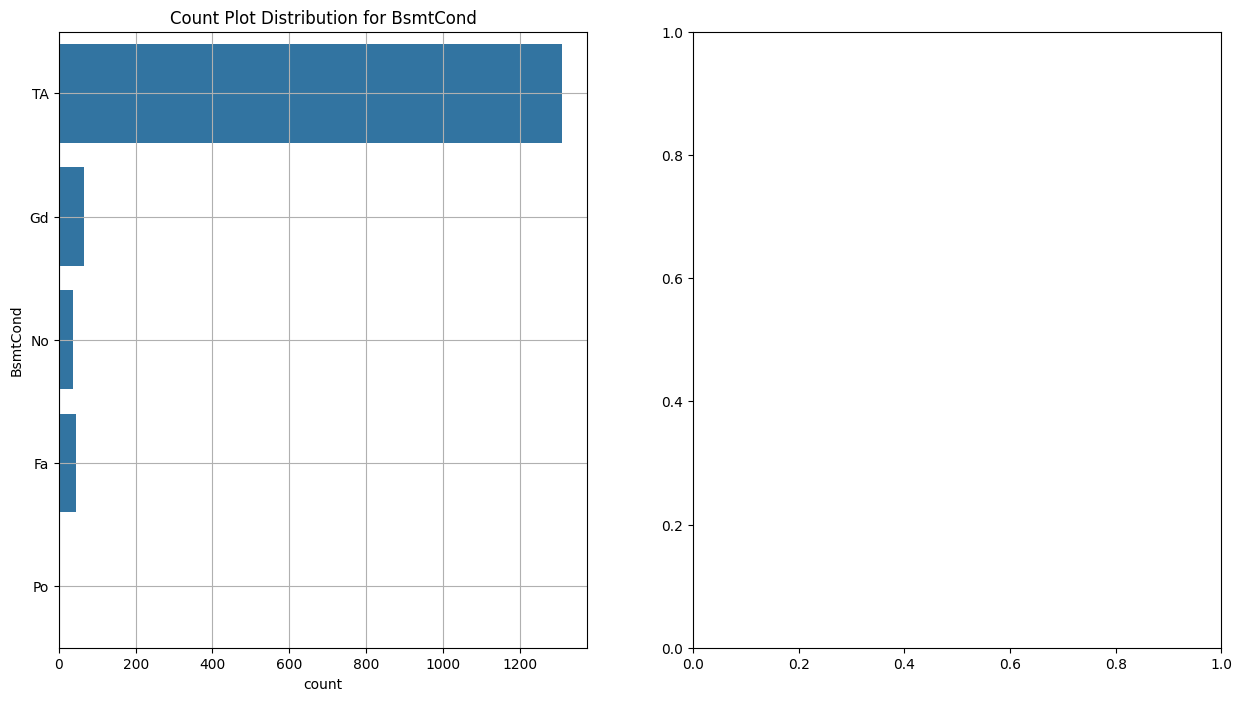

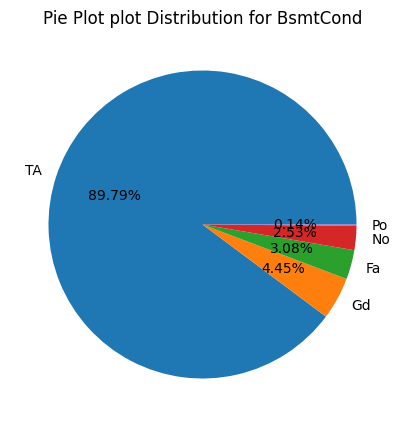

**************************************************
**************************************************
Logs for BsmtExposure


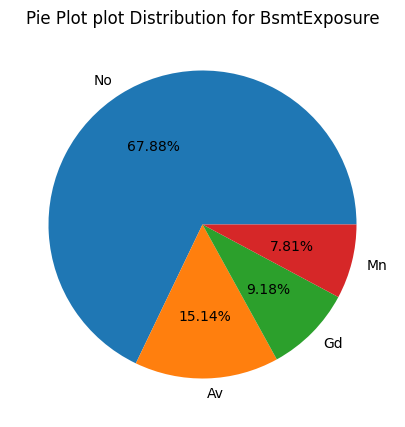

**************************************************
**************************************************
Logs for BsmtFinType1


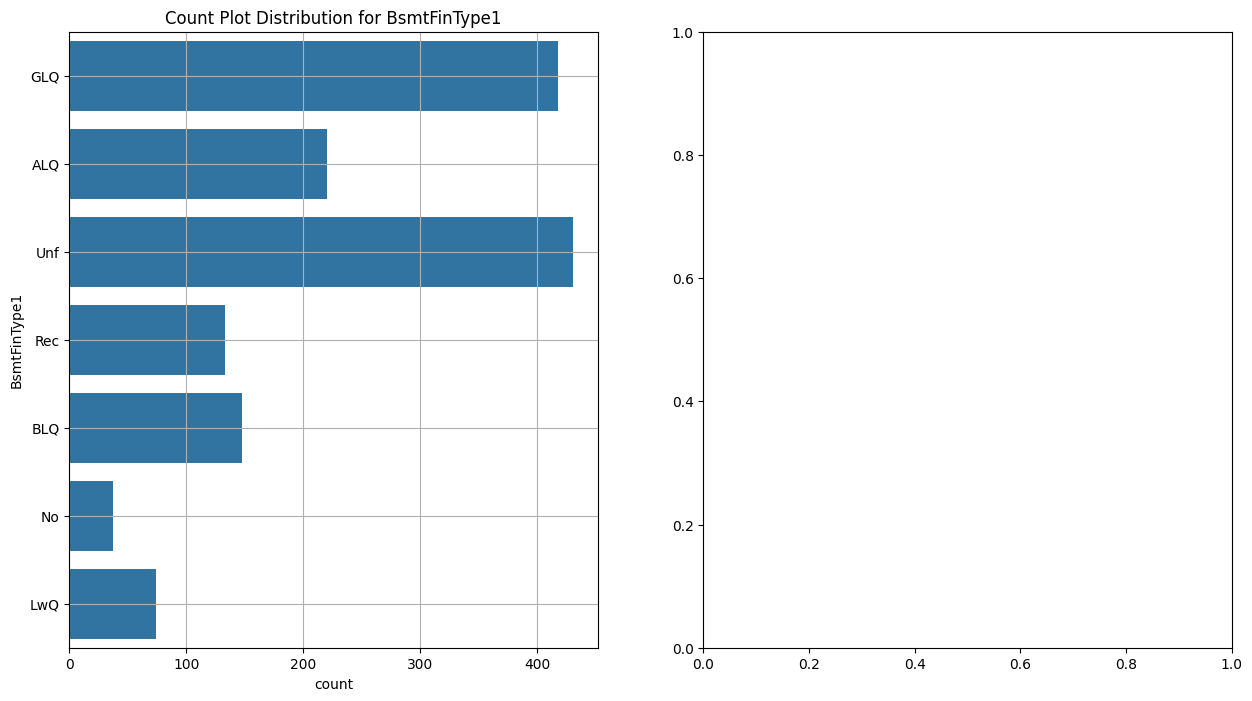

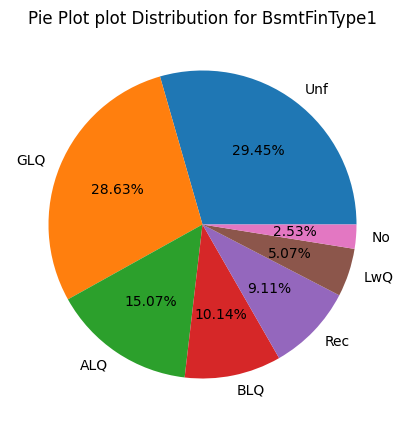

**************************************************
**************************************************
Logs for BsmtFinType2


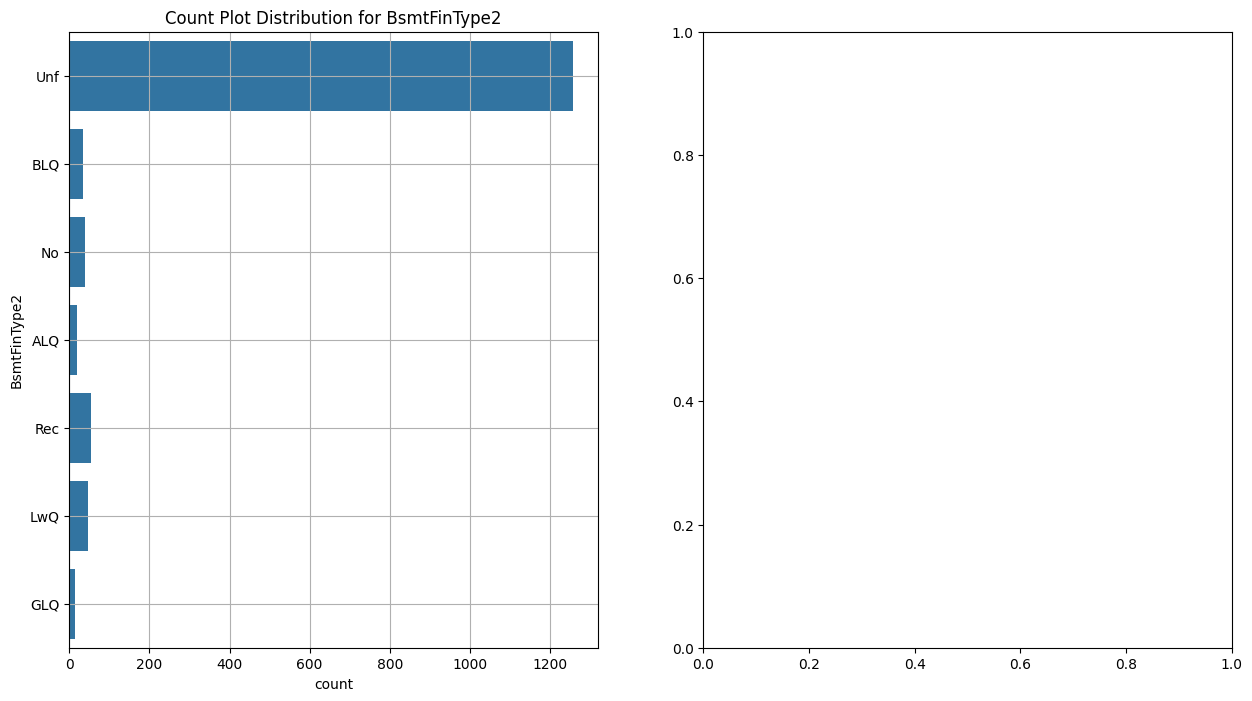

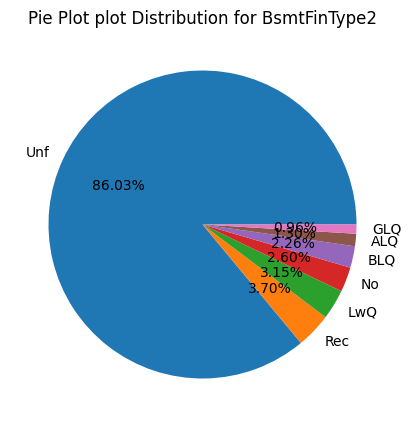

**************************************************
**************************************************
Logs for Heating


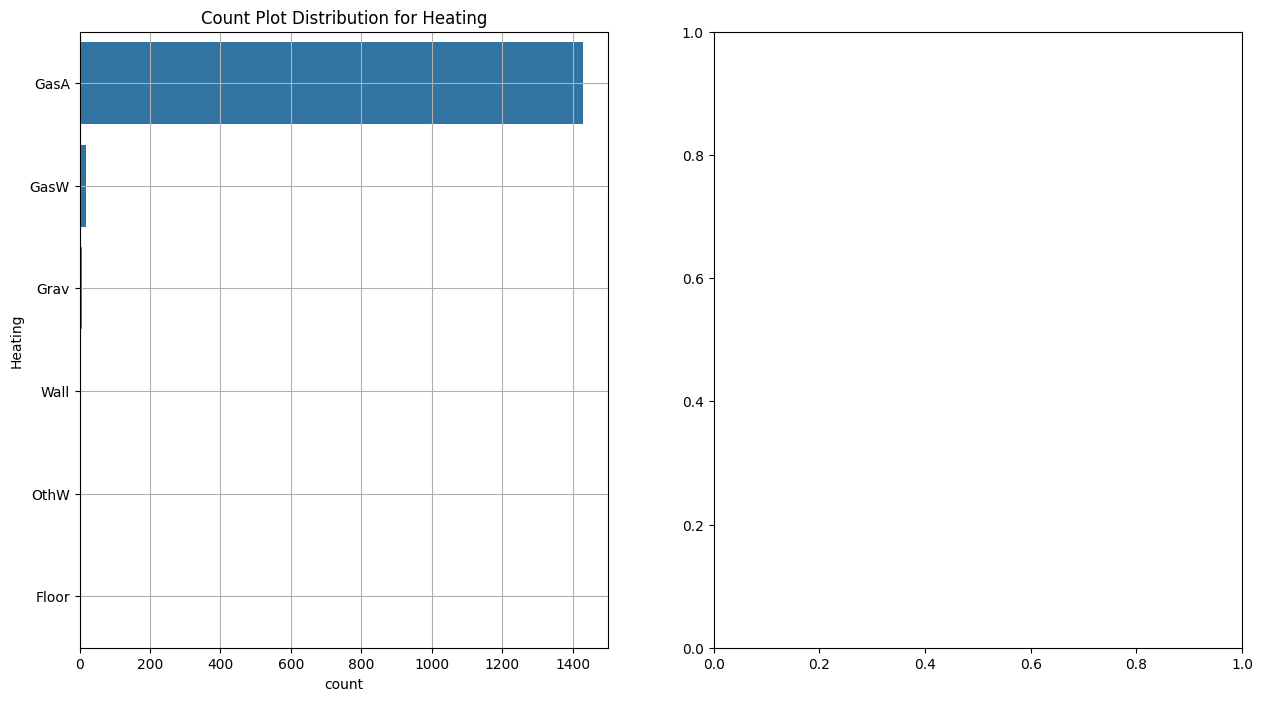

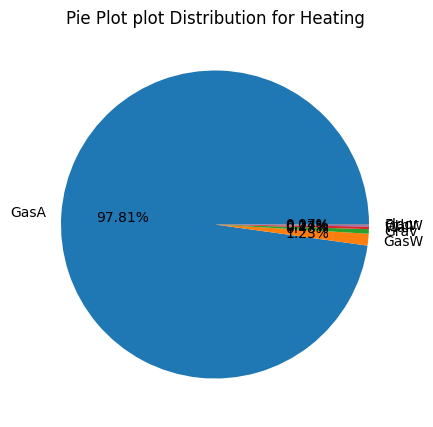

**************************************************
**************************************************
Logs for HeatingQC


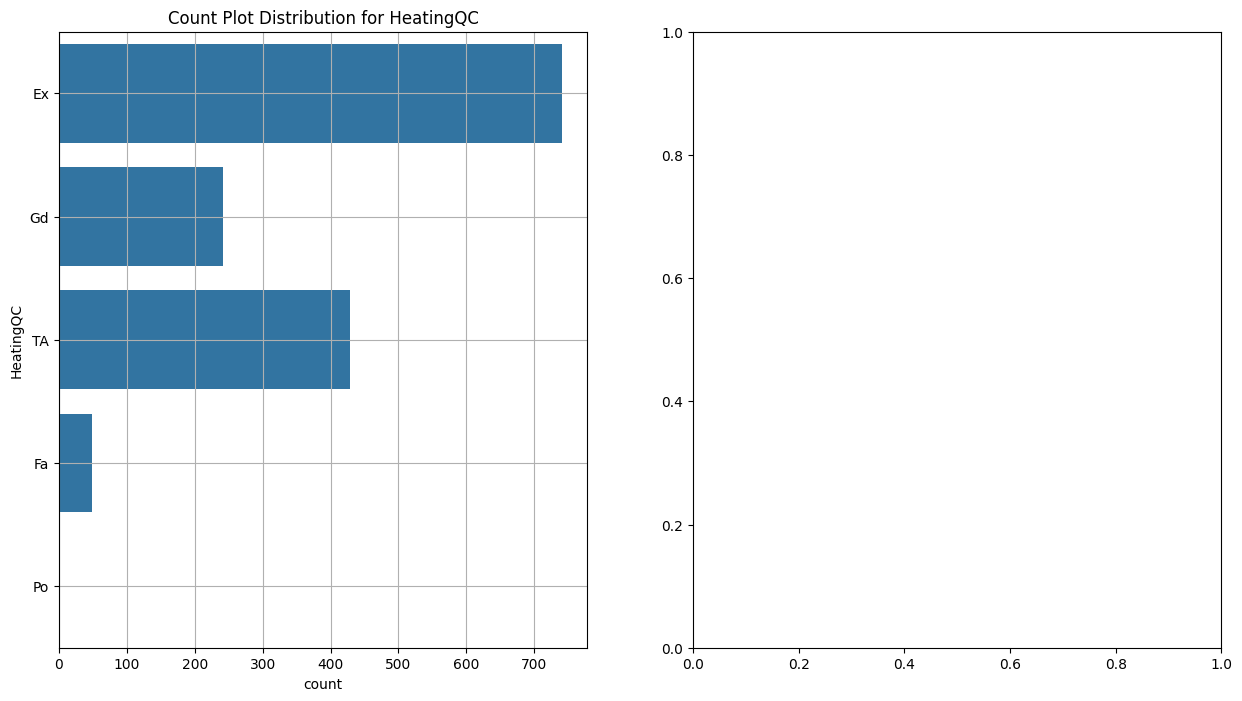

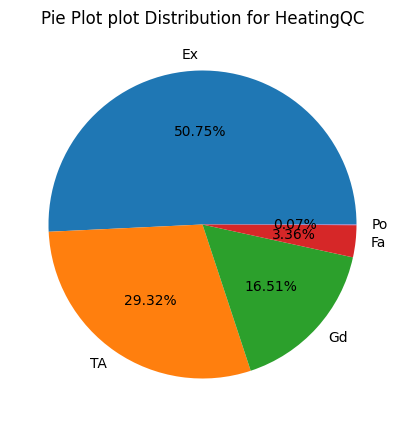

**************************************************
**************************************************
Logs for CentralAir


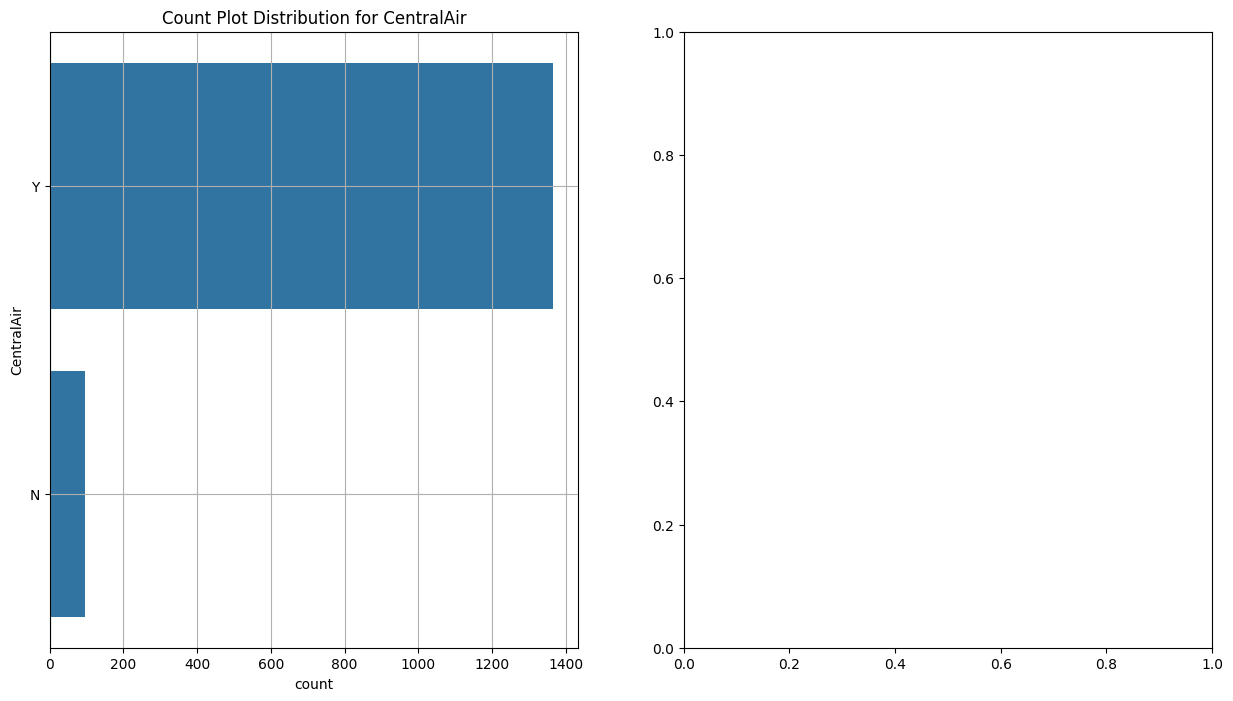

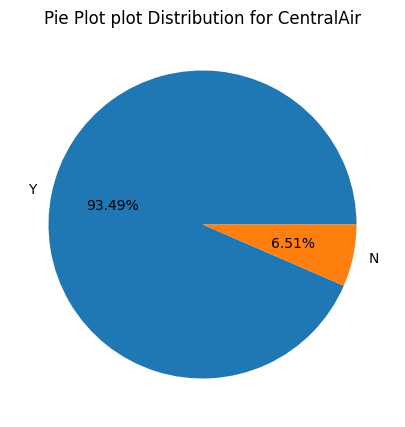

**************************************************
**************************************************
Logs for Electrical


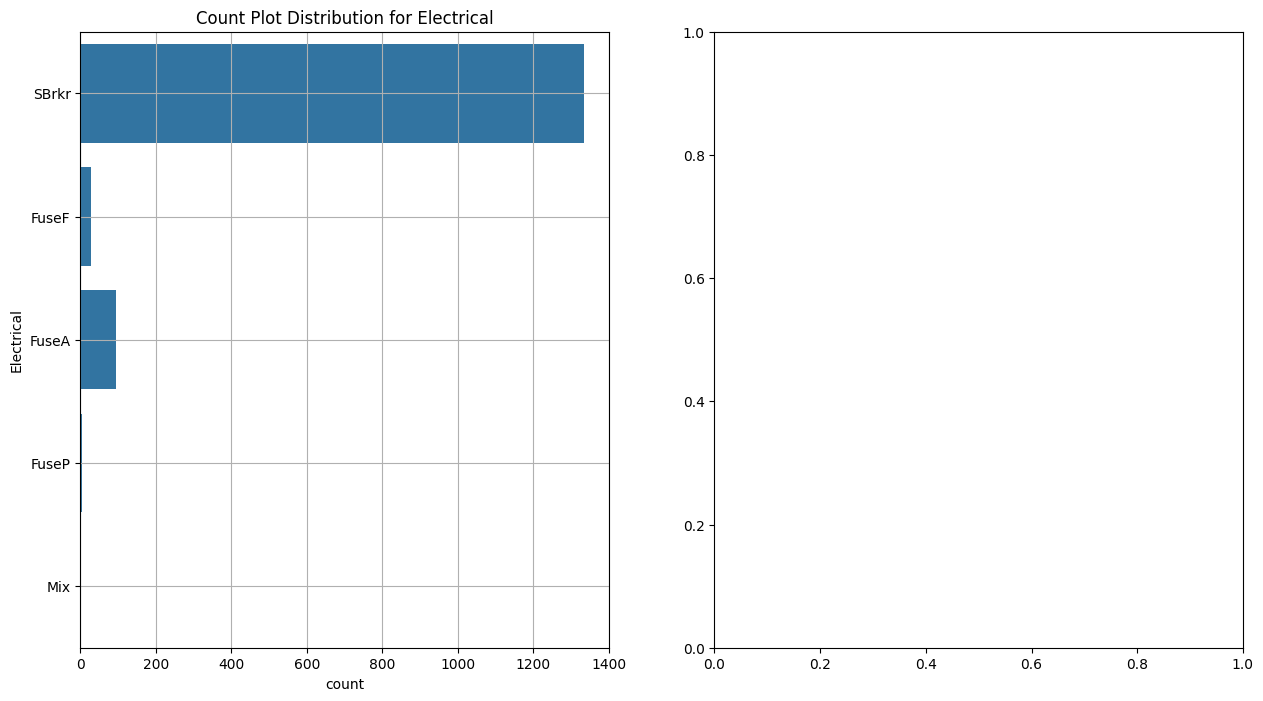

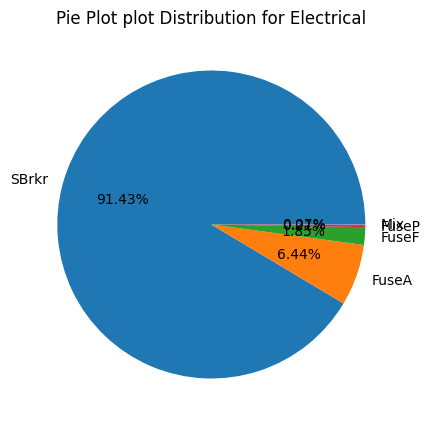

**************************************************
**************************************************
Logs for KitchenQual


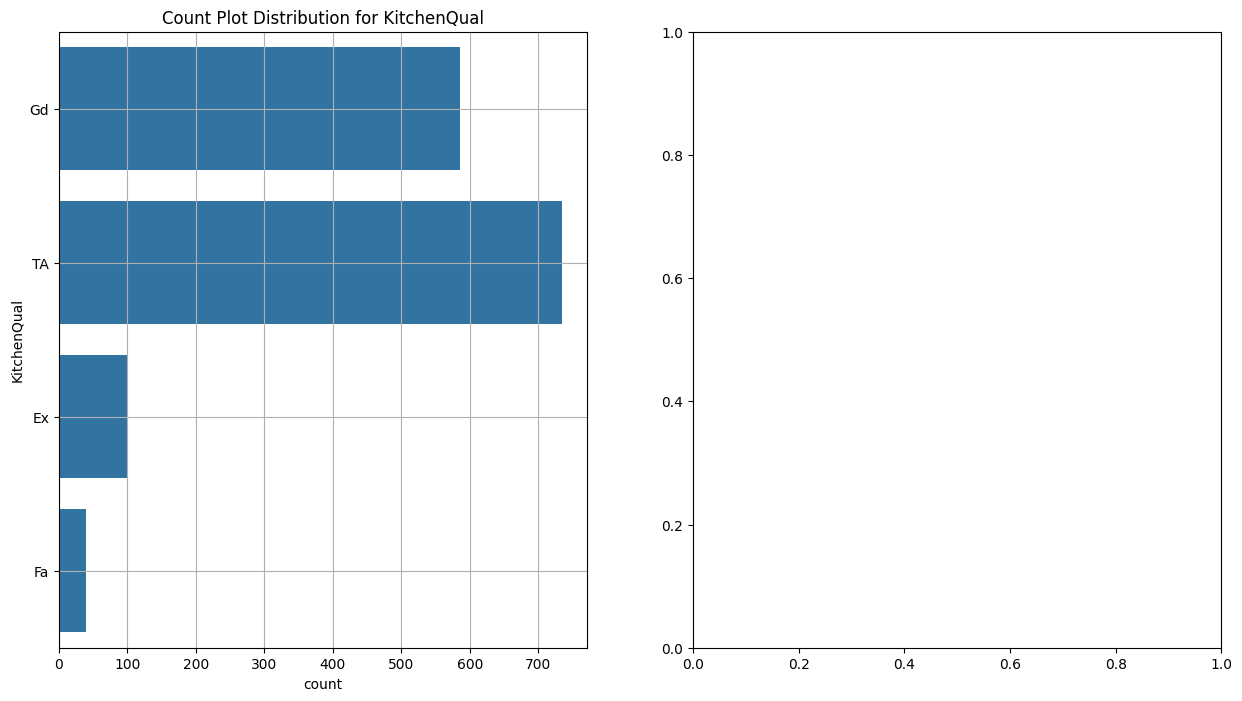

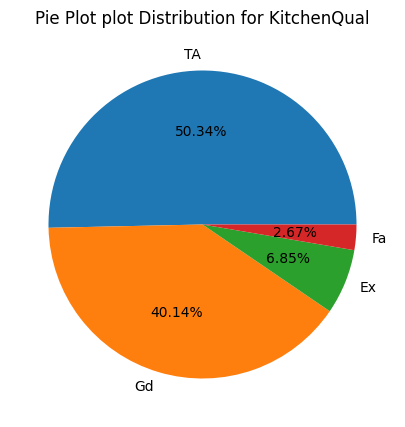

**************************************************
**************************************************
Logs for Functional


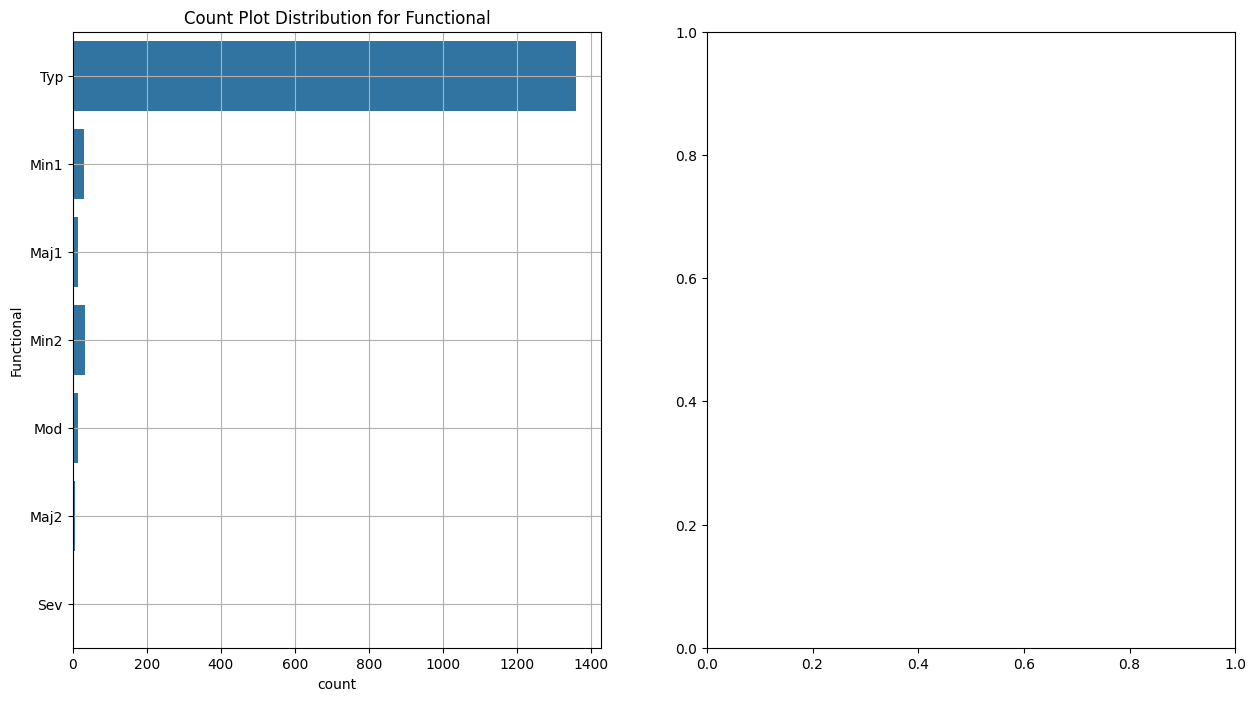

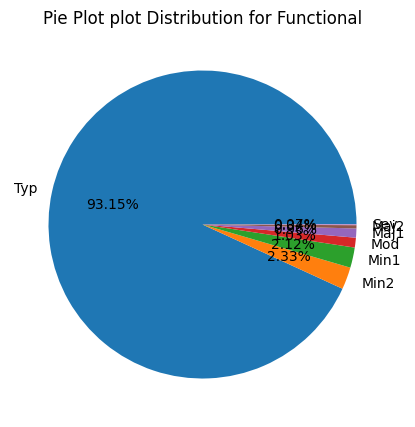

**************************************************
**************************************************
Logs for FireplaceQu


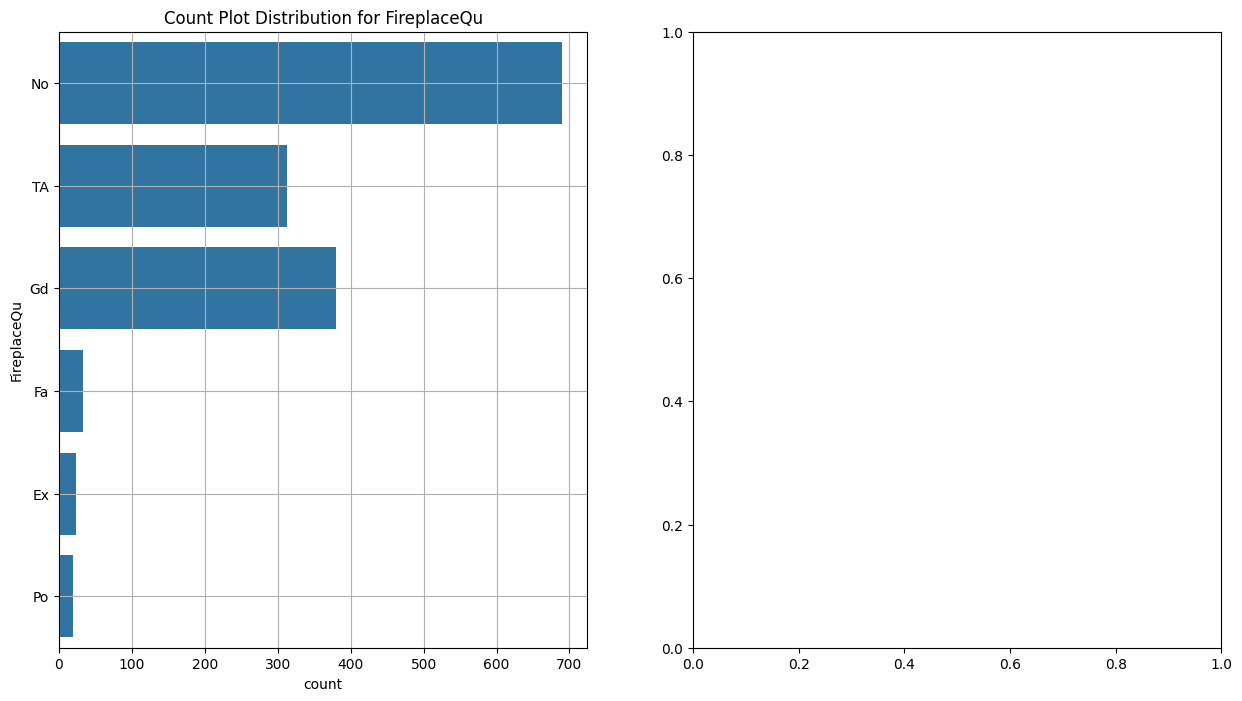

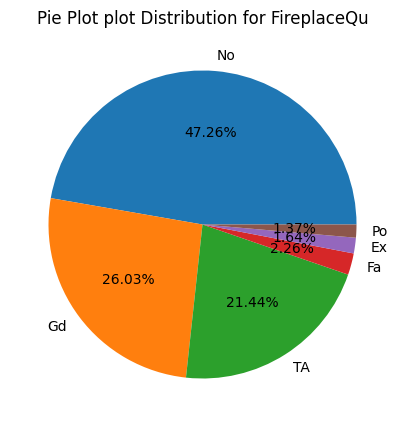

**************************************************
**************************************************
Logs for GarageType


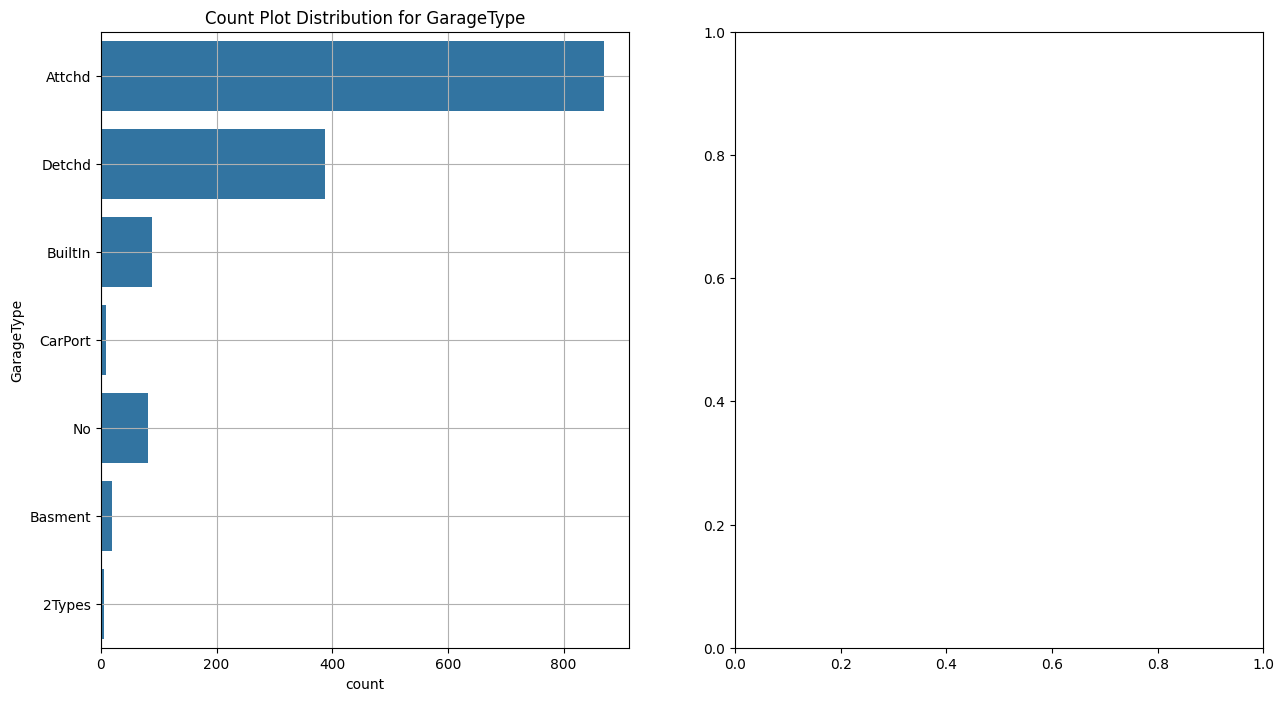

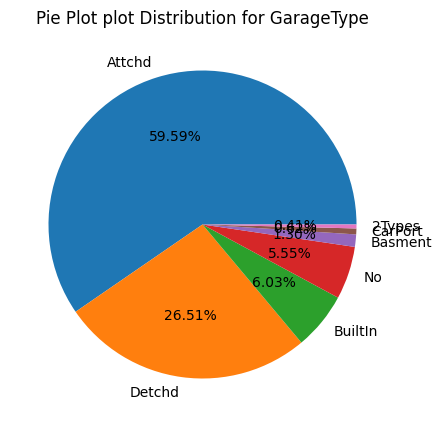

**************************************************
**************************************************
Logs for GarageFinish


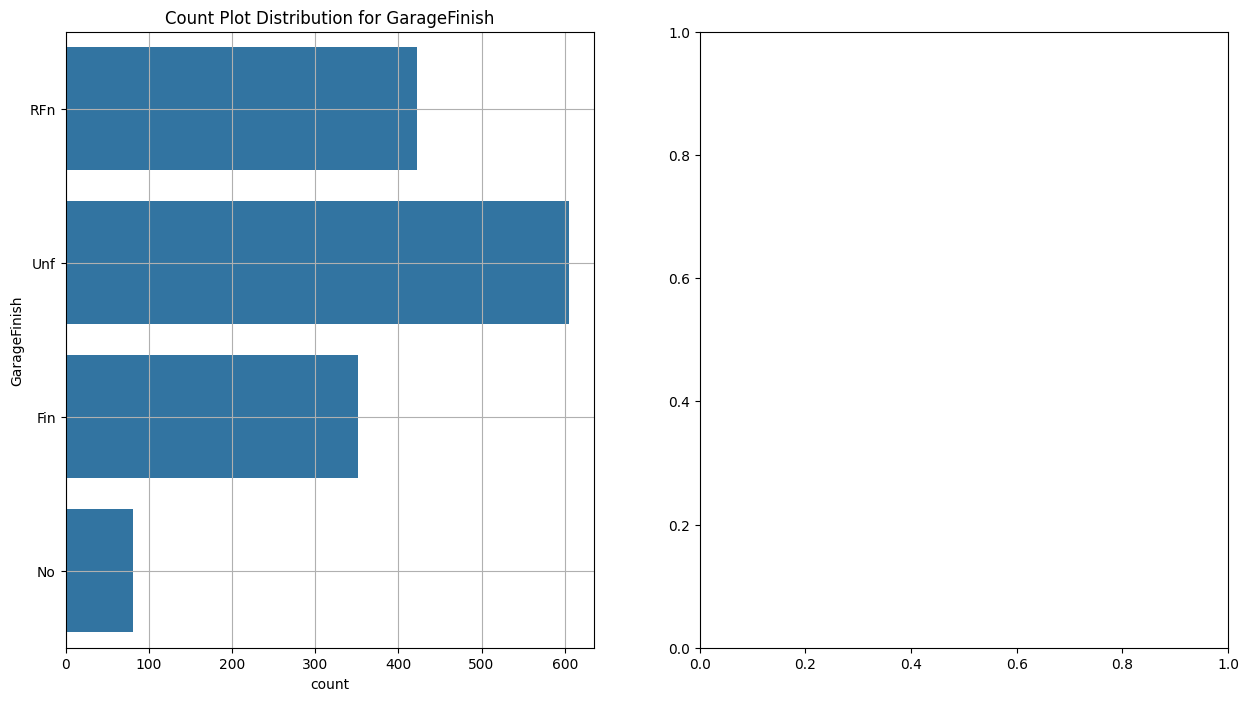

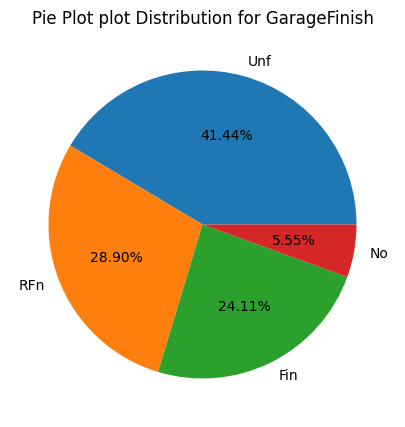

**************************************************
**************************************************
Logs for GarageQual


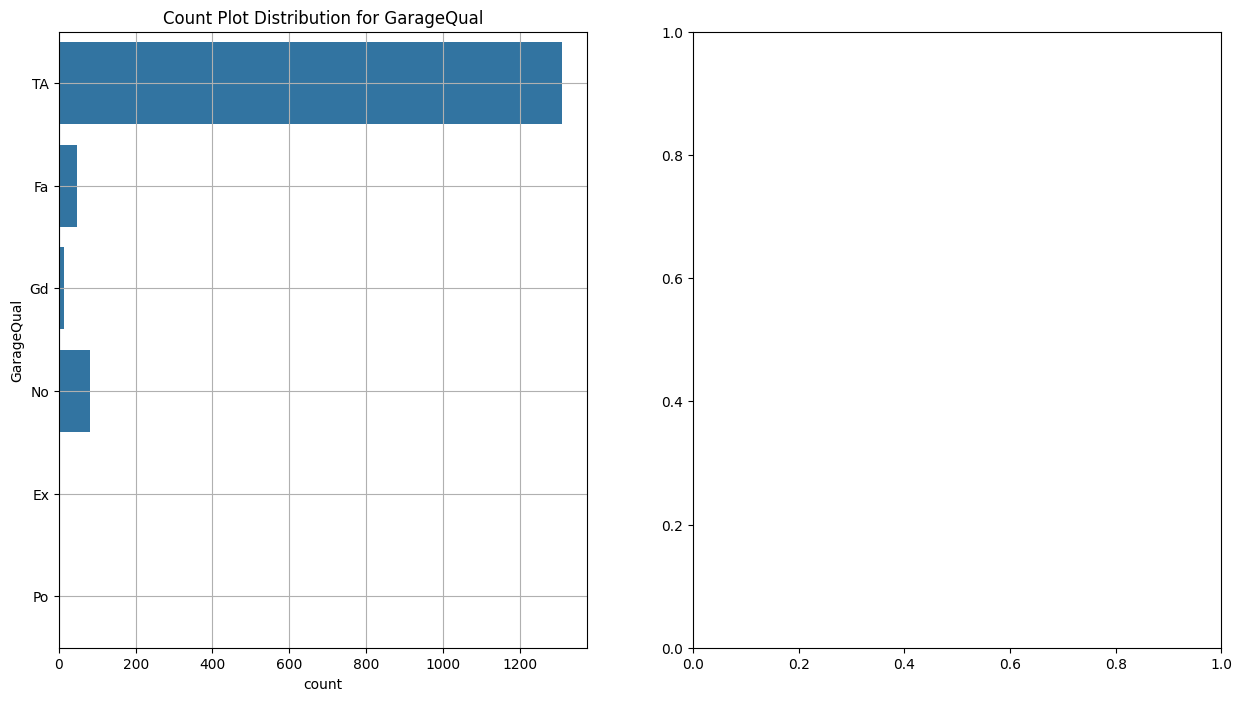

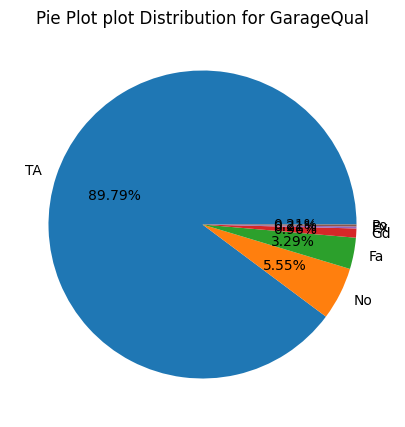

**************************************************
**************************************************
Logs for GarageCond


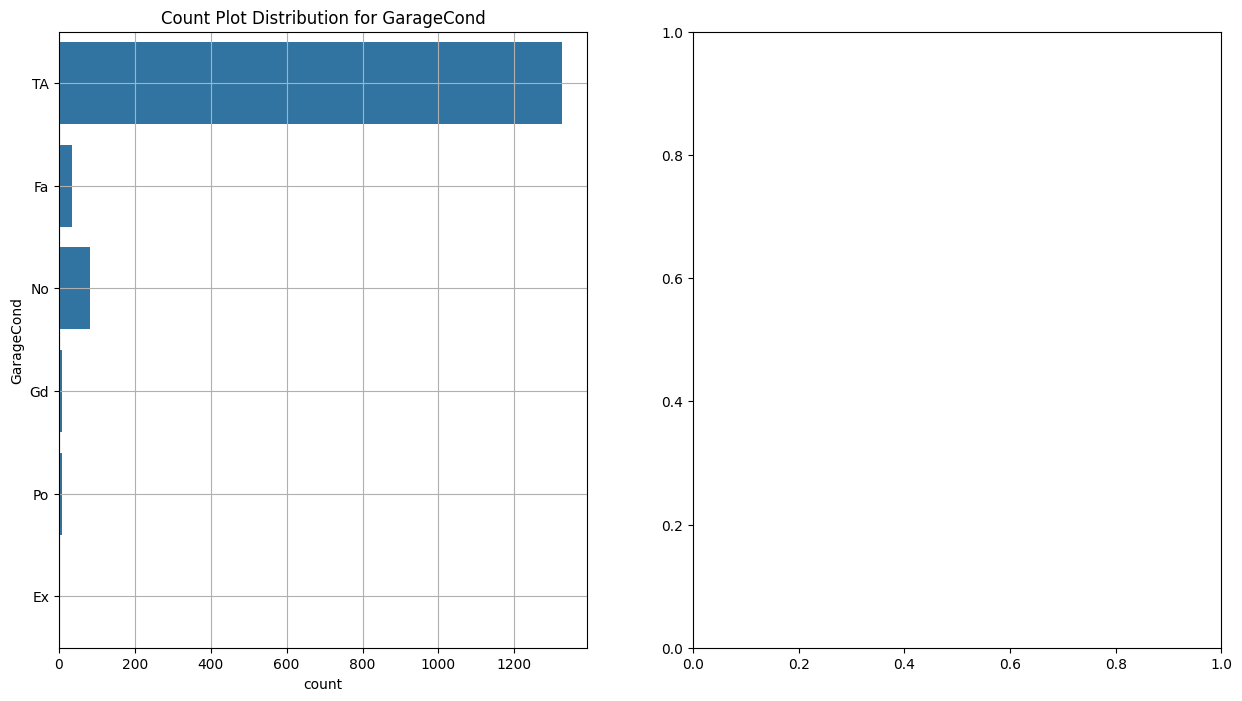

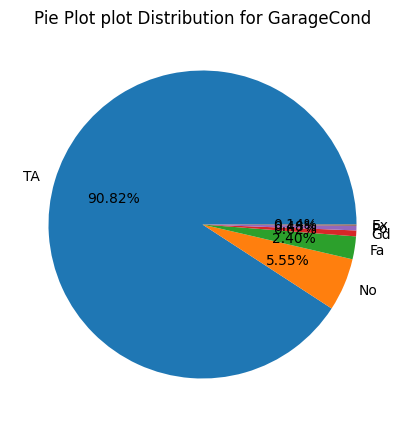

**************************************************
**************************************************
Logs for PavedDrive


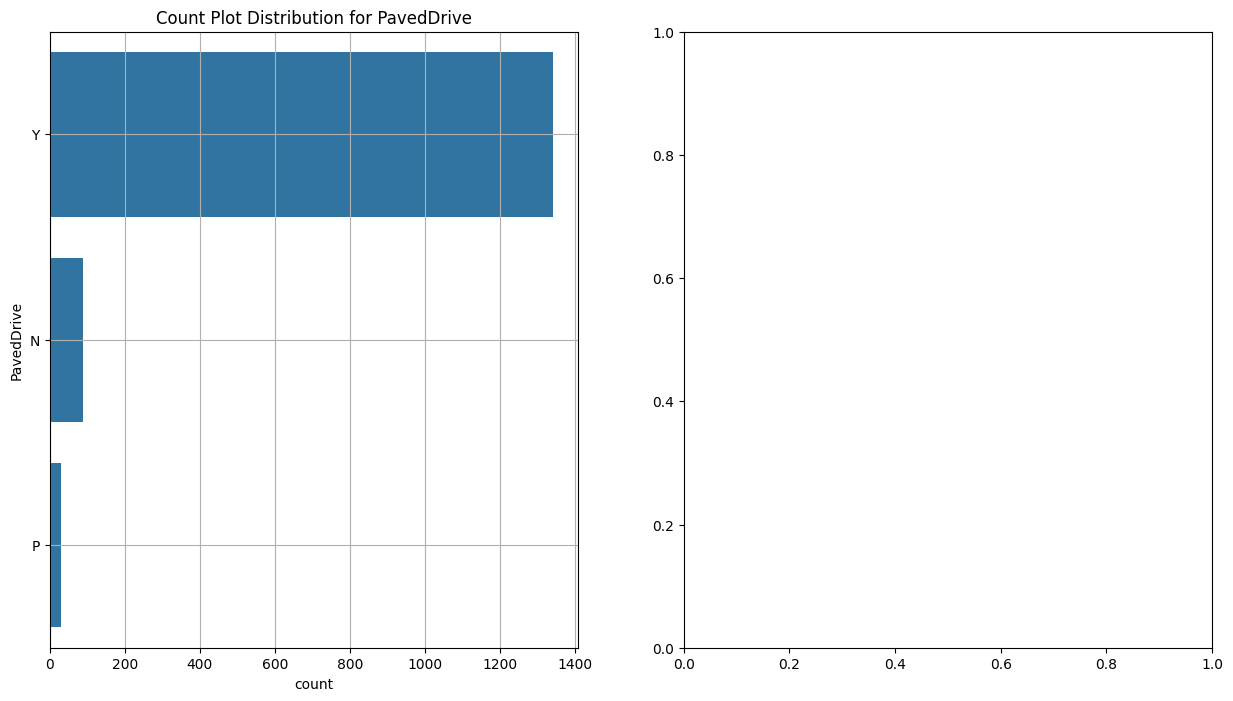

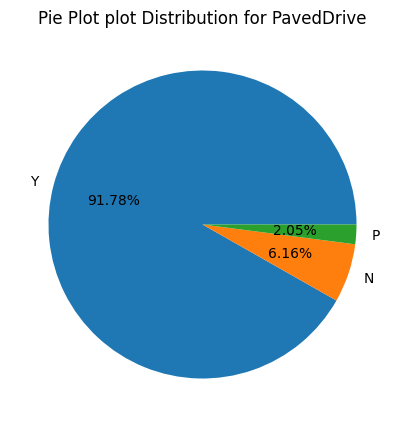

**************************************************
**************************************************
Logs for PoolQC


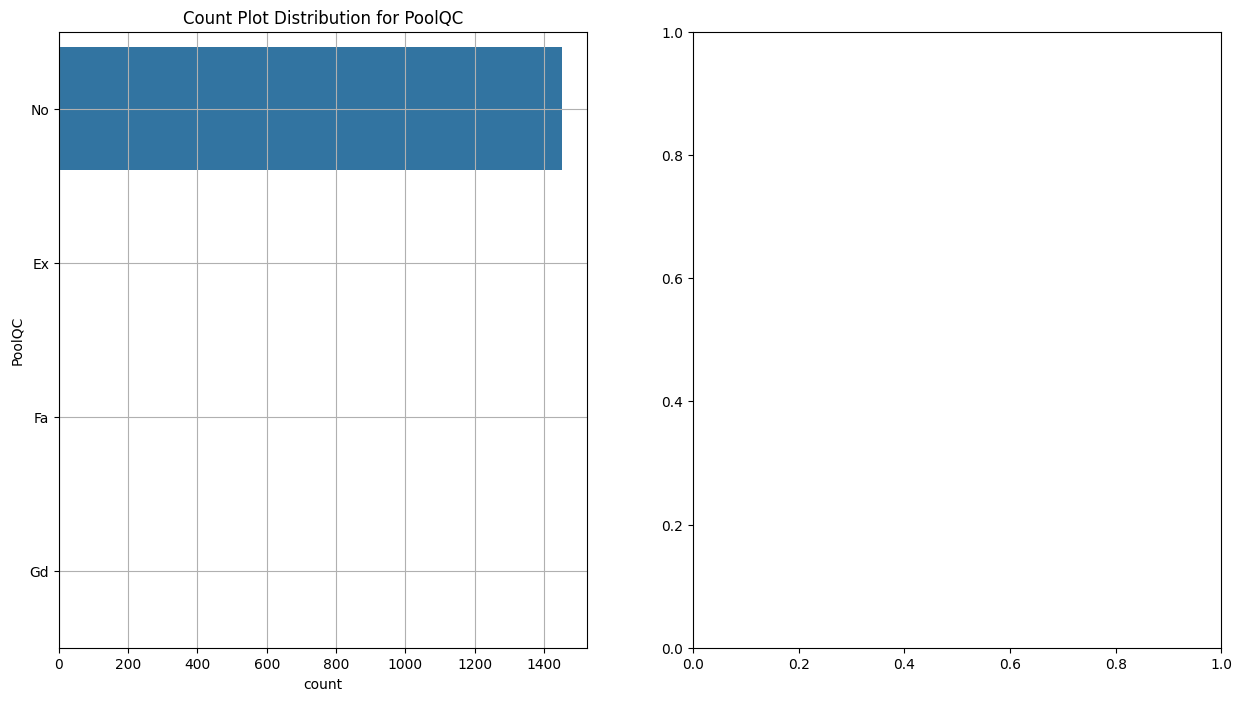

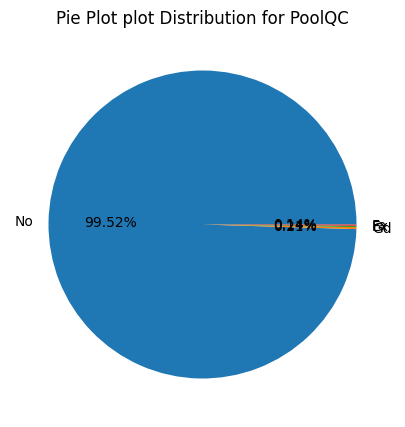

**************************************************
**************************************************
Logs for Fence


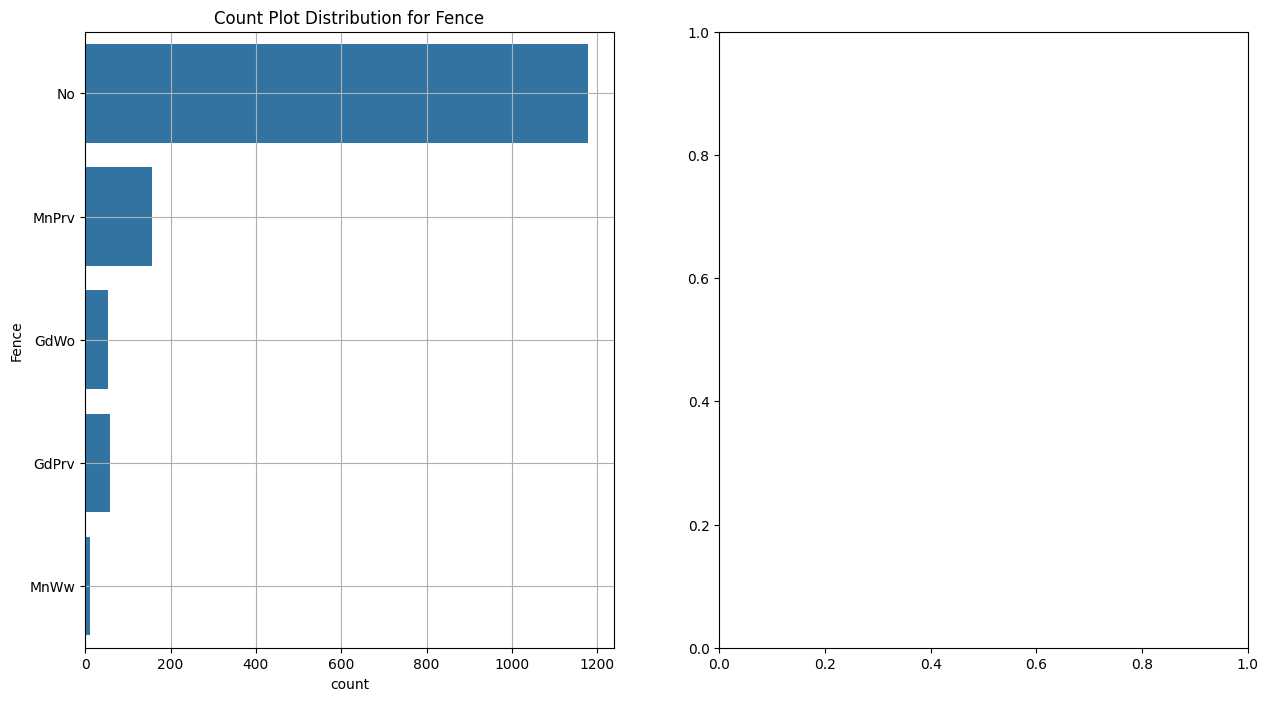

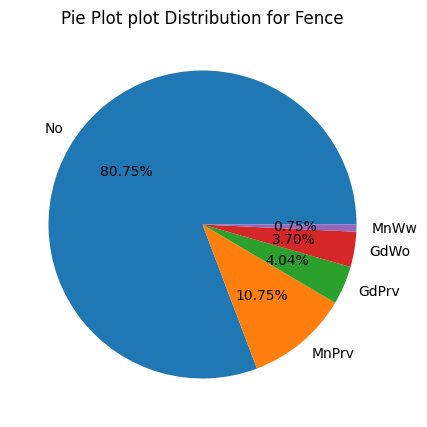

**************************************************
**************************************************
Logs for MiscFeature


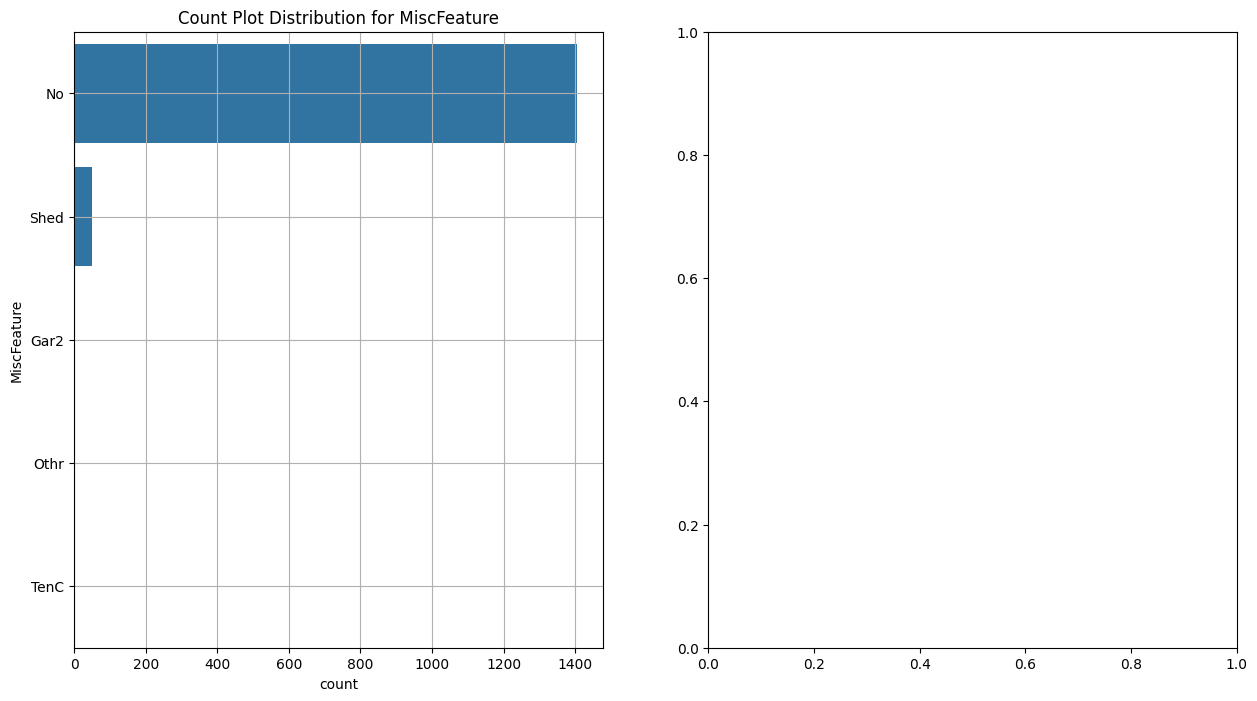

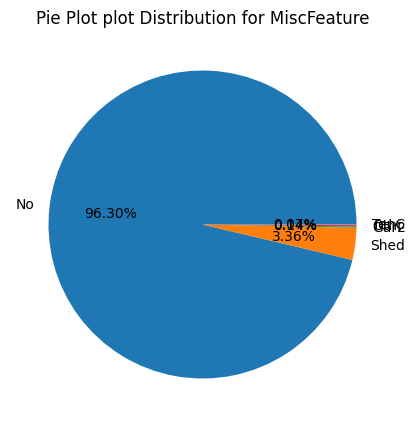

**************************************************
**************************************************
Logs for MoSold


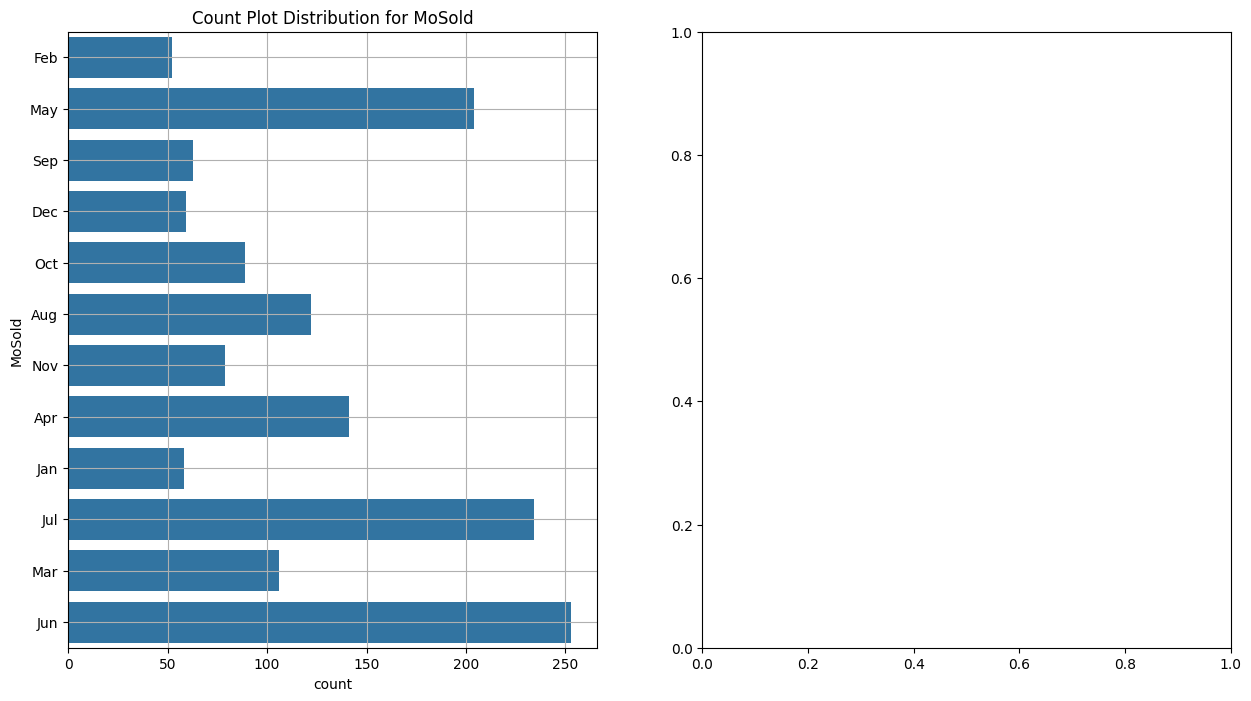

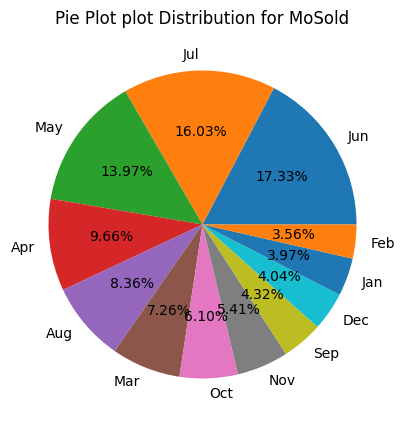

**************************************************
**************************************************
Logs for SaleType


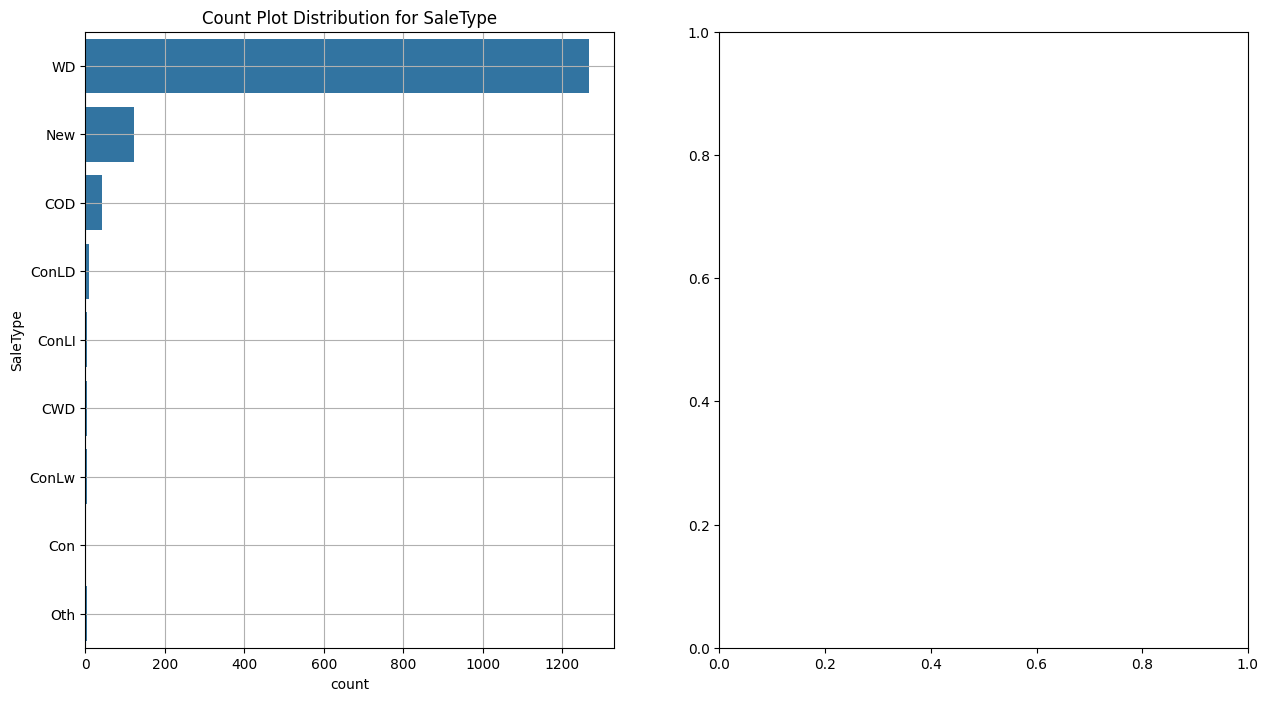

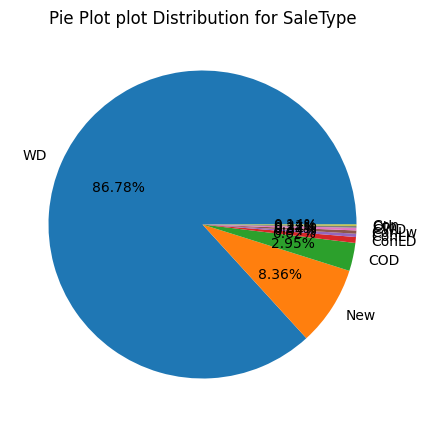

**************************************************
**************************************************
Logs for SaleCondition


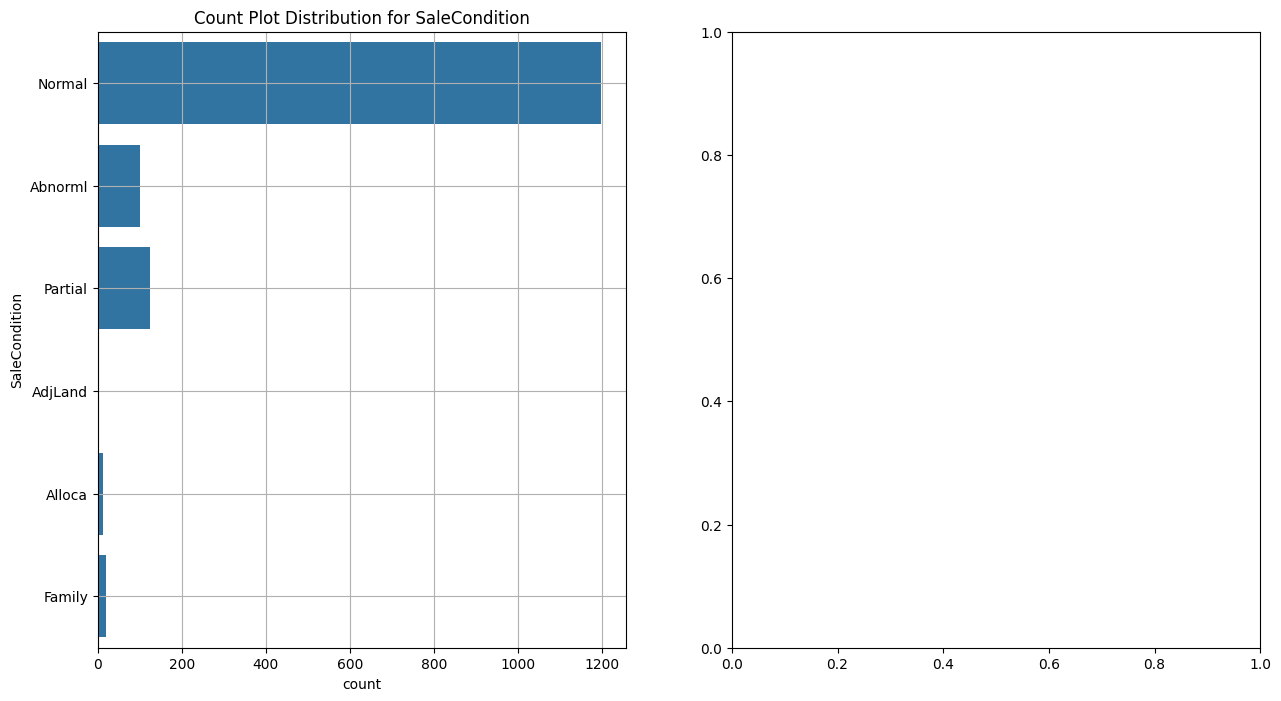

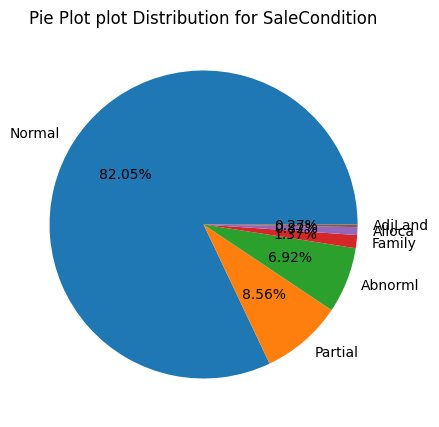

**************************************************


In [52]:
for col in categorical_list:
    print("*"*50)
    print(f"Logs for {col}")
    plt.figure(figsize= [15,8])
    plt.subplot(1,2,1)
    sns.countplot(data= df, y =col)
    plt.grid()
    plt.title(f"Count Plot Distribution for {col}")
    plt.subplot(1,2,2)
    index = df[col].value_counts().index
    values = df[col].value_counts().values
    plt.figure(figsize= [20,5])
    plt.pie(x=values,labels=index, autopct='%1.2f%%')
    # plt.pie(df[col], color='darkblue')
    plt.grid()
    plt.title(f"Pie Plot plot Distribution for {col}")
    plt.savefig(f"{col}_univariate_analysis.PNG")
    plt.show()
    print("*"*50)

In [54]:
df["SaleType"]

0       WD
1       WD
2       WD
3       WD
4       WD
        ..
1455    WD
1456    WD
1457    WD
1458    WD
1459    WD
Name: SaleType, Length: 1460, dtype: object